## Limpeza dos dados, EDA dos dados mecânicos e Modelos de Regressão
### Sobre o dataset
Os dados contém quatro subconjuntos de dados:

Cols 0 a 2 : São os Metadados; Referência do artigo, Código da liga, e o nome da liga.  
Cols 3 a 27 : Composição química dos elementos em porcentagem atômica.  
Cols 28 a 34 : Critérios de HEA.  
Cols 35 a 46 : Procedimento experimental.  
Col 47 : Target; Fase formada.

In [1]:
# Importando as bibliotecas em comum
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [128]:
df = pd.read_csv("literature_database.csv")
df

,New Ref.,Alloy,Nome,Nome tratado,Co,Fe,Ni,Si,Al,Cr,...,eletrólito,Contraeletrodo,Referência,Ecorr [V],Icorr [A/cm²],Epit [V],Polarization resistance (Rp) [Ω.cm²],Weight gain (ΔW) [mg/cm²],Temperature [°C],Time [h]
0,1,Alloy_1,CoFeNi,CoFeNi,33.333333,33.333333,33.333333,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Alloy_2,CoFeNi,CoFeNi,33.333333,33.333333,33.333333,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Alloy_3,CoFeNiSi0.25,CoFeNiSi0.25,30.769231,30.769231,30.769231,7.692308,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Alloy_4,CoFeNiSi0.5,CoFeNiSi0.5,28.571429,28.571429,28.571429,14.285714,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Alloy_5,CoFeNiSi0.75,CoFeNiSi0.75,26.666667,26.666667,26.666667,20.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1266,232,Alloy_1267,Fe24.25Cr24.25Co24.25Ni24.25Ti3,Fe24.25Cr24.25Co24.25Ni24.25Ti3,24.250000,24.250000,24.250000,NaN,NaN,24.25,...,1M NaCl,Platinum mesh,Ag/AgCl,-0.238,9.900000e-07,NaN,NaN,NaN,NaN,NaN
1267,232,Alloy_1268,Fe23.75Cr23.75Co23.75Ni23.75Ti5,Fe23.75Cr23.75Co23.75Ni23.75Ti5,23.750000,23.750000,23.750000,NaN,NaN,23.75,...,1M NaCl,Platinum mesh,Ag/AgCl,-0.265,6.200000e-07,NaN,NaN,NaN,NaN,NaN
1268,233,Alloy_1269,Fe35Ni35Cr20Mn10,Fe35Ni35Cr20Mn10,NaN,35.000000,35.000000,NaN,NaN,20.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1269,233,Alloy_1270,Fe33.355Ni33.355Cr19.06Mn9.53Ti4.7,Fe33.355Ni33.355Cr19.06Mn9.53Ti4.7,NaN,33.355000,33.355000,NaN,NaN,19.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
df.to_csv('full_df.csv', index= False)

In [130]:
df = pd.read_csv('full_df.csv')
df.head()

,New Ref.,Alloy,Nome,Nome tratado,Co,Fe,Ni,Si,Al,Cr,...,eletrólito,Contraeletrodo,Referência,Ecorr [V],Icorr [A/cm²],Epit [V],Polarization resistance (Rp) [Ω.cm²],Weight gain (ΔW) [mg/cm²],Temperature [°C],Time [h]
0,1,Alloy_1,CoFeNi,CoFeNi,33.333333,33.333333,33.333333,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Alloy_2,CoFeNi,CoFeNi,33.333333,33.333333,33.333333,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Alloy_3,CoFeNiSi0.25,CoFeNiSi0.25,30.769231,30.769231,30.769231,7.692308,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Alloy_4,CoFeNiSi0.5,CoFeNiSi0.5,28.571429,28.571429,28.571429,14.285714,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Alloy_5,CoFeNiSi0.75,CoFeNiSi0.75,26.666667,26.666667,26.666667,20.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
df.shape

(1271, 77)

### Limpando instâncias
Removendo instâncias sem referência

In [132]:
df['New Ref.'].value_counts()
# Remover os drop

Drop    35
4       26
213     18
61      17
216     16
        ..
234      1
72       1
59       1
176      1
203      1
Name: New Ref., Length: 236, dtype: int64

In [141]:
# Dropar instâncias sem referência
df.drop(df[df['New Ref.'] == 'Drop'].index, inplace= True)
# Dropar Alloy 2 e Alloy 68
df.drop(df[(df['Alloy'] == "Alloy_2") | (df['Alloy'] == "Alloy_68") | (df['Alloy'] == "Alloy_864") | (df['Alloy'] == "Alloy_865")].index, inplace = True)

In [ ]:
# Renomear a fase
df.iloc[128,1] = 'CoCrFeMnNi'

In [144]:
df.drop(["New Ref.", "Nome"], axis= 1, inplace= True)

### Adicionando zeros em chemical composition

In [152]:
df.iloc[:,2:26] = df.iloc[:,2:26].fillna(0)

In [155]:
df.iloc[:,2:26].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1234 entries, 0 to 1270
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Co      1234 non-null   float64
 1   Fe      1234 non-null   float64
 2   Ni      1234 non-null   float64
 3   Si      1234 non-null   float64
 4   Al      1234 non-null   float64
 5   Cr      1234 non-null   float64
 6   Mo      1234 non-null   float64
 7   Nb      1234 non-null   float64
 8   Ti      1234 non-null   float64
 9   C       1234 non-null   float64
 10  V       1234 non-null   float64
 11  Zr      1234 non-null   float64
 12  Mn      1234 non-null   float64
 13  Cu      1234 non-null   float64
 14  B       1234 non-null   float64
 15  Y       1234 non-null   float64
 16  Sn      1234 non-null   float64
 17  Li      1234 non-null   float64
 18  Mg      1234 non-null   float64
 19  Zn      1234 non-null   float64
 20  Sc      1234 non-null   float64
 21  Hf      1234 non-null   float64
 22  

### Aplicando os critérios de HEA

In [156]:
# importando a biblioteca de HEA criteria
from HEA_criteria import *

In [163]:
df.iloc[:,26:34].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1234 entries, 0 to 1270
Data columns (total 8 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   atomic radius (δ) [%]                            304 non-null    float64
 1   Electronegativity (Δχ)                           121 non-null    float64
 2   Valence Electron Concentration (VEC)             249 non-null    float64
 3   Ω parameter                                      215 non-null    float64
 4   Entalpia de mix (dHmix) [kJ/mol]                 274 non-null    float64
 5   Entropia de mix (dSmix) [J/K.mol]                233 non-null    float64
 6   Melting temperature (Tm) [K]                     116 non-null    float64
 7   Elastic-strain energy criterion (dHel) [kJ/mol]  0 non-null      float64
dtypes: float64(8)
memory usage: 86.8 KB


In [164]:
# Calcular todos os HEA criterias. Primeiro, coletar os nomes das colunas
df.iloc[:,26:34].columns

Index(['atomic radius (δ) [%]', 'Electronegativity (Δχ)',
       'Valence Electron Concentration (VEC)', 'Ω parameter',
       'Entalpia de mix (dHmix) [kJ/mol]', 'Entropia de mix (dSmix) [J/K.mol]',
       'Melting temperature (Tm) [K]',
       'Elastic-strain energy criterion (dHel) [kJ/mol]'],
      dtype='object')

In [250]:
# Calculando todos os critérios de HEA
df['atomic radius (δ) [%]'] = df['Nome tratado'].map(lambda x: atomic_radii(x))
df['Electronegativity (Δχ)'] = df['Nome tratado'].map(lambda x: electronegativity(x))
df['Valence Electron Concentration (VEC)'] = df['Nome tratado'].map(lambda x: vec(x))
df['Entalpia de mix (dHmix) [kJ/mol]'] = df['Nome tratado'].map(lambda x: dHmix(x))
df['Entropia de mix (dSmix) [J/K.mol]'] = df['Nome tratado'].map(lambda x: dSmix(x))
df['Melting temperature (Tm) [K]'] = df['Nome tratado'].map(lambda x: melting_temp(x))
df['Elastic-strain energy criterion (dHel) [kJ/mol]'] = df['Nome tratado'].map(lambda x: dHel(x))

In [251]:
# omega = abs((tm*dSmix)/(1000*dHmix))
df['Ω parameter'] = abs((df['Melting temperature (Tm) [K]']*df['Entropia de mix (dSmix) [J/K.mol]'])/(1000*df['Entalpia de mix (dHmix) [kJ/mol]']))

### Tratar fases
Simplificar a nomenclatura das fases

In [197]:
# Tratar a nomenclatura no Excel
df.iloc[:,34].value_counts()

FCC                       279
BCC + Im                  199
BCC                       197
FCC + Im                  190
FCC + BCC                  91
FCC + BCC + Im             44
BCC + FCC                  38
BCC + Im1 + Im2            28
BCC1 + BCC2                20
BCC + FCC + Im             17
FCC1 + FCC2                16
BCC + lm                   12
Im                          9
FCC + Im1 + Im2             8
BCC + FCC1 + FCC2           7
BCC1 + BCC2 + FCC + Im      6
Im1 + Im2                   6
BCC + FCC1 + FCC2 + Im      6
FCC1 + FCC2 + BCC           6
B2 + Im                     5
FCC1 + FCC2+ BCC            5
FCC + BCC + Im1 + Im2       4
BCC + B2                    4
Im1 + Im2 + Im3             4
BCC1 + BCC2 + Im            4
FCC + HCP + Im              3
BCC + FCC + Im1 + Im2       3
FCC + Im1 + Im2 + Im3       3
FCC +BCC                    2
FCC + B2 + Im               2
--                          2
BCC1 + BCC2 + BCC3          2
FCC1 + BCC + Im             2
BCC + HCP 

In [214]:
# Replace the phases
df['Type of phases'] = df['Type of phases'].replace('FCC + BCC + Im', 'BCC + FCC + Im').replace('BCC + Im1 + Im2','BCC + Im').replace('BCC1 + BCC2', 'BCC').replace('FCC1 + FCC2','FCC').replace('BCC + lm','BCC + Im').replace('FCC + Im1 + Im2','FCC + Im').replace('BCC + FCC1 + FCC2','BCC + FCC').replace('BCC1 + BCC2 + FCC + Im','BCC + FCC + Im').replace('Im1 + Im2','Im').replace('BCC + FCC1 + FCC2 + Im','BCC + FCC + Im').replace('FCC1 + FCC2 + BCC','BCC + FCC').replace('B2 + Im','Im').replace('FCC1 + FCC2+ BCC','BCC + FCC').replace('FCC + BCC + Im1 + Im2','BCC + FCC + Im').replace('BCC + B2','BCC + Im').replace('Im1 + Im2 + Im3','Im').replace('BCC1 + BCC2 + Im','BCC + Im').replace('BCC + FCC + Im1 + Im2','BCC + FCC + Im').replace('FCC + Im1 + Im2 + Im3','FCC + Im').replace('FCC +BCC','BCC + FCC').replace('FCC + B2 + Im','FCC + Im').replace('BCC1 + BCC2 + BCC3','BCC').replace('FCC1 + BCC + Im','BCC + FCC + Im').replace('FCC1 + FCC2 + BCC + Im','BCC + FCC + Im').replace('FCC + BCC1 + BCC2','BCC + FCC').replace('FCC+ Im','FCC + Im').replace('BCC + FCC2 + FCC3','BCC + FCC')

In [225]:
df.iloc[:,34].value_counts()

FCC               295
BCC + Im          247
BCC               219
FCC + Im          204
FCC + BCC          91
BCC + FCC + Im     83
BCC + FCC          60
Im                 24
FCC + HCP + Im      3
--                  2
HCP + Im            1
BCC + BCT           1
BCC + HCP           1
HCP                 1
Name: Type of phases, dtype: int64

In [227]:
# Drop instances
df.drop(df[(df['Type of phases'] == 'FCC + HCP + Im') | (df['Type of phases'] == '--') | (df['Type of phases'] == 'HCP + Im') | (df['Type of phases'] == 'BCC + BCT') | (df['Type of phases'] == 'BCC + HCP') | (df['Type of phases'] == 'HCP')].index, inplace= True)

In [252]:
df.iloc[:,26:34].isna().sum()

atomic radius (δ) [%]                              0
Electronegativity (Δχ)                             0
Valence Electron Concentration (VEC)               0
Ω parameter                                        0
Entalpia de mix (dHmix) [kJ/mol]                   0
Entropia de mix (dSmix) [J/K.mol]                  0
Melting temperature (Tm) [K]                       0
Elastic-strain energy criterion (dHel) [kJ/mol]    0
dtype: int64

In [254]:
df['Type of phases'].value_counts()

FCC               295
BCC + Im          247
BCC               219
FCC + Im          204
FCC + BCC          91
BCC + FCC + Im     83
BCC + FCC          60
Im                 24
Name: Type of phases, dtype: int64

In [256]:
df['Type of phases'] = df['Type of phases'].replace('FCC + BCC','BCC + FCC')

In [257]:
df['Type of phases'].value_counts()

FCC               295
BCC + Im          247
BCC               219
FCC + Im          204
BCC + FCC         151
BCC + FCC + Im     83
Im                 24
Name: Type of phases, dtype: int64

#### Sobre os dados de phase

Utilizando somente as fases 'BCC', 'FCC' e 'BCC + FCC', mais Intermetalicos.

In [264]:
df.iloc[:,:35].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1223 entries, 0 to 1270
Data columns (total 35 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Alloy                                            1223 non-null   object 
 1   Nome tratado                                     1223 non-null   object 
 2   Co                                               1223 non-null   float64
 3   Fe                                               1223 non-null   float64
 4   Ni                                               1223 non-null   float64
 5   Si                                               1223 non-null   float64
 6   Al                                               1223 non-null   float64
 7   Cr                                               1223 non-null   float64
 8   Mo                                               1223 non-null   float64
 9   Nb                            

#### Dados de Chemical Composition e HEA criteria
Dados preenchidos, sem valores NaN.

---

````python
# Salvando a base de dados trabalhadas
df.to_csv("semi_cleaned_database.csv", index= False)
````

In [267]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [268]:
df = pd.read_csv("semi_cleaned_database.csv")

## Tratar os dados de Procedimento Experimental

In [280]:
df.iloc[:,35:49].columns

Index(['Synthesis', 'As cast/Homogenized right after casting',
       'Homog. Temperature [°C]', 'Homog. tempo [h]', 'Cold/Hot Working',
       'Conformation temperature [°C]', 'Reduction [%]', 'Metal working obs.',
       'Heat treatment', 'temperatura de pico [°C]', 'tempo de pico [h]',
       'taxa de resfriamento [°C/min]', 'meio de resfriamento',
       'grain size [μm]'],
      dtype='object')

---

In [364]:
# Dropar : Não foi dropado antes porque estava escrito 'drop' e não 'Drop'
df.drop(index= list(range(416,422)), inplace= True)

---

In [284]:
# Sobre Synthesis
df["Synthesis"] = df["Synthesis"].str.replace("Arc melting", "Arc Melting")
df["Synthesis"].value_counts(normalize= True)*100

"""
Mais de 80% é Arc Melting e 16% é Induction Furnace. Podemos descartar essa feature por causa de baixa variância.
"""

Arc Melting            83.566146
Induction furnace      15.776500
High Pressure Die       0.328677
Casting                 0.246508
Mechanical alloying     0.082169
Name: Synthesis, dtype: float64

In [306]:
# Dropando 'Synthesis'
df.drop('Synthesis', axis= 1, inplace= True)

---

In [289]:
# As cast/Homogenized right after casting
df['As cast/Homogenized right after casting'] = df['As cast/Homogenized right after casting'].str.replace('as cast', 'As cast')
df['As cast/Homogenized right after casting'].value_counts(normalize= True)*100

"""
Aqui, já tem outra feature que acompanha outras duas: 'Homog. Temperature [°C]' e 'Homog. tempo [h]'. 
- Podemos dropar 'Homog. tempo [h]';
- Ou fazer um OHE com 'As cast/Homogenized right after casting' ou Usar 'Homog. Temperature [°C]' onde As cast é 25 (Room Temperature)
"""

As cast        76.722689
Homogenized    23.277311
Name: As cast/Homogenized right after casting, dtype: float64

In [312]:
# Dropar 'Homog. tempo [h]'
df.drop('Homog. tempo [h]', axis= 1, inplace= True)

In [317]:
df.drop('Homog. Temperature [°C]', axis= 1, inplace= True)

---

In [292]:
# Cold/Hot Working
df['Cold/Hot Working'] = df['Cold/Hot Working'].str.replace('Hot rolling','Hot Rolling')
df['Cold/Hot Working'].value_counts(normalize= True)

"""
Substituir por Cold ou Hot Working. Se não houve conformação, Usar 'No Working'
- Cold Working : 'Cold Rolling', 'Hot Rolling + Cold Rolling'
- Hot Working : 'HIP', 'Hot Forging', 'Hot Rolling', 'Hot Forging + Warm Rolling'
- No Working : NaN.

"""

Cold Rolling                  0.761194
HIP                           0.078358
Hot Forging                   0.063433
Hot Rolling                   0.059701
Hot Rolling + Cold Rolling    0.022388
Hot Forging + Warm Rolling    0.014925
Name: Cold/Hot Working, dtype: float64

In [319]:
# Cold Working
df['Cold/Hot Working'] = df['Cold/Hot Working'].replace('Cold Rolling','Cold Working').replace('Hot Rolling + Cold Rolling','Cold Working')
# Hot Working
df['Cold/Hot Working'] = df['Cold/Hot Working'].replace('HIP','Hot Working').replace('Hot Forging','Hot Working').replace('Hot Rolling','Hot Working').replace('Hot Forging + Warm Rolling','Hot Working')
# No Working
df['Cold/Hot Working'] =df['Cold/Hot Working'].fillna('No Working')

In [327]:
df['Cold/Hot Working'].value_counts()

No Working      955
Cold Working    210
Hot Working      58
Name: Cold/Hot Working, dtype: int64

In [332]:
# Dropando colunas não úteis
df.drop(['Conformation temperature [°C]','Reduction [%]','Metal working obs.'], axis= 1, inplace= True)

---

In [295]:
# Heat treatment
df['Heat treatment'] = df['Heat treatment'].str.replace('Annealing','Annealed')
df['Heat treatment'].value_counts()

"""
Substituir:
- 'Heat treated' : 'Annealed' e 'Aging'
- 'Not Heat treated' : NaN.
"""

Annealed    276
Aging        25
Name: Heat treatment, dtype: int64

In [328]:
# Heat treated
df['Heat treatment'] = df['Heat treatment'].replace('Annealed','Heat treated').replace('Aging','Heat treated')
# No Heat treated
df['Heat treatment'] = df['Heat treatment'].fillna('No Heat treated')

---

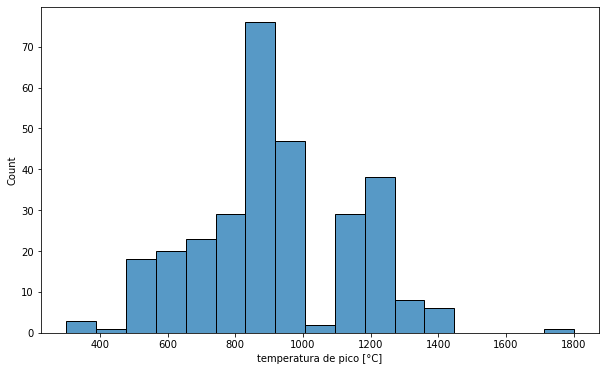

In [299]:
# temperatura de pico [°C]
plt.figure(figsize= (10,6))
sns.histplot(df['temperatura de pico [°C]'])
plt.show()

"""
Como há uma distribuição de temperaturas de tratamento térmico, usar nos dados.
Para valores NaN, substituir por 0.
"""

In [336]:
df['temperatura de pico [°C]'] = df['temperatura de pico [°C]'].fillna(0)

---

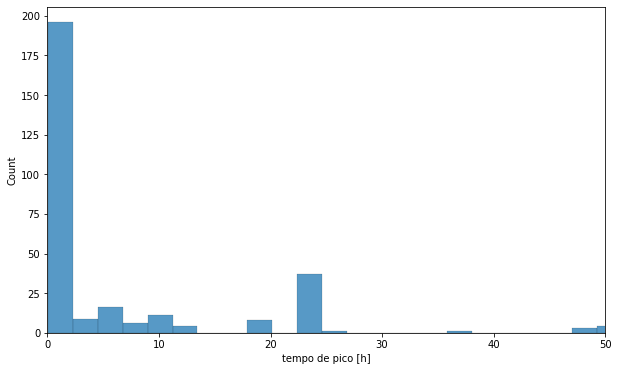

In [304]:
plt.figure(figsize= (10,6))
sns.histplot(df['tempo de pico [h]'])
plt.xlim(0,50)
plt.show()

"""
Como a maioria dos dados dura cerca de 1h, podemos dropar essa coluna
"""

In [339]:
df.drop('tempo de pico [h]', axis= 1, inplace= True)

---

#### Dropar essas colunas:
- 'taxa de resfriamento [°C/min]',  
-'meio de resfriamento',  
-'grain size [μm]'.

In [343]:
df.drop(['taxa de resfriamento [°C/min]','meio de resfriamento','grain size [μm]'], axis= 1, inplace= True)

##### Verificar
Os vazios em 'As cast/Homogenized right after casting':
- Alloy_419 a Alloy_431 : ref 62 -> Zhang_JOM, Vol. 64, No. 7, 2012_2012	10.1007/s11837-012-0366-5 --> As cast

- Alloy_800 a Alloy_807 : ref 139 -> Babilas_Journal of Magnetism and Magnetic Materials 502 (2020) 166492_2020	10.1016/j.jmmm.2020.166492 --> As cast

- Alloy_884 a Alloy_889 : ref 156 -> Zemanate_Electrochimica Acta 441 (2023) 141844_2023	10.1016/j.electacta.2023.141844 --> As cast

In [372]:
df['As cast/Homogenized right after casting'].fillna('As cast', inplace= True)

In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1217 entries, 0 to 1222
Data columns (total 65 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Alloy                                            1217 non-null   object 
 1   Nome tratado                                     1217 non-null   object 
 2   Co                                               1217 non-null   float64
 3   Fe                                               1217 non-null   float64
 4   Ni                                               1217 non-null   float64
 5   Si                                               1217 non-null   float64
 6   Al                                               1217 non-null   float64
 7   Cr                                               1217 non-null   float64
 8   Mo                                               1217 non-null   float64
 9   Nb                            

---

#### Salvando os dados

In [375]:
df.to_csv("semi_cleaned_database_2.csv", index= False)

---

---

## Trabalhando os dados de Propriedades Mecânicas

- Quais dados vão ser utilizados e quais vão ser dropados?
- Podemos calcular a densidade por Regra de Misturas (tem boa aproximação com os dados extraídos dos papers)
- Criar uma coluna de Resistência específica [MPa/(g/cm³)].

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('semi_cleaned_database_2.csv')

In [3]:
df.iloc[:,39:49].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   density (g/cm3)           492 non-null    object 
 1   density ROM (g/cm3)       42 non-null     float64
 2   HV                        609 non-null    object 
 3   obs dureza                565 non-null    object 
 4   Type of tests             875 non-null    object 
 5   testing temperature [°C]  874 non-null    object 
 6   YS (MPa)                  790 non-null    object 
 7   UTS (MPa)                 701 non-null    object 
 8   e (%)                     782 non-null    object 
 9   E (GPa)                   338 non-null    object 
dtypes: float64(1), object(9)
memory usage: 95.2+ KB


In [11]:
# Aplicar função de densidade teórica para a coluna 'density ROM (g/cm3)'
from HEA_criteria import *

df['density ROM (g/cm3)'] = df['Nome tratado'].map(lambda x: density(x))
df.iloc[:,39:49].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   density (g/cm3)           492 non-null    object 
 1   density ROM (g/cm3)       1217 non-null   float64
 2   HV                        609 non-null    object 
 3   obs dureza                565 non-null    object 
 4   Type of tests             875 non-null    object 
 5   testing temperature [°C]  874 non-null    object 
 6   YS (MPa)                  790 non-null    object 
 7   UTS (MPa)                 701 non-null    object 
 8   e (%)                     782 non-null    object 
 9   E (GPa)                   338 non-null    object 
dtypes: float64(1), object(9)
memory usage: 95.2+ KB


````python
# Salvando com o cálculo de densidade
df.to_csv("semi_cleaned_database_3.csv")
````

In [33]:
df['Type of tests'].value_counts(normalize= True)

"""
56% de ensaios de compressão, 43% de ensaios de tração.
"""

C    0.562286
T    0.437714
Name: Type of tests, dtype: float64

In [36]:
df['testing temperature [°C]'].value_counts(normalize= True)*100

"""
90% são de ensaios realizados em temperatura ambiente
"""

RT      90.846682
600      2.631579
800      1.716247
1000     1.258581
400      0.686499
700      0.457666
900      0.343249
0        0.343249
500      0.343249
227      0.228833
427      0.228833
1200     0.228833
327      0.228833
300      0.114416
650      0.114416
450      0.114416
200      0.114416
Name: testing temperature [°C], dtype: float64

### Dropar as colunas e salvar em um dataframe específico
- density (g/cm3) -> Dado extraído de papers, apenas 402 (33%) dos dados
- obs dureza -> Irrelevante
- Type of tests -> **Testar sem e com essa feature. Tem boa distribuição de ensaios**
- testing temperature [°C] -> Remover, 90% são realizados em temperatura ambiente.
- UTS (MPa) -> Data Leakage : Informações do ensaio mecânico
- e (%) -> Data Leakage : Informações do ensaio mecânico
- E (GPa) -> Data Leakage : Informações do ensaio mecânico

### Dropar outras propriedades
- Cols 49:

In [37]:
# Colunas do database

#df.iloc[:,:2].info() # Metadado
#df.iloc[:,2:26].info() # chemical composition
#df.iloc[:,26:35].info() # HEA criteria e Fases
#df.iloc[:,35:39].info() # Procedimento experimental
#df.iloc[:,39:49].info() # Mechanical properties
#df.iloc[:,49:].info() # Other properties

In [38]:
df.iloc[:,39:49].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   density (g/cm3)           492 non-null    object 
 1   density ROM (g/cm3)       1217 non-null   float64
 2   HV                        609 non-null    object 
 3   obs dureza                565 non-null    object 
 4   Type of tests             875 non-null    object 
 5   testing temperature [°C]  874 non-null    object 
 6   YS (MPa)                  790 non-null    object 
 7   UTS (MPa)                 701 non-null    object 
 8   e (%)                     782 non-null    object 
 9   E (GPa)                   338 non-null    object 
dtypes: float64(1), object(9)
memory usage: 95.2+ KB


In [39]:
df.drop(['density (g/cm3)','obs dureza','testing temperature [°C]','UTS (MPa)','E (GPa)'], axis= 1, inplace= True)

In [49]:
# Propriedades mecânicas
df.iloc[:,39:44].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   density ROM (g/cm3)  1217 non-null   float64
 1   HV                   609 non-null    object 
 2   Type of tests        875 non-null    object 
 3   YS (MPa)             790 non-null    object 
 4   e (%)                782 non-null    object 
dtypes: float64(1), object(4)
memory usage: 47.7+ KB


In [62]:
df.drop(df.iloc[:,44:60].columns, axis= 1, inplace= True)

In [65]:
df.drop('e (%)', axis= 1, inplace= True)

##### Propriedades mecânicas estão em 'object' dtype

In [72]:
# HV : Deciamals estão separados por ',' e dtype 'object'
df['HV'] = df['HV'].str.replace(',','.')
df['HV'] = df['HV'].astype('float')

In [78]:
# Type of tests : remover
df.drop('Type of tests', axis= 1, inplace= True)

In [81]:
# YS (MPa) : transformar em 'float'
df['YS (MPa)'] = df['YS (MPa)'].str.replace(',','.')
df['YS (MPa)'] = df['YS (MPa)'].astype('float')

In [82]:
df.iloc[:,39:44].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   density ROM (g/cm3)  1217 non-null   float64
 1   HV                   609 non-null    float64
 2   YS (MPa)             790 non-null    float64
dtypes: float64(3)
memory usage: 28.6 KB


#### Criando uma nova coluna : Resistência específica

In [84]:
df['Specific_strength (MPa.cm3/g)'] = df['YS (MPa)']/df['density ROM (g/cm3)']

````python
# Salvando os dados de propriedades mecânicas
df.to_csv("cleaned_mec.csv", index= False)
````

---

## EDA das propriedades mecânicas

A EDA da composição química e dos critérios de HEA já foram apresentados.

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [89]:
df = pd.read_csv('cleaned_mec.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 43 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Alloy                                            1217 non-null   object 
 1   Nome tratado                                     1217 non-null   object 
 2   Co                                               1217 non-null   float64
 3   Fe                                               1217 non-null   float64
 4   Ni                                               1217 non-null   float64
 5   Si                                               1217 non-null   float64
 6   Al                                               1217 non-null   float64
 7   Cr                                               1217 non-null   float64
 8   Mo                                               1217 non-null   float64
 9   Nb                            

In [102]:
# Separar as propriedades mecânicas
mec_df = df.iloc[:,39:]

In [103]:
mec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   density ROM (g/cm3)            1217 non-null   float64
 1   HV                             609 non-null    float64
 2   YS (MPa)                       790 non-null    float64
 3   Specific_strength (MPa.cm3/g)  790 non-null    float64
dtypes: float64(4)
memory usage: 38.2 KB


#### Verificar cada coluna

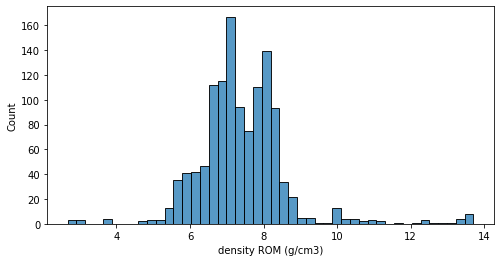

In [104]:
# density ROM (g/cm3)
plt.figure(figsize= (8,4))
sns.histplot(mec_df['density ROM (g/cm3)'])
plt.show()

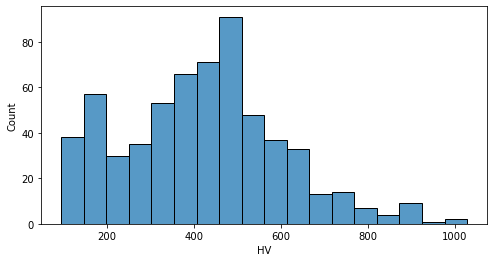

In [105]:
# HV
plt.figure(figsize= (8,4))
sns.histplot(mec_df['HV'])
plt.show()

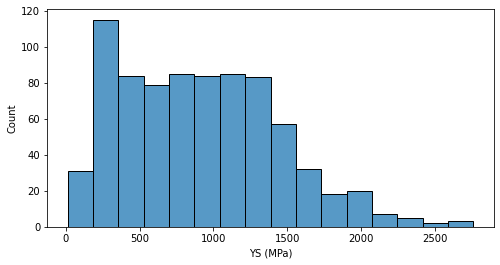

In [107]:
# YS (MPa)
plt.figure(figsize= (8,4))
sns.histplot(mec_df['YS (MPa)'])
plt.show()

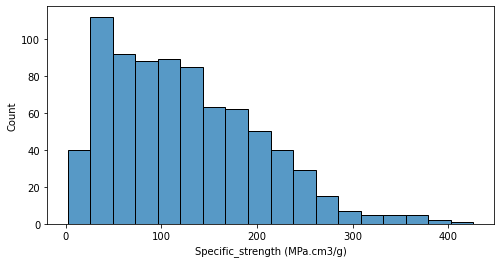

In [108]:
# Specific_strength (MPa.cm3/g)
plt.figure(figsize= (8,4))
sns.histplot(mec_df['Specific_strength (MPa.cm3/g)'])
plt.show()

---

In [124]:
df.drop(['density ROM (g/cm3)','HV','YS (MPa)'], axis= 1, inplace= True)

In [126]:
mec_df = df.dropna()

````python
mec_df.to_csv('cleaned_mec2.csv', index= False)
````

---

#### Preparar dados para Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('cleaned_mec2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 40 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Alloy                                            790 non-null    object 
 1   Nome tratado                                     790 non-null    object 
 2   Co                                               790 non-null    float64
 3   Fe                                               790 non-null    float64
 4   Ni                                               790 non-null    float64
 5   Si                                               790 non-null    float64
 6   Al                                               790 non-null    float64
 7   Cr                                               790 non-null    float64
 8   Mo                                               790 non-null    float64
 9   Nb                              

In [134]:
# Dropar os metadados
df.drop(['Alloy','Nome tratado'], axis= 1, inplace= True)

````python
df.to_csv("cleaned_mec3.csv", index= False)
````

In [3]:
# Dados semi-prontos
df = pd.read_csv("cleaned_mec3.csv")

In [6]:
df.head(2)

,Co,Fe,Ni,Si,Al,Cr,Mo,Nb,Ti,C,...,Entalpia de mix (dHmix) [kJ/mol],Entropia de mix (dSmix) [J/K.mol],Melting temperature (Tm) [K],Elastic-strain energy criterion (dHel) [kJ/mol],Type of phases,As cast/Homogenized right after casting,Cold/Hot Working,Heat treatment,temperatura de pico [°C],Specific_strength (MPa.cm3/g)
0,33.333333,33.333333,33.333333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.333333,9.134412,1769.150000,0.043021,FCC,As cast,No Working,No Heat treated,0.0,23.875881
1,30.769231,30.769231,30.769231,7.692308,0.0,0.0,0.0,0.0,0.0,0.0,...,-11.834320,10.686569,1762.842308,1.000238,FCC,As cast,No Working,No Heat treated,0.0,25.319524


#### Separar os dados em treino e teste

In [7]:
# Separar os dados de input e target
X = df.drop('Specific_strength (MPa.cm3/g)', axis= 1)
y = df['Specific_strength (MPa.cm3/g)'].copy()

In [10]:
# Separar os dados em treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

### Pipeline dos dados

Coletar o nome das colunas numéricas e categóricas
- ````num_att = df.select_dtypes('number').columns```` 
- ````cat_att = df.select_dtypes('object').columns````

Para os dados numéricos:
- ````sklearn.preprocessing.StandardScaler````

Para dados categóricos:
- ````sklearn.preprocessing.OneHotEncoder````

Aplicar, em pipeline, usando
- ````sklearn.compose.ColumnTransformer````

In [157]:
# Pipeline de transformação
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Features categóricas e features numéricas
num_att = X.select_dtypes('number').columns
cat_att = X.select_dtypes('object').columns

full_pipeline = ColumnTransformer([('num', StandardScaler(), num_att), 
                                   ('cat', OneHotEncoder(), cat_att)])

X_prep_train = full_pipeline.fit_transform(X_train)

In [188]:
# Aplicar a transformação nos dados de teste
X_prep_test = full_pipeline.fit_transform(X_test)

### Modelos de Regressão com Cross Validation

Os erros estão na mesma unidade do target

#### LinearRegression

In [184]:
# LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lr_regression = LinearRegression()

scores = cross_val_score(lr_regression, X_prep_train, y_train, scoring= 'neg_mean_squared_error', cv= 5)
model_scores = np.sqrt(-scores)
print(f"{round(model_scores.mean(),2)} \u00b1 {round(model_scores.std(),2)}")

25831.03 ± 46843.33


In [190]:
# Avaliar com dados de teste
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Instanciar e treinar
lr_regression = LinearRegression()
lr_regression.fit(X_prep_train, y_train)

# Predizer
y_pred = lr_regression.predict(X_prep_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"{round(lr_rmse,2)}")

36103.83


Erro muito grande, em ambas métricas de treino e teste. Não será usado para modelagem.

---

#### Lasso

In [193]:
# Lasso
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

# Escolher um modelo: Lasso
lasso_regression= Lasso(alpha= 0.001)

# Cross validation
scores = cross_val_score(lasso_regression, X_prep_train, y_train, scoring= 'neg_mean_squared_error', cv= 5)
model_scores = np.sqrt(-scores)
print(f"{round(model_scores.mean(),2)} \u00b1 {round(model_scores.std(),2)}")

58.84 ± 3.5


In [194]:
# Avaliar com dados de teste
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso

# Instanciar e treinar
lasso_regression= Lasso(alpha= 0.001)
lasso_regression.fit(X_prep_train, y_train)

# Predizer
y_pred = lasso_regression.predict(X_prep_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"{round(lr_rmse,2)}")

54.81


Erro pequeno,, com uma variação de 55-61 MPa.cm³/g, pode ser usado para indicar um valor bem próximo do que se espera.

---

##### DecisionTreeRegressor

In [201]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

# Instanciar
dt_regressor = DecisionTreeRegressor()

scores = cross_val_score(dt_regressor, X_prep_train, y_train, cv= 5, scoring= 'neg_mean_squared_error')
dt_scores = np.sqrt(-scores)
print(f"{round(dt_scores.mean(),2)} \u00b1 {round(dt_scores.std(),2)}")

57.28 ± 3.86


In [202]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

# Instanciar e treinar
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_prep_train, y_train)

# Predizer
y_pred = dt_regressor.predict(X_prep_test)
dt_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"{round(dt_rmse,2)}")

60.35


Um pouco pior que o Lasso, mas com a mesma conclusão.

---

##### RandomForestRegressor

In [203]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Instanciar
rf_regressor = RandomForestRegressor()

scores = cross_val_score(rf_regressor, X_prep_train, y_train, cv= 5, scoring= 'neg_mean_squared_error')
rf_scores = np.sqrt(-scores)
print(f"{round(rf_scores.mean(),2)} \u00b1 {round(rf_scores.std(),2)}")

45.39 ± 1.73


In [204]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Instanciar e treinar
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_prep_train, y_train)

# Predizer
y_pred = rf_regressor.predict(X_prep_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"{round(rf_rmse, 2)}")

46.61


É o melhor modelo até agora com menor erro em treino e teste

---

##### XGBoost Regressor

In [209]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

# Instanciar
xgb_regressor = XGBRegressor()

scores = cross_val_score(xgb_regressor, X_prep_train, y_train, cv= 5, scoring= 'neg_mean_squared_error')
xgb_scores = np.sqrt(-scores)
print(f"{round(xgb_scores.mean(),2)} \u00b1 {round(xgb_scores.std(),2)}")

48.0 ± 2.53


In [212]:
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

# Instanciar e treinar
xgb_regressor = XGBRegressor()
xgb_regressor.fit(X_prep_train, y_train)

# Predizer
y_pred = xgb_regressor.predict(X_prep_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"{round(xgb_rmse, 2)}")

48.6


Bom resultado também

---

##### Redes Neurais

In [16]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [18]:
df = pd.read_csv("cleaned_mec3.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 38 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Co                                               790 non-null    float64
 1   Fe                                               790 non-null    float64
 2   Ni                                               790 non-null    float64
 3   Si                                               790 non-null    float64
 4   Al                                               790 non-null    float64
 5   Cr                                               790 non-null    float64
 6   Mo                                               790 non-null    float64
 7   Nb                                               790 non-null    float64
 8   Ti                                               790 non-null    float64
 9   C                               

In [20]:
# Como os dados do target estão distribuídos
df["Specific_strength (MPa.cm3/g)"].describe()

count    790.000000
mean     124.437382
std       77.967650
min        1.976863
25%       59.945056
50%      112.148545
75%      172.242402
max      426.118358
Name: Specific_strength (MPa.cm3/g), dtype: float64

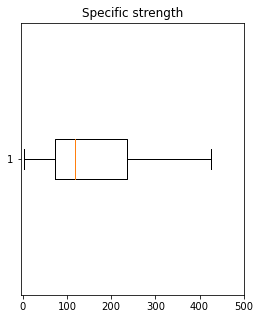

In [40]:
plt.figure(figsize= (4,5))
plt.boxplot(df["Specific_strength (MPa.cm3/g)"].describe(), vert= False)
plt.title('Specific strength')
plt.xlim(-5,500)
plt.show()

---

#### Preparação dos dados

In [22]:
# Separar os dados de input e target
X = df.drop('Specific_strength (MPa.cm3/g)', axis= 1)
y = df['Specific_strength (MPa.cm3/g)'].copy()

In [27]:
# Separar os dados em train_full e test
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size= 0.2)

In [28]:
# Separar os dados em train e val
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size= 0.2)

----

#### Processar os dados

In [47]:
#### Tratar os dados numericos e categóricos
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Definir colunas numéricas e categóricas
num_att = X.select_dtypes("number").columns
cat_att = X.select_dtypes("object").columns

full_pipeline = ColumnTransformer([('num', StandardScaler(), num_att),
                                   ('cat', OneHotEncoder(), cat_att)])

X_prep_train = full_pipeline.fit_transform(X_train)
X_prep_val = full_pipeline.fit_transform(X_val)
X_prep_test = full_pipeline.fit_transform(X_test)

In [56]:
# Inputs
X_prep_train.shape[1:]

(47,)

---

#### Redes Neurais

In [52]:
import tensorflow
from tensorflow import keras

---

##### Construir o modelo

In [103]:
# Perceptron
input_ = keras.layers.Input(shape= X_prep_train.shape[1:])
output = keras.layers.Dense(1)(input_)
model = keras.Model(inputs= input_, outputs= output)

In [71]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 47)]              0         
                                                                 
 dense_3 (Dense)             (None, 1)                 48        
                                                                 
Total params: 48
Trainable params: 48
Non-trainable params: 0
_________________________________________________________________


---

##### Compilando os dados

In [108]:
model.compile(loss= 'mse',
              optimizer= 'sgd',
              metrics= 'mse')

---

##### Treinar

In [109]:
es = keras.callbacks.EarlyStopping(patience= 10, restore_best_weights= True)
history = model.fit(X_prep_train,
                    y_train,
                    epochs= 100,
                    callbacks= es,
                    validation_data= [X_prep_val, y_val])

Epoch 1/100
16/16 [==============================] - 0s 11ms/step - loss: 10549.5605 - mse: 10549.5605 - val_loss: 6880.9863 - val_mse: 6880.9863
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 4684.9824 - mse: 4684.9824 - val_loss: 4845.9185 - val_mse: 4845.9185
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 3700.2417 - mse: 3700.2417 - val_loss: 4299.6133 - val_mse: 4299.6133
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 3456.5176 - mse: 3456.5176 - val_loss: 4167.4297 - val_mse: 4167.4297
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 3349.8076 - mse: 3349.8076 - val_loss: 4009.6477 - val_mse: 4009.6477
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 3291.6614 - mse: 3291.6614 - val_loss: 3931.5234 - val_mse: 3931.5234
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 3243.6506 - mse: 3243.6506 - val_loss: 3891.5510 - val_mse: 3891.5

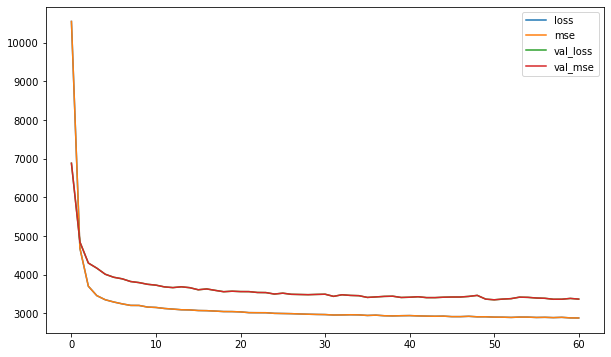

In [110]:
pd.DataFrame(history.history).plot(figsize= (10,6))
plt.show()

In [111]:
# RMSE
np.sqrt(pd.DataFrame(history.history).iloc[-1,:])

loss        53.650303
mse         53.650303
val_loss    58.023525
val_mse     58.023525
Name: 60, dtype: float64

---

##### Evaluate the model

In [112]:
model.evaluate(X_prep_test, y_test)

5/5 [==============================] - 0s 1ms/step - loss: 3197.4585 - mse: 3197.4585


[3197.45849609375, 3197.45849609375]

In [113]:
# RMSE
np.sqrt(model.evaluate(X_prep_test, y_test))

5/5 [==============================] - 0s 1ms/step - loss: 3197.4585 - mse: 3197.4585


array([56.5460741, 56.5460741])

---

##### Conclusão
O modelo Perceptron atingiu um RMSE de:
- Dados de treino : 53.41
- Dados de validação : 58.04
- Dados de teste : 56.42

---

#### Testando modelos com camadas ocultas

In [130]:
# Modelos
input_ = keras.layers.Input(shape= X_prep_train.shape[1:])
hidden1 = keras.layers.Dense(200, activation= 'relu')(input_)
hidden2 = keras.layers.Dense(200, activation= 'relu')(hidden1)
hidden3 = keras.layers.Dense(200, activation= 'relu')(hidden2)
output = keras.layers.Dense(1)(hidden3)
model = keras.Model(inputs= input_, outputs= output)

# Compile
model.compile(loss= 'mse',
              optimizer= 'adam',
              metrics= 'mse')

# Treinar
es = keras.callbacks.EarlyStopping(patience= 10, restore_best_weights= True)
history = model.fit(X_prep_train,
                    y_train,
                    epochs= 200,
                    callbacks= es,
                    validation_data= [X_prep_val, y_val])

Epoch 1/200
16/16 [==============================] - 0s 10ms/step - loss: 19354.1973 - mse: 19354.1973 - val_loss: 18377.5195 - val_mse: 18377.5195
Epoch 2/200
16/16 [==============================] - 0s 4ms/step - loss: 11437.2236 - mse: 11437.2236 - val_loss: 6584.8623 - val_mse: 6584.8623
Epoch 3/200
16/16 [==============================] - 0s 4ms/step - loss: 5384.1562 - mse: 5384.1562 - val_loss: 4454.8540 - val_mse: 4454.8540
Epoch 4/200
16/16 [==============================] - 0s 4ms/step - loss: 3680.7810 - mse: 3680.7810 - val_loss: 3704.0964 - val_mse: 3704.0964
Epoch 5/200
16/16 [==============================] - 0s 4ms/step - loss: 3128.3491 - mse: 3128.3491 - val_loss: 3552.4185 - val_mse: 3552.4185
Epoch 6/200
16/16 [==============================] - 0s 4ms/step - loss: 2919.2295 - mse: 2919.2295 - val_loss: 3294.9507 - val_mse: 3294.9507
Epoch 7/200
16/16 [==============================] - 0s 4ms/step - loss: 2760.2507 - mse: 2760.2507 - val_loss: 3325.4749 - val_mse: 33

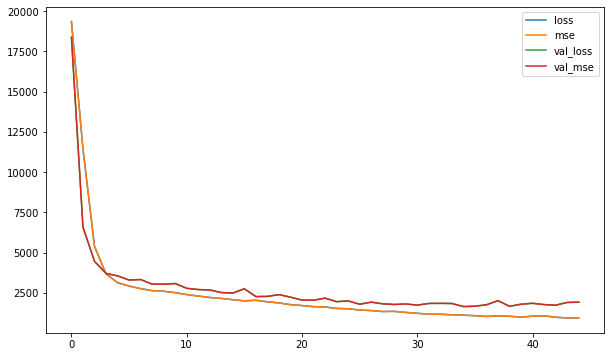

In [131]:
pd.DataFrame(history.history).plot(figsize= (10,6))
plt.show()

In [132]:
# RMSE
np.sqrt(pd.DataFrame(history.history).iloc[-1,:])

loss        30.663920
mse         30.663920
val_loss    43.830996
val_mse     43.830996
Name: 44, dtype: float64

In [134]:
# RMSE
np.sqrt(model.evaluate(X_prep_test, y_test))

5/5 [==============================] - 0s 2ms/step - loss: 2376.3086 - mse: 2376.3086


array([48.74739576, 48.74739576])

---

##### Testando algums dados

In [164]:
X_new = X_test.iloc[:100,:]
y_new = y_test[:100]

In [165]:
X_new.shape

(100, 37)

In [166]:
X_prep_new = full_pipeline.fit_transform(X_new)

In [167]:
X_prep_new.shape

(100, 47)

In [168]:
y_pred = model.predict(X_prep_new)

4/4 [==============================] - 0s 2ms/step


In [182]:
comp_df = pd.DataFrame({'Pred':y_pred.flatten(), 'Real': y_new})
comp_df['diff'] = np.sqrt((comp_df['Pred'] - comp_df['Real'])**2)

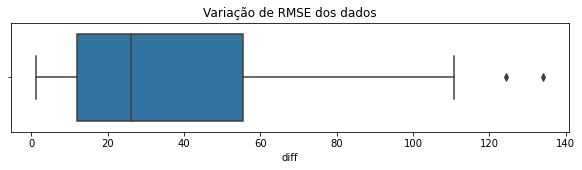

In [202]:
# Verificar a distribuição dos dados de erro
plt.figure(figsize= (10,2))
sns.boxplot(comp_df['diff'])
plt.title("Variação de RMSE dos dados")
plt.show()

In [188]:
# Média de erro
np.sum(comp_df['diff'])/len(comp_df['diff'])

37.356672246023464

---

### Fazer    24/01/2025

- Usar RandomForestRegressor e XGBRegressor (X)
- Testar com somente YS (X)
- Fazer GridSearch em RandomForest  (X)
- Fazer PCA  (X)

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [61]:
df = pd.read_csv("cleaned_mec.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 43 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Alloy                                            1217 non-null   object 
 1   Nome tratado                                     1217 non-null   object 
 2   Co                                               1217 non-null   float64
 3   Fe                                               1217 non-null   float64
 4   Ni                                               1217 non-null   float64
 5   Si                                               1217 non-null   float64
 6   Al                                               1217 non-null   float64
 7   Cr                                               1217 non-null   float64
 8   Mo                                               1217 non-null   float64
 9   Nb                            

````python
df.to_csv("full_mec.csv", index= False)
````

In [62]:
df = pd.read_csv("full_mec.csv")

In [63]:
df_ys = df.drop(['density ROM (g/cm3)','HV','Specific_strength (MPa.cm3/g)'], axis= 1)
df_ys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 40 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Alloy                                            1217 non-null   object 
 1   Nome tratado                                     1217 non-null   object 
 2   Co                                               1217 non-null   float64
 3   Fe                                               1217 non-null   float64
 4   Ni                                               1217 non-null   float64
 5   Si                                               1217 non-null   float64
 6   Al                                               1217 non-null   float64
 7   Cr                                               1217 non-null   float64
 8   Mo                                               1217 non-null   float64
 9   Nb                            

In [64]:
df_ys = df_ys.dropna()

In [65]:
df_ys.drop(["Alloy","Nome tratado"], axis= 1, inplace= True)

<AxesSubplot:xlabel='YS (MPa)'>

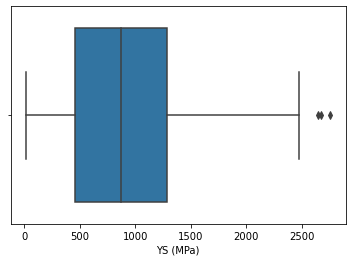

In [66]:
sns.boxplot(df_ys['YS (MPa)'])

In [67]:
# Separar os dados em input e target
X = df_ys.drop("YS (MPa)", axis= 1)
y = df_ys["YS (MPa)"].copy()

In [68]:
# Separar dados de train e test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [69]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Separar as colunas numéricas e categóricas
num_att = X.select_dtypes('number').columns
cat_att = X.select_dtypes('object').columns

# Applying Pipeline
full_pipeline = ColumnTransformer([('num', StandardScaler(), num_att),
                                   ('cat', OneHotEncoder(), cat_att)])

# Preprocessing on input datas
X_prep_train = full_pipeline.fit_transform(X_train)
X_prep_test = full_pipeline.fit_transform(X_test)

##### Applying models

In [70]:
# Aplicando o modelo de RandomForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Instanciar
rf_regressor = RandomForestRegressor()

# Cross validation
scores = np.sqrt(-cross_val_score(rf_regressor, X_prep_train, y_train, scoring= "neg_mean_squared_error", cv= 5))
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

317.04 ± 30.75


In [71]:
# Evaluate
from sklearn.metrics import mean_squared_error

rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_prep_train, y_train)

y_pred = rf_regressor.predict(X_prep_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE : {rf_rmse}")

RMSE : 324.5056869101306


---

In [72]:
# Aplicando o modelo de XGBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

# Instanciar
xgb_regressor = XGBRegressor()

# Cross validation
scores = np.sqrt(-cross_val_score(xgb_regressor, X_prep_train, y_train, scoring= 'neg_mean_squared_error', cv= 5))
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

328.72 ± 31.75


In [73]:
from sklearn.metrics import mean_squared_error

# Instanciar e treinar
xgb_regressor = XGBRegressor()
xgb_regressor.fit(X_prep_train, y_train)

# Predizer e medir erro
y_pred = xgb_regressor.predict(X_prep_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE : {round(xgb_rmse,2)}")

RMSE : 304.3


---

##### Aplicar GridSearch em RandomForestRegressor

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# param_grid
param_grid = {'n_estimators': [50, 100, 150],
              'max_depth': [3,6, 9, 12]}

# Instanciar e treinar
rf_regressor = RandomForestRegressor()
rf_grid = GridSearchCV(rf_regressor, param_grid= param_grid, scoring= 'neg_mean_squared_error', cv= 5, return_train_score= True)
rf_grid.fit(X_prep_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 6, 9, 12],
                         'n_estimators': [50, 100, 150]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [75]:
# Predizer
from sklearn.metrics import mean_squared_error

rf_model = rf_grid.best_estimator_
y_pred = rf_model.predict(X_prep_test)
rf_grid_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE com RandomForest e GridSearch : {round(rf_grid_rmse,2)}")

RMSE com RandomForest e GridSearch : 326.03


##### RandomForestRegressor com Tunning (GridSearch) não alterou muito o erro.

---

#### Aplicar PCA

In [106]:
from sklearn.decomposition import PCA
"""
Os dados precisam estar todos numéricos. Portanto, aplicar os pré-processamentos (StandardScaler e OneHotEncoder)
"""
# Instance and Transform data
pca = PCA(n_components= 21)
X_pca_train = pca.fit_transform(X_prep_train)
X_pca_test = pca.fit_transform(X_prep_test)

##### Alguns atributos de PCA

In [107]:
# Precisa aumentar o número de componentes
pca.explained_variance_ratio_

array([0.26153151, 0.10637848, 0.08752251, 0.07528253, 0.05911294,
       0.05242907, 0.04156788, 0.03870105, 0.03828479, 0.03148257,
       0.03041356, 0.02429536, 0.02214366, 0.02084856, 0.01868852,
       0.01579372, 0.0123986 , 0.01124913, 0.00797375, 0.00777668,
       0.00659626])

In [108]:
# Caso queira saber a feature importance. Está na ordem das colunas de X_pca_train
pca.components_

array([[-1.97637860e-01, -2.45814346e-01, -2.75553522e-01,
         9.52288249e-02, -2.64201325e-02, -1.83163334e-01,
         1.64925788e-01,  3.01922207e-01,  2.62178996e-01,
         4.57806096e-02,  1.75836153e-01,  2.29124500e-01,
        -9.61570852e-02, -5.41366028e-02,  1.26217745e-29,
         3.94430453e-31,  1.23259516e-32, -7.92889759e-03,
        -7.92889759e-03, -2.36938292e-02, -0.00000000e+00,
         2.17854516e-01,  1.37815091e-01,  1.04761498e-01,
         2.20533060e-01,  2.12420213e-01, -3.19307921e-01,
         9.37185532e-02, -9.66799719e-02,  8.89407276e-02,
         2.66087715e-01,  2.89514793e-01, -8.33154764e-02,
         6.55570343e-02, -1.89583633e-02, -1.09331903e-02,
         6.70902565e-02, -5.86046566e-02, -4.66463225e-02,
         2.49524186e-03,  5.89684866e-02, -5.89684866e-02,
        -6.35715310e-02, -1.71770852e-03,  6.52892395e-02,
        -4.94720338e-02,  4.94720338e-02],
       [-1.03756056e-01, -7.52936197e-02,  9.40270824e-03,
         1.42

In [110]:
# Caso queira saber quantos componentes o PCA foi isntanciado
pca.n_components_

21

---

In [111]:
# Aplicar DecisionTree
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

# Instance and training
rf_regressor = RandomForestRegressor()

# Cross validation score
scores = np.sqrt(-cross_val_score(rf_regressor, X_pca_train, y_train, scoring= 'neg_mean_squared_error', cv= 5))
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

339.22 ± 11.85


In [112]:
# Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Instanciar e fitar
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_pca_train, y_train)

# Predict
y_pred = rf_regressor.predict(X_pca_test)
rf_pca_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE : {rf_pca_rmse}")

RMSE : 449.33252395067785


#### Conclusão do uso de PCA em RandomForest

- O RMSE usando PCA foi de 339 em comparação ao uso de todos os dados, 311 com os dados de **treino**.
- O RMSE usando PCA foi de 449.33 em comparação ao uso de todos os dados, 294 com os dados de **teste**.

**PCA, para RandomForestRegressor, os dados sobreajustaram (overfit) com os dados de treino.**

---

#### Trabalhando com HV

In [113]:
# Importando as bibliotecas em comum
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [114]:
hv_df = pd.read_csv("full_mec.csv")
hv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 43 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Alloy                                            1217 non-null   object 
 1   Nome tratado                                     1217 non-null   object 
 2   Co                                               1217 non-null   float64
 3   Fe                                               1217 non-null   float64
 4   Ni                                               1217 non-null   float64
 5   Si                                               1217 non-null   float64
 6   Al                                               1217 non-null   float64
 7   Cr                                               1217 non-null   float64
 8   Mo                                               1217 non-null   float64
 9   Nb                            

In [115]:
# Dropar colunas
hv_df.drop(["Alloy", "Nome tratado", "density ROM (g/cm3)", "YS (MPa)", "Specific_strength (MPa.cm3/g)"], axis= 1, inplace= True)

In [116]:
hv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 38 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Co                                               1217 non-null   float64
 1   Fe                                               1217 non-null   float64
 2   Ni                                               1217 non-null   float64
 3   Si                                               1217 non-null   float64
 4   Al                                               1217 non-null   float64
 5   Cr                                               1217 non-null   float64
 6   Mo                                               1217 non-null   float64
 7   Nb                                               1217 non-null   float64
 8   Ti                                               1217 non-null   float64
 9   C                             

In [121]:
# Dropar valores nulos
hv_df = hv_df.dropna()

In [123]:
# Separando os dados
X = hv_df.drop("HV", axis= 1)
y = hv_df["HV"].copy()

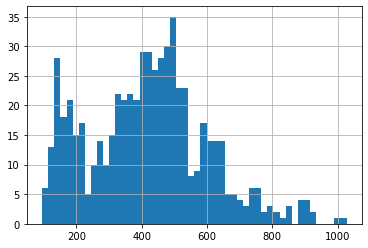

In [137]:
# distribuição de valores de HV
hv_df['HV'].hist(bins= 50)
plt.show()

In [138]:
# Variação dos dados de HV
print(f"{hv_df['HV'].mean()} \u00b1 {hv_df['HV'].std()}")

420.0344499178982 ± 181.47574511270565


In [124]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [131]:
# Aplicando preprocessamento dos dados
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Colunas numéricas e categóricas
num_att = X.select_dtypes("number").columns
cat_att = X.select_dtypes("object").columns

# Pipeline
full_pipeline = ColumnTransformer([("num", StandardScaler(), num_att),
                                   ("cat", OneHotEncoder(), cat_att)])

# Fit_transform
X_prep_train = full_pipeline.fit_transform(X_train)
X_prep_test = full_pipeline.fit_transform(X_test)

In [134]:
# Aplicando RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Instanciar
rf_regressor = RandomForestRegressor()

# Cross validation
scores = np.sqrt(-cross_val_score(rf_regressor, X_prep_train, y_train, scoring= 'neg_mean_squared_error', cv= 5))
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

98.22 ± 9.37


In [141]:
# Avaliar
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Instanciar e treinar
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_prep_train, y_train)

# Predizer e avaliar
y_pred = rf_regressor.predict(X_prep_test)
rf_hv_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE : {round(rf_hv_rmse,2)}")

RMSE : 79.32


#### Testar com alguns valores

In [142]:
# Testar alguns valores
X_new = X_prep_test[:10]
y_new = y_test[:10]

y_new_pred = rf_regressor.predict(X_new)

In [146]:
comparison_hv = pd.DataFrame({"HV_real": y_new,
                              "HV_pred": y_new_pred})

comparison_hv['diff'] = comparison_hv['HV_real'] - comparison_hv['HV_pred']
comparison_hv

,HV_real,HV_pred,diff
39,484.0,475.029500,8.970500
69,487.0,497.971600,-10.971600
56,569.0,562.249000,6.751000
328,505.0,503.995000,1.005000
202,328.0,400.091379,-72.091379
461,685.0,652.111000,32.889000
854,360.0,485.830278,-125.830278
899,309.1,366.803533,-57.703533
831,683.9,397.664917,286.235083
469,420.0,415.989250,4.010750


---

### Aplicando Lasso com Polymonial Features    25/01/2025

In [175]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [176]:
df = pd.read_csv('full_mec.csv')

In [177]:
df.drop(['Alloy','Nome tratado','density ROM (g/cm3)','HV', 'YS (MPa)'], axis= 1, inplace= True)

In [178]:
df.dropna(inplace= True)

#### Separar os dados

In [179]:
df.columns

Index(['Co', 'Fe', 'Ni', 'Si', 'Al', 'Cr', 'Mo', 'Nb', 'Ti', 'C', 'V', 'Zr',
       'Mn', 'Cu', 'B', 'Y', 'Sn', 'Li', 'Mg', 'Zn', 'Sc', 'Hf', 'Ta', 'W',
       'atomic radius (δ) [%]', 'Electronegativity (Δχ)',
       'Valence Electron Concentration (VEC)', 'Ω parameter',
       'Entalpia de mix (dHmix) [kJ/mol]', 'Entropia de mix (dSmix) [J/K.mol]',
       'Melting temperature (Tm) [K]',
       'Elastic-strain energy criterion (dHel) [kJ/mol]', 'Type of phases',
       'As cast/Homogenized right after casting', 'Cold/Hot Working',
       'Heat treatment', 'temperatura de pico [°C]',
       'Specific_strength (MPa.cm3/g)'],
      dtype='object')

In [180]:
# Separar os dados
X = df.drop('Specific_strength (MPa.cm3/g)', axis= 1)
y = df['Specific_strength (MPa.cm3/g)'].copy()

In [181]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

#### Preprocessing input data

In [182]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder

# Construir o pipeline para dados numéricos
num_pipeline = Pipeline([("scaler", StandardScaler()),
                         ("poly", PolynomialFeatures(degree= 2))])

# Separar os dados numéricos e categóricos
num_att = X.select_dtypes("number").columns
cat_att = X.select_dtypes("object").columns

# Pipeline de pré-processamento
full_pipeline = ColumnTransformer([("num", num_pipeline, num_att),
                                   ("cat", OneHotEncoder(), cat_att)])

# Transformar
X_prep_train = full_pipeline.fit_transform(X_train)
X_prep_test = full_pipeline.fit_transform(X_test)

#### Applying Lasso

In [25]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

# Instanciar
lasso_regression = Lasso(alpha= 0.001)

# Scores de Cross validation
scores = np.sqrt(-cross_val_score(lasso_regression, X_prep_train, y_train, scoring= "neg_mean_squared_error", cv= 5))
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

217.24 ± 178.45


In [26]:
# Evaluate com test
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Instanciar e treinar
lasso_regression = Lasso(alpha= 0.001)
lasso_regression.fit(X_prep_train, y_train)

# Predict
y_pred = lasso_regression.predict(X_prep_test)
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"{round(lasso_rmse,2)}")

135.42


---

In [183]:
# Applying RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Instanciar
rf_regressor = RandomForestRegressor()

# Scores de Cross Validation
scores = np.sqrt(-cross_val_score(rf_regressor, X_prep_train, y_train, scoring= 'neg_mean_squared_error', cv= 5))
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

44.17 ± 2.13


In [184]:
# Evaluate
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Instanciar e treinar
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_prep_train, y_train)

# Predict
y_pred = rf_regressor.predict(X_prep_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE : {round(rf_rmse,2)}")

RMSE : 44.68


---

#### Conclusão do uso de Polynomial Features

Sem o uso de ````sklearn.preprocessing.PolynomialFeatures````, atingimos um RMSE de 58.84 $\pm$ 3.5 para os dados de treino e 54.81 para os dados de teste para Lasso. Para RandomForestRegressor, o modelo atingiu 45.39 $\pm$ 1.73 para os dados de treino e 46.61 para os dados de teste.

Usando polynomial features, o erro aumentou, para 217.24 $\pm$ 178.45 para os dados de treino e 135.42 para os dados de teste para o Lasso.

Para RandomForestRegressor, o erro dos dados de treino foi de 43.57 $\pm$ 4.71 e 41.89 para os dados de teste. Houve uma pequena melhora em comparação com o aumento de custo de Polynomial Features.

O uso de Polynomial Features não reduziu o erro do modelo de modo considerado.

**Melhor valor de RMSE, RandomForestRegressor com Polynomial Features, treino: 43.57 $\pm$ 4.71 e teste: 41.89**

---

### Testando transformações nos dados de input

Verificar a normalidade dos dados e aplicar box-cox transformation

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [73]:
df = pd.read_csv("full_mec.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 43 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Alloy                                            1217 non-null   object 
 1   Nome tratado                                     1217 non-null   object 
 2   Co                                               1217 non-null   float64
 3   Fe                                               1217 non-null   float64
 4   Ni                                               1217 non-null   float64
 5   Si                                               1217 non-null   float64
 6   Al                                               1217 non-null   float64
 7   Cr                                               1217 non-null   float64
 8   Mo                                               1217 non-null   float64
 9   Nb                            

In [74]:
df.drop(['Alloy','Nome tratado','density ROM (g/cm3)','HV','YS (MPa)'], axis= 1, inplace= True)
df.dropna(inplace= True)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 790 entries, 0 to 1216
Data columns (total 38 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Co                                               790 non-null    float64
 1   Fe                                               790 non-null    float64
 2   Ni                                               790 non-null    float64
 3   Si                                               790 non-null    float64
 4   Al                                               790 non-null    float64
 5   Cr                                               790 non-null    float64
 6   Mo                                               790 non-null    float64
 7   Nb                                               790 non-null    float64
 8   Ti                                               790 non-null    float64
 9   C                              

#### Teste de Normalidade: Shapiro-Wilk

In [76]:
# Fazer o teste de normalização para os dados numéricos
num_att = df.select_dtypes("number").columns

In [77]:
from scipy import stats
"""
H0 : A amostra é normalmente distribuída
H1: A amostra não e normalmente distribuída
Shapiro-Wilk: p-value > 0.05 -> não rejeitar H0, else rejeitar H0.
"""
normal = []

for feat in df[num_att]:
    stat, p_value = stats.shapiro(df[feat])
    if p_value > 0.05:
        normal.append(True)
    else:
        normal.append(False)

# Colocar num dataframe
normal_df = pd.DataFrame({"Feat":list(df[num_att]), "Normal?": normal})

In [78]:
normal_df.shape

(34, 2)

In [79]:
X = df.drop("Specific_strength (MPa.cm3/g)", axis= 1)

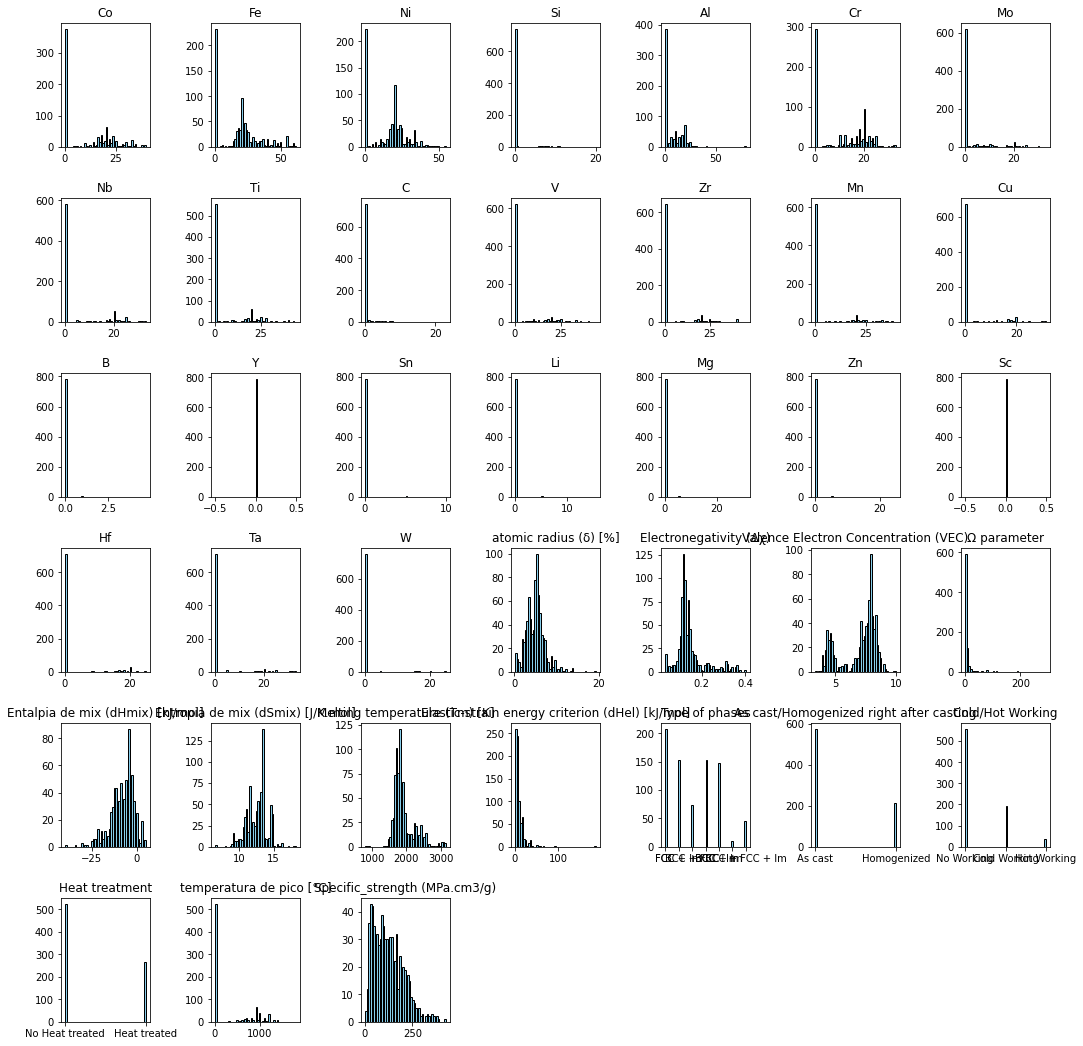

In [80]:
# Histogramas dos dados
nrows = 6  # 6 linhas
ncols = 7  # 7 colunas (porque 6x7 = 42, acomodando 38 histogramas)

# Criando a figura e os subgráficos
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 15))

# Ajustando o layout para evitar sobreposição
plt.tight_layout(pad=3.0)

# Plotando os histogramas
for i, ax in enumerate(axes.flat):
    if i < df.shape[1]:
        ax.hist(df.iloc[:, i], bins=50, color='skyblue', edgecolor='black')
        ax.set_title(df.columns[i])  # Usando o nome da coluna como título do histograma
    else:
        ax.axis('off')  # Desativa os subgráficos não utilizados

plt.show()

### Normalidade
Todos dos dados de input não apresentam normalidade

---

### Transformação Box_Cox

#### Construindo outro dataframe transformado

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 790 entries, 0 to 1216
Data columns (total 38 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Co                                               790 non-null    float64
 1   Fe                                               790 non-null    float64
 2   Ni                                               790 non-null    float64
 3   Si                                               790 non-null    float64
 4   Al                                               790 non-null    float64
 5   Cr                                               790 non-null    float64
 6   Mo                                               790 non-null    float64
 7   Nb                                               790 non-null    float64
 8   Ti                                               790 non-null    float64
 9   C                              

In [97]:
X_num = df.select_dtypes("number")
X_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 790 entries, 0 to 1216
Data columns (total 34 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Co                                               790 non-null    float64
 1   Fe                                               790 non-null    float64
 2   Ni                                               790 non-null    float64
 3   Si                                               790 non-null    float64
 4   Al                                               790 non-null    float64
 5   Cr                                               790 non-null    float64
 6   Mo                                               790 non-null    float64
 7   Nb                                               790 non-null    float64
 8   Ti                                               790 non-null    float64
 9   C                              

In [99]:
from sklearn.preprocessing import PowerTransformer

power_transformer = PowerTransformer(method= "yeo-johnson", standardize= True)
X_pt_num = power_transformer.fit_transform(X_num)

X_pt_num_df = pd.DataFrame(X_pt_num, columns= X_num.columns)

In [105]:
X_pt_num_df

,Co,Fe,Ni,Si,Al,Cr,Mo,Nb,Ti,C,...,atomic radius (δ) [%],Electronegativity (Δχ),Valence Electron Concentration (VEC),Ω parameter,Entalpia de mix (dHmix) [kJ/mol],Entropia de mix (dSmix) [J/K.mol],Melting temperature (Tm) [K],Elastic-strain energy criterion (dHel) [kJ/mol],temperatura de pico [°C],Specific_strength (MPa.cm3/g)
0,1.243710,0.915918,1.209623,-0.261272,-0.997503,-1.246188,-0.523317,-0.593437,-0.645561,-0.253854,...,-2.590432,-2.987893,1.894023,1.292099,1.075758,-2.094071,-0.372484,-2.465843,-0.712405,-1.657300
1,1.191464,0.813340,1.076574,3.905622,-0.997503,-1.246188,-0.523317,-0.593437,-0.645561,-0.253854,...,-1.388285,-3.010079,1.397149,-1.034278,-0.611873,-1.189200,-0.396061,-1.584474,-0.712405,-1.610262
2,1.143301,0.721824,0.958804,3.905622,-0.997503,-1.246188,-0.523317,-0.593437,-0.645561,-0.253854,...,-1.022139,-3.034048,1.008587,-1.689228,-1.604697,-0.850061,-0.416374,-1.173743,-0.712405,-0.645888
3,1.098652,0.639515,0.853652,3.905622,-0.997503,-1.246188,-0.523317,-0.593437,-0.645561,-0.253854,...,-0.811236,-3.058761,0.698298,-2.016480,-2.273163,-0.707243,-0.434058,-0.930637,-0.712405,0.963017
4,1.191464,0.813340,1.076574,-0.261272,0.650675,-1.246188,-0.523317,-0.593437,-0.645561,-0.253854,...,-0.353148,-1.373050,1.303475,-0.135915,0.239623,-1.189200,-0.619192,-0.847952,-0.712405,-1.792864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,-1.032815,-1.421650,-1.456698,-0.261272,-0.997503,-1.246188,-0.523317,1.734704,-0.645561,3.978365,...,2.443331,2.368525,-1.364735,-0.801734,-1.678645,-0.291766,2.777099,1.986927,1.442801,-0.258053
786,-1.032815,-1.421650,-1.456698,-0.261272,-0.997503,-1.246188,-0.523317,1.733144,-0.645561,3.978365,...,3.249502,2.448844,-1.375684,-1.341175,-2.849860,-0.071338,2.812533,2.391174,1.442801,-0.111505
787,-1.032815,0.980405,1.293817,-0.261272,-0.997503,0.878504,-0.523317,-0.593437,-0.645561,-0.253854,...,-1.095116,-0.223592,0.912977,0.410652,0.548647,-1.180493,-0.163268,-1.208373,-0.712405,-1.635841
788,-1.032815,0.916767,1.210728,-0.261272,-0.997503,0.825947,-0.523317,-0.593437,1.228638,-0.253854,...,-0.211901,-0.035067,0.701014,-0.186406,0.023042,-0.513787,-0.144238,-0.293488,-0.712405,-1.142229


#### Checando a normalidade

IndexError: single positional indexer is out-of-bounds

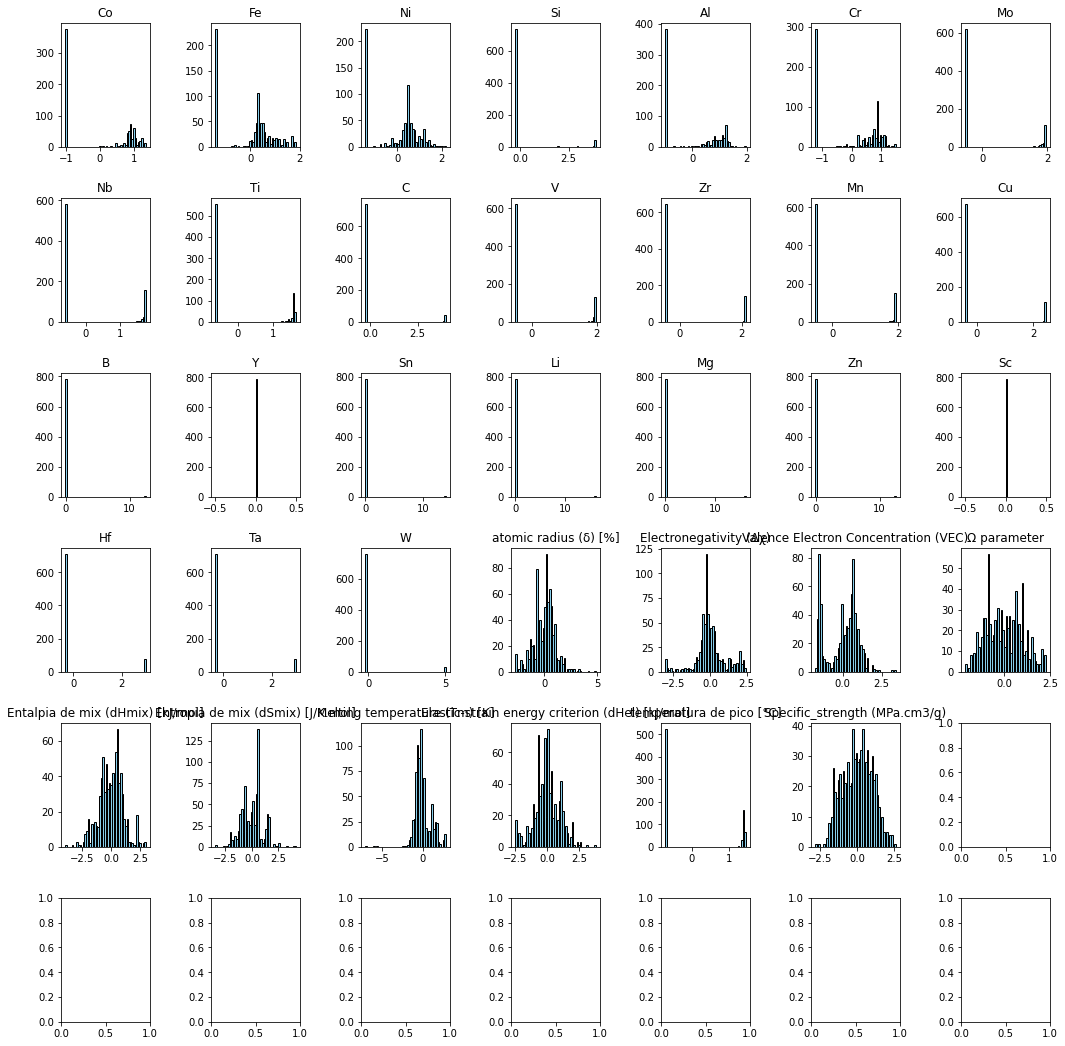

In [102]:
# Histogramas dos dados
nrows = 6  # 6 linhas
ncols = 7  # 7 colunas (porque 6x7 = 42, acomodando 38 histogramas)

# Criando a figura e os subgráficos
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 15))

# Ajustando o layout para evitar sobreposição
plt.tight_layout(pad=3.0)

# Plotando os histogramas
for i, ax in enumerate(axes.flat):
    if i < df.shape[1]:
        ax.hist(X_pt_num_df.iloc[:, i], bins=50, color='skyblue', edgecolor='black')
        ax.set_title(X_pt_num_df.columns[i])  # Usando o nome da coluna como título do histograma
    else:
        ax.axis('off')  # Desativa os subgráficos não utilizados

plt.show()

In [103]:
from scipy import stats
"""
H0 : A amostra é normalmente distribuída
H1: A amostra não e normalmente distribuída
Shapiro-Wilk: p-value > 0.05 -> não rejeitar H0, else rejeitar H0.
"""
normal = []

for feat in X_pt_num_df[num_att]:
    stat, p_value = stats.shapiro(X_pt_num_df[feat])
    if p_value > 0.05:
        normal.append(True)
    else:
        normal.append(False)

# Colocar num dataframe
normal_transf_df = pd.DataFrame({"Feat":list(X_pt_num_df[num_att]), "Normal?": normal})

----

#### Usar RandomForestRegressor com ````sklearn.preprocessing.PowerTransformer````

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [110]:
df = pd.read_csv("full_mec.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 43 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Alloy                                            1217 non-null   object 
 1   Nome tratado                                     1217 non-null   object 
 2   Co                                               1217 non-null   float64
 3   Fe                                               1217 non-null   float64
 4   Ni                                               1217 non-null   float64
 5   Si                                               1217 non-null   float64
 6   Al                                               1217 non-null   float64
 7   Cr                                               1217 non-null   float64
 8   Mo                                               1217 non-null   float64
 9   Nb                            

In [111]:
df = df.drop(['Alloy', 'Nome tratado', 'density ROM (g/cm3)','HV','YS (MPa)'], axis= 1)
df.dropna(inplace= True)

In [113]:
# Separar os dados
X = df.drop("Specific_strength (MPa.cm3/g)", axis = 1)
y = df['Specific_strength (MPa.cm3/g)'].copy()

In [114]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [117]:
# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer, OneHotEncoder

# separar numéricos de categóricos
num_att = X.select_dtypes("number").columns
cat_att = X.select_dtypes("object").columns

# Pipeline
full_pipeline = ColumnTransformer([('num', PowerTransformer(), num_att),
                                   ('cat', OneHotEncoder(), cat_att)])

# Aplicando a transformação
X_prep_train = full_pipeline.fit_transform(X_train)
X_prep_test = full_pipeline.fit_transform(X_test)

In [118]:
# Aplicando Lasso
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

# Instanciar
lasso_regressor = Lasso(alpha= 0.001)

# Scores por Cross Validation
scores = np.sqrt(-cross_val_score(lasso_regressor, X_prep_train, y_train, scoring= 'neg_mean_squared_error', cv= 5))
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

56.94 ± 2.24


In [119]:
# Evaluating
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Instanciar e treinar
lasso_regressor = Lasso(alpha= 0.001)
lasso_regressor.fit(X_prep_train, y_train)

# Predict
y_pred = lasso_regressor.predict(X_prep_test)
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"{round(lasso_rmse,2)}")

55.91


#### Conclusão com uso de PowerTransformer em Lasso

Sem ````sklearn.preprocessing.PowerTransformer```` atingimos com Lasso um RMSE de 58.84 $\pm$ 3.5 para dados de treino e 54.81 para dados de teste.

Com ````sklearn.preprocessing.PowerTransformer````, atingimos para o treino 56.9 $\pm$ 2.24 para dados de treino e 55.91 para dados de teste.

---

### Aplicando para RandomForest

In [120]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Instanciar
rf_regressor = RandomForestRegressor()

# Scores com Cross validation
scores = np.sqrt(-cross_val_score(rf_regressor, X_prep_train, y_train, scoring= 'neg_mean_squared_error', cv= 5))
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

44.88 ± 1.74


In [121]:
# Evaluating
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Instanciar e treinar
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_prep_train, y_train)

# Predict
y_pred = rf_regressor.predict(X_prep_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"{round(rf_rmse,2)}")

58.85


### Conclusões utilizando PowerTransformer (yeo-johnson) e RandomForestRegressor

Sem o uso de ````sklearn.preprocessing.PowerTransformer````, atingimos um RMSE de 45.39 $\pm$ 1.73 para os dados de treino e 46.61 para os dados de teste.

Com o uso da transformação Yeo-Johnson, atingimos um RMSE DE 44.88 $\pm$ 1.74 para os dados de treino e 58.85 para os dados de teste, indicando que talvez tenha sobreajustado (overfit)

---

#### Conclusão final:
Para aplicar modelos de ML e RN para os dados, somente fazer um StandardScaler (talvez aplicar um RobustScaler) e o OneHotEncoder pra preprocessar os dados de input.

---

#### Testar

- Aplicar RobustScaler

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("full_mec.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 43 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Alloy                                            1217 non-null   object 
 1   Nome tratado                                     1217 non-null   object 
 2   Co                                               1217 non-null   float64
 3   Fe                                               1217 non-null   float64
 4   Ni                                               1217 non-null   float64
 5   Si                                               1217 non-null   float64
 6   Al                                               1217 non-null   float64
 7   Cr                                               1217 non-null   float64
 8   Mo                                               1217 non-null   float64
 9   Nb                            

In [3]:
# Dropar colunas
df.drop(['Alloy', 'Nome tratado', 'density ROM (g/cm3)', 'HV', 'YS (MPa)'], axis= 1, inplace= True)

In [5]:
df.dropna(inplace= True)

#### Separar os dados

In [7]:
X = df.drop('Specific_strength (MPa.cm3/g)', axis= 1)
y = df['Specific_strength (MPa.cm3/g)'].copy()

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

#### Preprocessing

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder

# Separar colunas numéricas de categóricas
num_att = X.select_dtypes("number").columns
cat_att = X.select_dtypes("object").columns

# Pipeline
full_pipeline = ColumnTransformer([("num", RobustScaler(), num_att),
                                   ("cat", OneHotEncoder(), cat_att)])

# Transformer
X_prep_train = full_pipeline.fit_transform(X_train)
X_prep_test = full_pipeline.fit_transform(X_test)

#### Modelo

In [15]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

# Instanciar
lasso_regression = Lasso(alpha= 0.001)

# Score de cross validation
scores = np.sqrt(-cross_val_score(lasso_regression, X_prep_train, y_train, scoring= "neg_mean_squared_error", cv= 5))
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

60.28 ± 8.53


In [17]:
# Evaluating
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Instanciar e treinar
lasso_regression = Lasso(alpha= 0.001)
lasso_regression.fit(X_prep_train, y_train)

# Predict
y_pred = lasso_regression.predict(X_prep_test)
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"{round(lasso_rmse,2)}")

52.12


In [18]:
# Aplicando RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Instanciar
rf_regressor = RandomForestRegressor()

# Scores de Cross validation
scores = np.sqrt(-cross_val_score(rf_regressor, X_prep_train, y_train, scoring= "neg_mean_squared_error", cv= 5))
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

45.23 ± 5.34


In [20]:
# Evaluating
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Instanciar e treinar
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_prep_train, y_train)

# Predict
y_pred = rf_regressor.predict(X_prep_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"{round(rf_rmse.mean(),2)}")

39.89


RobustScaler não ofereceu grandes alterações no RMSE

---

#### Redes Neurais    27/01/2025

In [23]:
/# importar as bibliotecas/
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [53]:
df = pd.read_csv("full_mec.csv")

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 43 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Alloy                                            1217 non-null   object 
 1   Nome tratado                                     1217 non-null   object 
 2   Co                                               1217 non-null   float64
 3   Fe                                               1217 non-null   float64
 4   Ni                                               1217 non-null   float64
 5   Si                                               1217 non-null   float64
 6   Al                                               1217 non-null   float64
 7   Cr                                               1217 non-null   float64
 8   Mo                                               1217 non-null   float64
 9   Nb                            

In [55]:
# Drops
df.drop(['Alloy','Nome tratado','density ROM (g/cm3)','HV','YS (MPa)'], axis= 1, inplace= True)
df.dropna(inplace= True)

In [56]:
# Separar os dados
X = df.drop("Specific_strength (MPa.cm3/g)", axis= 1)
y = df['Specific_strength (MPa.cm3/g)'].copy()

In [68]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size= 0.2)

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size= 0.2)

In [70]:
# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Separar colunas numéricas das categóricas
num_att = X.select_dtypes("number").columns
cat_att = X.select_dtypes("object").columns

# Pipeline
full_pipeline = ColumnTransformer([("num", StandardScaler(), num_att),
                                    ("cat", OneHotEncoder(), cat_att)])

# Prep
X_prep_train = full_pipeline.fit_transform(X_train)
X_prep_test = full_pipeline.fit_transform(X_test)
X_prep_val = full_pipeline.fit_transform(X_val)

In [59]:
# Modelos de Redes Neurais
import tensorflow
from tensorflow import keras

In [172]:
# Construção do modelo
input_ = keras.layers.Input(shape= X_prep_train.shape[1:])
hidden1 = keras.layers.Dense(100, activation= 'relu')(input_)
dropout1 = keras.layers.Dropout(0.2)(hidden1) # Reduzir o sobreajuste (overfitting)
hidden2 = keras.layers.Dense(100, activation= 'relu')(dropout1)
dropout2 = keras.layers.Dropout(0.2)(hidden2) # Reduzir o sobreajuste (overfitting)
output = keras.layers.Dense(1)(dropout2)
model = keras.Model(inputs= input_, outputs= output)

In [173]:
# Compilar
model.compile(optimizer= 'adam', 
              loss= 'mse', 
              metrics= 'mse')

In [174]:
# Treinar
es = keras.callbacks.EarlyStopping(patience= 20, restore_best_weights= True)
history = model.fit(X_prep_train, y_train, epochs= 400, callbacks= es, validation_data= [X_prep_val, y_val])

Epoch 1/400
16/16 [==============================] - 1s 10ms/step - loss: 21638.5391 - mse: 21638.5391 - val_loss: 20907.7773 - val_mse: 20907.7773
Epoch 2/400
16/16 [==============================] - 0s 3ms/step - loss: 20425.4941 - mse: 20425.4941 - val_loss: 19239.5547 - val_mse: 19239.5547
Epoch 3/400
16/16 [==============================] - 0s 4ms/step - loss: 18132.8828 - mse: 18132.8828 - val_loss: 16228.3467 - val_mse: 16228.3467
Epoch 4/400
16/16 [==============================] - 0s 3ms/step - loss: 14279.6562 - mse: 14279.6562 - val_loss: 11836.5518 - val_mse: 11836.5518
Epoch 5/400
16/16 [==============================] - 0s 3ms/step - loss: 9444.6914 - mse: 9444.6914 - val_loss: 7275.6729 - val_mse: 7275.6729
Epoch 6/400
16/16 [==============================] - 0s 4ms/step - loss: 5661.4751 - mse: 5661.4751 - val_loss: 4706.9258 - val_mse: 4706.9258
Epoch 7/400
16/16 [==============================] - 0s 4ms/step - loss: 4308.8198 - mse: 4308.8198 - val_loss: 4110.5166 - v

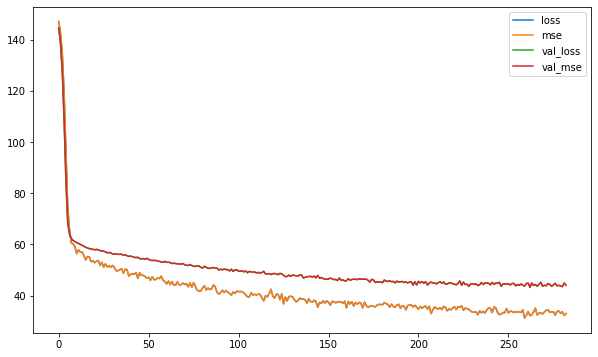

In [175]:
# Verificar treinamento - se está sobreajustando (overfitting) ou não 
pd.DataFrame(history.history).apply(lambda x: np.sqrt(x)).plot(figsize= (10,6))
plt.show()

In [176]:
pd.DataFrame(history.history).apply(lambda x: np.sqrt(x)).iloc[-1,:]

loss        32.976834
mse         32.976834
val_loss    44.030361
val_mse     44.030361
Name: 282, dtype: float64

#### Conclusões sobre camadas ocultas

Uma rede neural sequencial com uma camada oculta consegue um valor de RMSE menores do que dos modelos de Machine Learning.
Usar ````keras.layers.Dropout(0.2)```` para regularizar o modelo.

In [177]:
# Evaluate
np.sqrt(model.evaluate(X_prep_test, y_test))

5/5 [==============================] - 0s 2ms/step - loss: 1660.2831 - mse: 1660.2831


array([40.7465714, 40.7465714])

---

#### Redes Neurais    28/01/2025

- Como ````sklearn.preprocessing.OneHotEncoder```` varia os dados de 0 a 1. Faremos um escalonamento com ````sklearn.preprocessing.MinMaxScaler````varia no mesmo range.

In [1]:
# importando bibliotecas em comum
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("full_mec.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 43 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Alloy                                            1217 non-null   object 
 1   Nome tratado                                     1217 non-null   object 
 2   Co                                               1217 non-null   float64
 3   Fe                                               1217 non-null   float64
 4   Ni                                               1217 non-null   float64
 5   Si                                               1217 non-null   float64
 6   Al                                               1217 non-null   float64
 7   Cr                                               1217 non-null   float64
 8   Mo                                               1217 non-null   float64
 9   Nb                            

In [3]:
# Drops
df.drop(['Alloy','Nome tratado','density ROM (g/cm3)','HV','YS (MPa)'], axis= 1, inplace= True)
df.dropna(inplace= True)

In [6]:
# Separar os dados em input e target, train e test
X = df.drop('Specific_strength (MPa.cm3/g)', axis= 1)
y = df['Specific_strength (MPa.cm3/g)'].copy()

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [10]:
# Preprocessing - Aplicar OneHotEncoder, depois, aplicar MinMaxScaler em todos as características
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Separar dados categóricos e numéricos
cat_att = X.select_dtypes("object").columns
num_att = X.select_dtypes("number").columns

# Pipeline
full_pipeline = ColumnTransformer([("cat", OneHotEncoder(), cat_att),
                                   ("num", MinMaxScaler(), num_att)])

# Preprocessing
X_prep_train = full_pipeline.fit_transform(X_train)
X_prep_test = full_pipeline.fit_transform(X_test)

In [15]:
# Model : Lasso
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

# Instanciar
lasso_regressor = Lasso(alpha= 0.001)

# Scores com cross validation
scores = np.sqrt(-cross_val_score(lasso_regressor, X_prep_train, y_train, scoring= 'neg_mean_squared_error', cv= 5))
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

56.55 ± 3.59


In [19]:
# Predict
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Instanciar e treinar
lasso_regressor = Lasso(alpha= 0.001)
lasso_regressor.fit(X_prep_train, y_train)

# Predict
y_pred = lasso_regressor.predict(X_prep_test)
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"{round(lasso_rmse,2)}")

69.9


In [17]:
# Model : RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Instanciar
rf_regressor = RandomForestRegressor()

# Score com cross validation
scores = np.sqrt(-cross_val_score(rf_regressor, X_prep_train, y_train, scoring= "neg_mean_squared_error", cv= 5))
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

41.27 ± 2.14


In [21]:
# Predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Instanciar e treinar
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_prep_train, y_train)

# Predict
y_pred = rf_regressor.predict(X_prep_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"{round(rf_rmse,2)}")

59.81


#### Conclusão com RandomForestRegressor

Com ````sklearn.preprocessing.StandardScaler()````, atingimos um RMSE de 45.39 ± 1.73 para os dados de treino e 46.61 para os dados de teste.

Com ````sklearn.preprocessing.MinMaxScaler()````, atingimos um RMSE de 41.27 ± 2.14 para os dados de treino e 59.81 para os dados de teste. Parece que overfitou.

---

In [22]:
import tensorflow
from tensorflow import keras

In [32]:
# Preparar os dados
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size= 0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size= 0.2)

In [33]:
# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

num_att = X_train_full.select_dtypes("number").columns
cat_att = X_train_full.select_dtypes("object").columns

full_pipeline = ColumnTransformer([("num", MinMaxScaler(), num_att),
                                   ("cat", OneHotEncoder(), cat_att)])

X_prep_train = full_pipeline.fit_transform(X_train)
X_prep_val = full_pipeline.fit_transform(X_val)
X_prep_test = full_pipeline.fit_transform(X_test)

In [34]:
# Construção do modelo
input_ = keras.layers.Input(shape= X_prep_train.shape[1:])
hidden1 = keras.layers.Dense(100, activation= 'relu')(input_)
dropout1 = keras.layers.Dropout(0.2)(hidden1)
hidden2 = keras.layers.Dense(100, activation= 'relu')(dropout1)
dropout2 = keras.layers.Dropout(0.2)(hidden2)
output = keras.layers.Dense(1)(dropout2)
model = keras.Model(inputs= input_, outputs= output)

In [35]:
# Compile
model.compile(loss= 'mse', 
              optimizer= 'adam', 
              metrics= 'mse')

In [36]:
# Treinar
es = keras.callbacks.EarlyStopping(patience= 10, restore_best_weights= True)
history = model.fit(X_prep_train, y_train, epochs= 200, callbacks= es, validation_data= [X_prep_val, y_val])

Epoch 1/200
16/16 [==============================] - 1s 10ms/step - loss: 21225.8184 - mse: 21225.8184 - val_loss: 19788.6289 - val_mse: 19788.6289
Epoch 2/200
16/16 [==============================] - 0s 4ms/step - loss: 20302.6230 - mse: 20302.6230 - val_loss: 18387.6816 - val_mse: 18387.6816
Epoch 3/200
16/16 [==============================] - 0s 4ms/step - loss: 18230.5430 - mse: 18230.5430 - val_loss: 15359.6084 - val_mse: 15359.6084
Epoch 4/200
16/16 [==============================] - 0s 4ms/step - loss: 14320.7393 - mse: 14320.7393 - val_loss: 10554.6445 - val_mse: 10554.6445
Epoch 5/200
16/16 [==============================] - 0s 4ms/step - loss: 9207.3047 - mse: 9207.3047 - val_loss: 6340.6143 - val_mse: 6340.6143
Epoch 6/200
16/16 [==============================] - 0s 4ms/step - loss: 6276.2778 - mse: 6276.2778 - val_loss: 5471.0283 - val_mse: 5471.0283
Epoch 7/200
16/16 [==============================] - 0s 8ms/step - loss: 5613.7925 - mse: 5613.7925 - val_loss: 5159.4858 - v

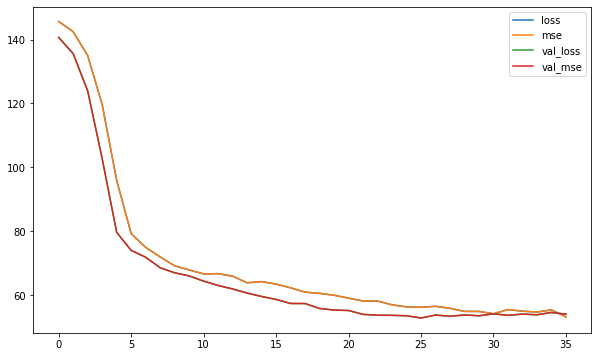

In [41]:
pd.DataFrame(history.history).apply(lambda x: np.sqrt(x)).plot(figsize= (10,6))
plt.show()

In [44]:
pd.DataFrame(history.history).apply(lambda x: np.sqrt(x)).iloc[-1,:]

loss        53.144755
mse         53.144755
val_loss    53.983968
val_mse     53.983968
Name: 35, dtype: float64

In [45]:
# Evaluate
np.sqrt(model.evaluate(X_prep_test, y_test))

5/5 [==============================] - 0s 2ms/step - loss: 4440.9453 - mse: 4440.9453


array([66.64041801, 66.64041801])

#### Conclusão do uso de MinMaxScaler
- Com ````sklearn.preprocessing.StandardScaler````, o RMSE de treino é 32.97, de validação é 44.03 e teste é 40.75.
- Com ````sklearn.preprocessing.MinMaxScaler````, o RMSE de treino é 53.14, de validação é 53.98 e teste é 66.64.

Houve uma piora de métrica com o uso de MinMaxScaler.  
````sklearn.preprocessing.MinMaxScaler```` ajusta os dados em um intervalo de 0 a 1 com base no valor mínimo e no valor máximo da variável. Isso significa que os outliers podem distorcer os resultados, já que estes valores podem comprimir dados úteis em valores muito próximos de 0 ou 1, dependendo de onde se encontra esses outliers. Antes de aplicar essa transformação, é preciso tratar os dados com relação ao outlier.
O ````sklearn.preprocessing.StandardScaler```` transforma os dados para um média de 0 e desvio padrão de 1. Ele é menos sensível aos outliers, já que não depende de um intevalo fixo de dados como com MinMaxScaler.

---

### Apresentar RandomForestRegression, Redes Neurais (com e sem DropOut)    04/02/2025

- Usar separação de dados estratificada

In [1]:
# Importando as bibliotecas comuns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("full_mec.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 43 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Alloy                                            1217 non-null   object 
 1   Nome tratado                                     1217 non-null   object 
 2   Co                                               1217 non-null   float64
 3   Fe                                               1217 non-null   float64
 4   Ni                                               1217 non-null   float64
 5   Si                                               1217 non-null   float64
 6   Al                                               1217 non-null   float64
 7   Cr                                               1217 non-null   float64
 8   Mo                                               1217 non-null   float64
 9   Nb                            

In [3]:
# Dropando colunas e vazios
df.drop(["Alloy","Nome tratado","density ROM (g/cm3)","HV","YS (MPa)"], axis= 1, inplace= True)
df.dropna(inplace= True)

In [4]:
# Separar os dados em input e target
X = df.drop("Specific_strength (MPa.cm3/g)", axis= 1)
y = df['Specific_strength (MPa.cm3/g)'].copy()

In [5]:
# Separar em dados de treino e teste e usar split estratificada
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify= df['Type of phases'])

In [7]:
# Preprocessamento - RobustScaler e OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Separar os dados em categóricos e numéricos
cat_att = X.select_dtypes("object").columns
num_att = X.select_dtypes("number").columns

# Pipeline
full_pipeline = ColumnTransformer([("cat", OneHotEncoder(), cat_att),
                                   ("num", StandardScaler(), num_att)])

# Preprocessing data
X_prep_train = full_pipeline.fit_transform(X_train)
X_prep_test = full_pipeline.fit_transform(X_test)

In [8]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Instanciar
rf_regressor = RandomForestRegressor()

# Scores de validação cruzada
scores = np.sqrt(-cross_val_score(rf_regressor, X_prep_train, y_train, scoring= 'neg_mean_squared_error', cv= 5))
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

44.18 ± 2.95


In [9]:
# Avaliando em dados de teste
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Instanciar e treinar
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_prep_train, y_train)

# Evaluate
y_pred = rf_regressor.predict(X_prep_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"{round(rf_rmse,2)}")

43.95


In [10]:
# Lasso
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

# Instanciar
lasso_regressor = Lasso(alpha= 0.01)

# Score com validação cruzada
scores = np.sqrt(-cross_val_score(lasso_regressor, X_prep_train, y_train, scoring= "neg_mean_squared_error", cv= 5))
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

67.02 ± 17.53


In [11]:
# Avaliando com os dados de teste
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Instanciar e treinar
lasso_regressor = Lasso(alpha= 0.01)
lasso_regressor.fit(X_prep_train, y_train)

# Evaluate
y_pred = lasso_regressor.predict(X_prep_test)
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"{round(lasso_rmse,2)}")

57.01


In [88]:
# Redes Neurais
import tensorflow
from tensorflow import keras

In [190]:
# Separar dados de treino, validação e teste
from sklearn.model_selection import train_test_split

# Separar dados de treino_completo e teste
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size= 0.2, stratify= df['Type of phases'])

# Separar dados de treino e validação
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size= 0.2, stratify= X_train_full["Type of phases"])

# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler

# Separar features categóricos e numéricos
cat_att = X.select_dtypes("object").columns
num_att = X.select_dtypes("number").columns

# Pipeline
full_pipeline = ColumnTransformer([("cat", OneHotEncoder(), cat_att),
                                   ("num", StandardScaler(), num_att)])

# Preprocessing
X_prep_train = full_pipeline.fit_transform(X_train)
X_prep_val = full_pipeline.fit_transform(X_val)
X_prep_test = full_pipeline.fit_transform(X_test)

In [191]:
# Construir o modelo - o modelo mais simples com função de ativação sigmoid tem um erro menor
input_ = keras.layers.Input(shape= X_prep_train.shape[1:])
hidden1 = keras.layers.Dense(300, activation= 'sigmoid')(input_)
dropout2 = keras.layers.Dropout(0.3)(hidden1)
output = keras.layers.Dense(1)(dropout2)
model = keras.Model(inputs= input_, outputs= output)

In [192]:
# Compile
# Optimizers
optimizer = keras.optimizers.Adam(learning_rate= 0.01)
model.compile(optimizer= optimizer, 
              loss= 'mse', 
              metrics= 'mse')

In [193]:
# Callbacks e treinar o modelo
es = keras.callbacks.EarlyStopping(patience=20, restore_best_weights= True)
history = model.fit(X_prep_train, y_train, epochs= 500, callbacks= es, validation_data= [X_prep_val, y_val])

Epoch 1/500
16/16 [==============================] - 0s 9ms/step - loss: 19488.2422 - mse: 19488.2422 - val_loss: 12763.1104 - val_mse: 12763.1104
Epoch 2/500
16/16 [==============================] - 0s 4ms/step - loss: 12794.6387 - mse: 12794.6387 - val_loss: 7174.3413 - val_mse: 7174.3413
Epoch 3/500
16/16 [==============================] - 0s 4ms/step - loss: 7455.7993 - mse: 7455.7993 - val_loss: 4017.3333 - val_mse: 4017.3333
Epoch 4/500
16/16 [==============================] - 0s 3ms/step - loss: 4903.1279 - mse: 4903.1279 - val_loss: 3061.6895 - val_mse: 3061.6895
Epoch 5/500
16/16 [==============================] - 0s 4ms/step - loss: 4168.3120 - mse: 4168.3120 - val_loss: 2858.4429 - val_mse: 2858.4429
Epoch 6/500
16/16 [==============================] - 0s 4ms/step - loss: 3714.4448 - mse: 3714.4448 - val_loss: 2807.4858 - val_mse: 2807.4858
Epoch 7/500
16/16 [==============================] - 0s 4ms/step - loss: 3583.1746 - mse: 3583.1746 - val_loss: 2732.2693 - val_mse: 273

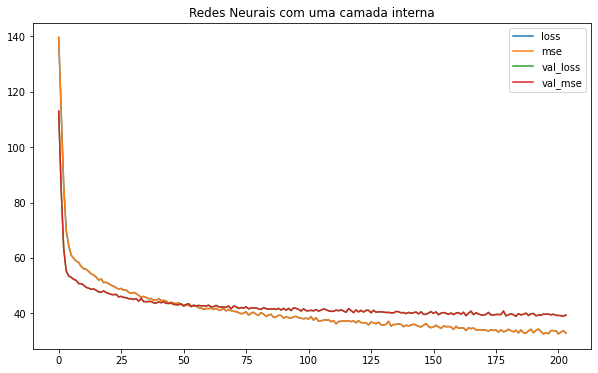

In [194]:
pd.DataFrame(history.history).apply(lambda x: np.sqrt(x)).plot(figsize= (10,6))
plt.title("Redes Neurais com uma camada interna")
plt.show()

In [195]:
np.sqrt(pd.DataFrame(history.history)[['loss','val_loss']].iloc[-1])

loss        32.816280
val_loss    39.360695
Name: 203, dtype: float64

In [196]:
# Evaluate
np.sqrt(model.evaluate(X_prep_test, y_test))[0]

5/5 [==============================] - 0s 2ms/step - loss: 1872.1560 - mse: 1872.1560


43.26841811135895

In [197]:
# Predict values
y_pred = model.predict(X_prep_test)

5/5 [==============================] - 0s 2ms/step


In [198]:
# A média da diferença entre y_pred e y_test
comparison_df = pd.DataFrame({"y_test": y_test, "y_pred": y_pred.flatten()})
comparison_df.corr()

,y_test,y_pred
y_test,1.00000,0.82288
y_pred,0.82288,1.00000


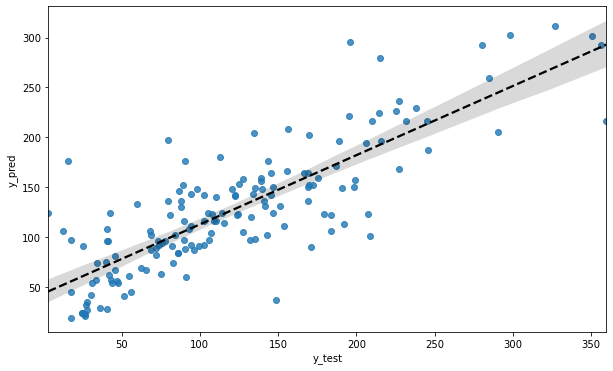

In [199]:
plt.figure(figsize= (10,6))
sns.regplot(comparison_df["y_test"], comparison_df['y_pred'], line_kws={"color": "black", "ls":"--"})
plt.show()

In [201]:
from sklearn.metrics import r2_score

rn_r2 = r2_score(y_test, y_pred)
rn_r2

0.6698303955873405

#### Conclusão

Utilizar uma rede neural com uma camada oculta com 200 neurônios e função de ativação "Sigmoid" obteve os menores valores de RMSE para dados de treino, validação e treino.

---

#### Sendo RandomForestRegressor que mais reduz o erro (Root Mean Squared Error), aplicar tunning nos modelos    05/02/2025

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [160]:
df = pd.read_csv("full_mec.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 43 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Alloy                                            1217 non-null   object 
 1   Nome tratado                                     1217 non-null   object 
 2   Co                                               1217 non-null   float64
 3   Fe                                               1217 non-null   float64
 4   Ni                                               1217 non-null   float64
 5   Si                                               1217 non-null   float64
 6   Al                                               1217 non-null   float64
 7   Cr                                               1217 non-null   float64
 8   Mo                                               1217 non-null   float64
 9   Nb                            

In [161]:
# Dropar colunas
df.drop(["Alloy","Nome tratado","density ROM (g/cm3)","HV","YS (MPa)"], axis= 1, inplace= True)
df.dropna(inplace= True)

In [162]:
# Separar os dados em input e target
X = df.drop("Specific_strength (MPa.cm3/g)", axis= 1)
y = df["Specific_strength (MPa.cm3/g)"].copy()

In [163]:
# Separar em dados de treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [164]:
# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Separar dados categóricos e numéricos
cat_att = X.select_dtypes("object").columns
num_att = X.select_dtypes("number").columns

# Pipeline
full_pipeline = ColumnTransformer([("cat", OneHotEncoder(), cat_att),
                                   ("num", StandardScaler(), num_att)])

# Preprocessing
X_prep_train = full_pipeline.fit_transform(X_train)
X_prep_test = full_pipeline.fit_transform(X_test)

In [165]:
# Modelo: RandomForestRegressor - sem tunning
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Instanciar
rf_regressor = RandomForestRegressor()

# Scores do modelo com validação cruzada
scores = np.sqrt(-cross_val_score(rf_regressor, X_prep_train, y_train, scoring= "neg_mean_squared_error", cv= 5))
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

43.73 ± 2.87


In [166]:
# Avaliando com os dados de teste - sem tunning
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Instanciar e treinar
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_prep_train, y_train)

# Avaliar
y_pred = rf_regressor.predict(X_prep_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"{round(rf_rmse,2)}")

47.67


In [167]:
# Modelo: RandomForestRegressor - Fazer tunning com GridSearchCV e instanciar o modelo
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators":[100, 200, 300],
              "max_depth": [3,6,9,12,15,18,21],
              "max_features": ['sqrt','log2'],}
# Instanciar
rf_regressor = RandomForestRegressor()

# GridSearch
grid_model = GridSearchCV(rf_regressor, 
                          param_grid= param_grid, 
                          cv= 5, 
                          scoring= "neg_mean_squared_error", 
                          return_train_score= True)

# Tunning e instanciar o modelo
grid_model.fit(X_prep_train, y_train)
rf_model = grid_model.best_estimator_

In [172]:
grid_model.best_params_

{'max_depth': 15, 'max_features': 'log2', 'n_estimators': 200}

In [173]:
# Aplicando o cross validation no modelo RandomForestRegressor com tunning
from sklearn.model_selection import cross_val_score

scores = np.sqrt(-cross_val_score(rf_model, X_prep_train, y_train, scoring= "neg_mean_squared_error", cv= 5))
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

43.8 ± 2.66


In [174]:
# Avaliar
from sklearn.metrics import mean_squared_error

# Treinar o modelo instanciado com tunning
rf_model.fit(X_prep_train, y_train)

# Avaliar
y_pred = rf_model.predict(X_prep_test)
rf_tunned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"{round(rf_tunned_rmse,2)}")

50.55


#### Conclusão:
- O modelo treinado com tunning ofereceu pouca vantagem em relação a redução do RMSE. Talvez, testar com outros hiperparâmetros.

---

#### EDA das propriedades mecânicas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("full_mec.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 43 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Alloy                                            1217 non-null   object 
 1   Nome tratado                                     1217 non-null   object 
 2   Co                                               1217 non-null   float64
 3   Fe                                               1217 non-null   float64
 4   Ni                                               1217 non-null   float64
 5   Si                                               1217 non-null   float64
 6   Al                                               1217 non-null   float64
 7   Cr                                               1217 non-null   float64
 8   Mo                                               1217 non-null   float64
 9   Nb                            

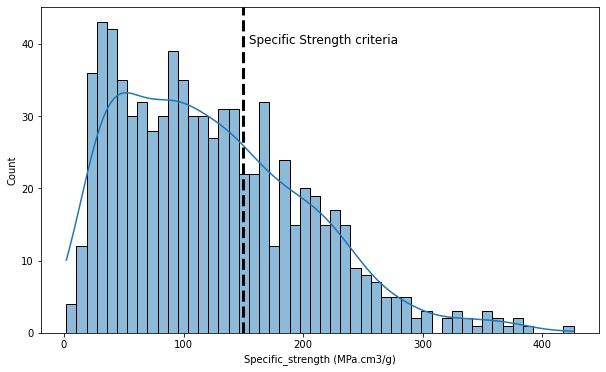

In [3]:
plt.figure(figsize= (10,6))
sns.histplot(df['Specific_strength (MPa.cm3/g)'], bins= 50, kde= True)
plt.axvline(150, linewidth= 3, color= 'black', ls= '--')
plt.text(155, 40, "Specific Strength criteria", rotation= 0, fontsize= 12)
plt.show()

In [4]:
# Estatísticas da resistência específica
print(f"Mean : {round(df['Specific_strength (MPa.cm3/g)'].mean(),2)}")
print(f"Standard Deviation : {round(df['Specific_strength (MPa.cm3/g)'].std(),2)}")
print(f"Median : {round(df['Specific_strength (MPa.cm3/g)'].median(),2)}")
print(f"Skew : {round(df['Specific_strength (MPa.cm3/g)'].skew(),2)}, moderately positive")

Mean : 124.44
Standard Deviation : 77.97
Median : 112.15
Skew : 0.78, moderately positive


##### Tentativa de normalização dos dados

In [5]:
# Para o teste Shapiro-Wilk, os dados não devem conter valores nulos
# H0: dados normais, H1: rejeita a hipótese nula.
data = df['Specific_strength (MPa.cm3/g)']
data.dropna(inplace=True)
data = np.sqrt(data)

In [6]:
from scipy.stats import shapiro

stats, pvalue = shapiro(data)
print(f"statistic = {stats} and p-value = {round(pvalue,2)}")

# rejeita-se a hipótese dos dados terem uma distribuição normal

statistic = 0.9890245199203491 and p-value = 0.0


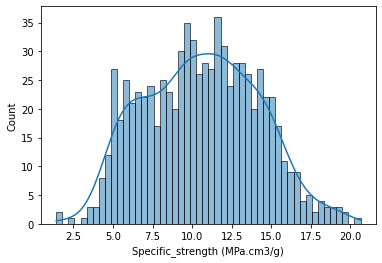

In [7]:
sns.histplot(data, bins= 50, kde= True)
plt.show()

#### Quais as características das ligas com valores acima de 150 em Resistência específica?

In [8]:
df_part = df[["Type of phases","Specific_strength (MPa.cm3/g)"]]
df_part = df_part[df_part["Specific_strength (MPa.cm3/g)"] > 150]

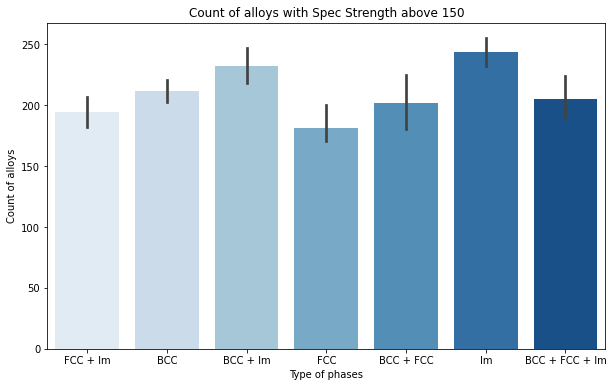

In [9]:
plt.figure(figsize= (10,6))
sns.barplot(x= df_part["Type of phases"], 
            y= df_part["Specific_strength (MPa.cm3/g)"], palette = 'Blues')
#plt.axhline(y= 200, ls= "--", color= 'black', linewidth= 4)
plt.ylabel("Count of alloys")
plt.title("Count of alloys with Spec Strength above 150")
plt.show()

---

#### Correlation with models    06/02/2025

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [198]:
df = pd.read_csv("full_mec.csv")

In [199]:
df.drop(["Alloy","Nome tratado","density ROM (g/cm3)","HV","YS (MPa)"], axis= 1, inplace= True)
df.dropna(inplace= True)

In [200]:
X = df.drop("Specific_strength (MPa.cm3/g)", axis= 1)
y = df['Specific_strength (MPa.cm3/g)'].copy()

In [201]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [202]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

cat_att = X.select_dtypes("object").columns
num_att = X.select_dtypes("number").columns

full_pipeline = ColumnTransformer([("cat", OneHotEncoder(), cat_att),
                                   ("num", StandardScaler(), num_att)])

X_prep_train = full_pipeline.fit_transform(X_train)
X_prep_test = full_pipeline.fit_transform(X_test)

In [203]:
X_prep_test.shape

(158, 47)

#### Modelos

In [208]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

# Instanciar modelo
lasso_regressor = Lasso(alpha= 0.1)

# Validação cruzada
scores = np.sqrt(-cross_val_score(lasso_regressor, X_prep_train, y_train, scoring= "neg_mean_squared_error", cv= 5))
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

56.19 ± 4.5


In [207]:
# Avaliar
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Instanciar e treinar
lasso_regressor = Lasso(alpha= 0.1)
lasso_regressor.fit(X_prep_train, y_train)

# Predizer e Avaliar
y_pred = lasso_regressor.predict(X_prep_test)
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"{round(lasso_rmse,2)}")

57.84


In [212]:
# Correlação por lasso
lasso_df = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})
lasso_df.corr().iloc[0,1]

0.750140769861848

In [219]:
# R²
from sklearn.metrics import r2_score

r2_lasso = r2_score(y_test, y_pred)
r2_lasso

0.5463220504286089

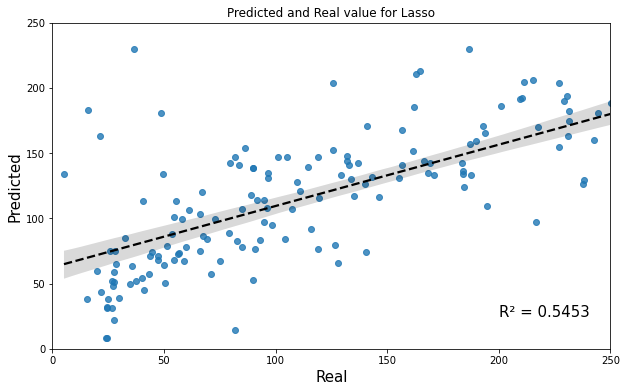

In [223]:
plt.figure(figsize= (10,6))
sns.regplot(x= y_test, y= y_pred, line_kws={"color": "black", "ls":"--"})
plt.xlabel("Real", fontsize= 15) # y_test
plt.ylabel("Predicted", fontsize= 15) # y_pred
plt.title("Predicted and Real value for Lasso")
plt.text(200,25,"R² = 0.5453", fontsize= 15)
plt.xlim(0,250)
plt.ylim(0,250)
plt.show()

---

In [229]:
# Decisiontree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# Instanciar
dt_regressor = DecisionTreeRegressor()

# Cross validation
scores = np.sqrt(-cross_val_score(dt_regressor, X_prep_train, y_train, scoring= "neg_mean_squared_error", cv= 5))
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

52.43 ± 2.78


In [230]:
# Avaliar
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Instanciar e treinar
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_prep_train, y_train)

# Predizer e Avaliar
y_pred = dt_regressor.predict(X_prep_test)
dt_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"{round(dt_rmse,2)}")

59.14


In [233]:
# Correlação por lasso
dt_df = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})
dt_df.corr().iloc[0,1]

0.7457136509123705

In [234]:
from sklearn.metrics import r2_score

r2_dt = r2_score(y_test, y_pred)
r2_dt

0.5255992846337538

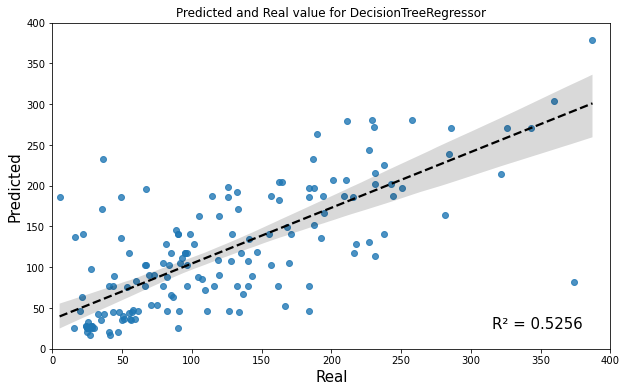

In [236]:
plt.figure(figsize= (10,6))
sns.regplot(x= y_test, y= y_pred, line_kws={"color": "black", "ls":"--"})
plt.xlabel("Real", fontsize= 15)
plt.ylabel("Predicted", fontsize= 15)
plt.title("Predicted and Real value for DecisionTreeRegressor")
plt.text(315,25,"R² = 0.5256", fontsize= 15)
plt.xlim(0,400)
plt.ylim(0,400)
plt.show()

---

#### RandomForesRegressor

In [237]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Instanciar
rf_regressor = RandomForestRegressor()

# Cross validation
scores = np.sqrt(-cross_val_score(rf_regressor, X_prep_train, y_train, scoring= "neg_mean_squared_error", cv= 5))
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

42.63 ± 1.93


In [238]:
# Evaluate
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Instanciar e treinar
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_prep_train, y_train)

# Predizer e avaliar
y_pred = rf_regressor.predict(X_prep_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"{round(rf_rmse,2)}")

45.03


In [239]:
# correlação
rf_df = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})
rf_df.corr().iloc[0,1]

0.8606398936268317

In [240]:
from sklearn.metrics import r2_score

rf_r2 = r2_score(y_test, y_pred)
rf_r2

0.7250422056606544

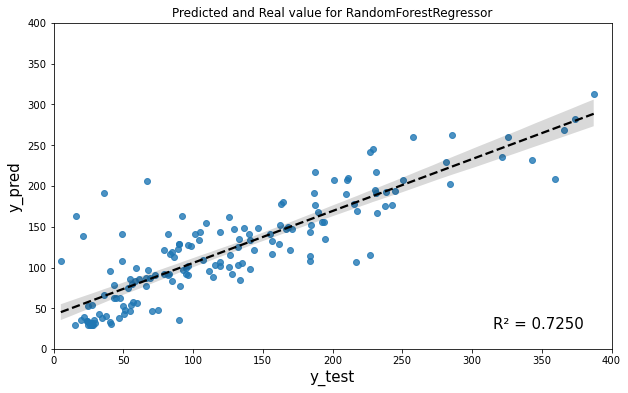

In [241]:
plt.figure(figsize= (10,6))
sns.regplot(x= y_test, y= y_pred, line_kws={"color": "black", "ls":"--"})
plt.xlabel("y_test", fontsize = 15)
plt.ylabel("y_pred", fontsize = 15)
plt.title("Predicted and Real value for RandomForestRegressor")
plt.text(315,25,"R² = 0.7250", fontsize= 15)
plt.xlim(0,400)
plt.ylim(0,400)
plt.show()

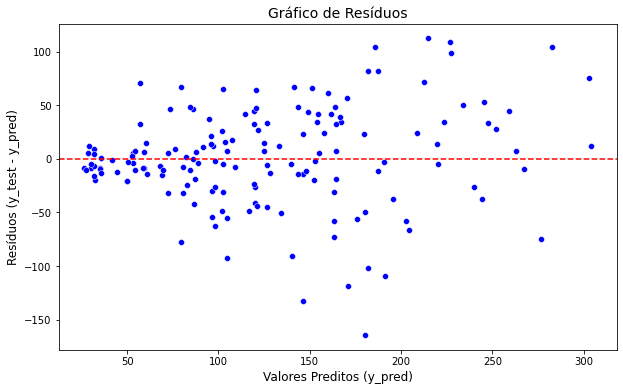

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que y_test e y_pred são seus dados reais e previstos
residuos = y_test - y_pred

# Plotando os resíduos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuos, color='blue')

# Adicionando título e rótulos
plt.axhline(0, color='red', linestyle='--')  # Linha no zero para referência
plt.title('Gráfico de Resíduos', fontsize=14)
plt.xlabel('Valores Preditos (y_pred)', fontsize=12)
plt.ylabel('Resíduos (y_test - y_pred)', fontsize=12)

plt.show()


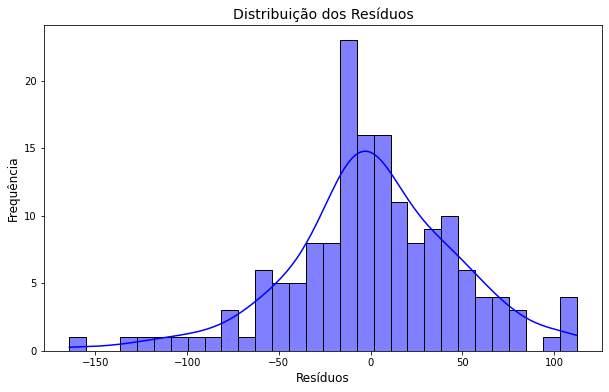

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True, color='blue', bins=30)

# Adicionando título e rótulos
plt.title('Distribuição dos Resíduos', fontsize=14)
plt.xlabel('Resíduos', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

plt.show()

In [30]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.7117010457345808

----

#### XGBoost

In [242]:
# XGBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

# Instanciar
xgb_regressor = XGBRegressor()

# Cross validation
scores = np.sqrt(-cross_val_score(xgb_regressor, X_prep_train, y_train, scoring= "neg_mean_squared_error", cv= 5))
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

45.04 ± 3.45


In [243]:
# Evaluate
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Instanciar e treinar
xgb_regressor = XGBRegressor()
xgb_regressor.fit(X_prep_train, y_train)

# Predizer e avaliar
y_pred = xgb_regressor.predict(X_prep_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"{round(xgb_rmse,2)}")

47.38


In [244]:
# correlação
xgb_df = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})
xgb_df.corr().iloc[0,1]

0.8394809064091343

In [245]:
from sklearn.metrics import r2_score

xgb_r2 = r2_score(y_test, y_pred)
xgb_r2

0.6955350362537667

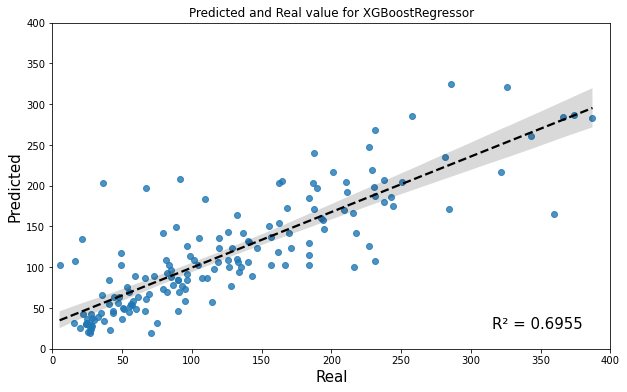

In [246]:
plt.figure(figsize= (10,6))
sns.regplot(x= y_test, y= y_pred, line_kws={"color": "black", "ls":"--"})
plt.xlabel("Real", fontsize= 15)
plt.ylabel("Predicted", fontsize= 15)
plt.title("Predicted and Real value for XGBoostRegressor")
plt.text(315,25,"R² = 0.6955", fontsize= 15)
plt.xlim(0,400)
plt.ylim(0,400)
plt.show()

----

#### RandomForestRegressor

In [247]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Instanciar
rf_regressor = RandomForestRegressor()

# Cross validation
scores = np.sqrt(-cross_val_score(rf_regressor, X_prep_train, y_train, scoring= "neg_mean_squared_error", cv= 5))
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

42.13 ± 2.14


In [248]:
# Evaluate
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Instanciar e treinar
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_prep_train, y_train)

# Predizer e avaliar
y_pred = rf_regressor.predict(X_prep_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"{round(rf_rmse,2)}")

44.63


In [249]:
# correlação
rf_df = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})
rf_df.corr().iloc[0,1]

0.8624776260485828

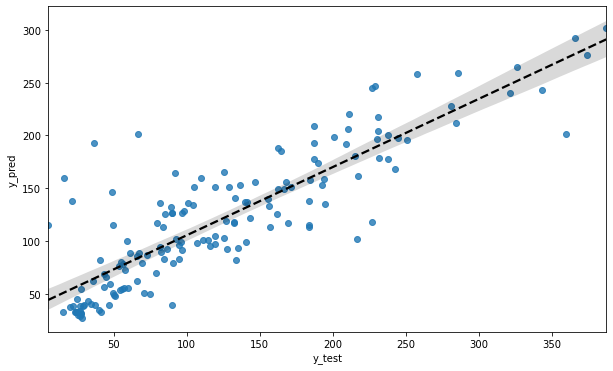

In [250]:
plt.figure(figsize= (10,6))
sns.regplot(x= y_test, y= y_pred, line_kws={"color": "black", "ls":"--"})
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

#### Redes Neurais

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [40]:
import tensorflow
from tensorflow import keras

In [41]:
df = pd.read_csv("full_mec.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 43 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Alloy                                            1217 non-null   object 
 1   Nome tratado                                     1217 non-null   object 
 2   Co                                               1217 non-null   float64
 3   Fe                                               1217 non-null   float64
 4   Ni                                               1217 non-null   float64
 5   Si                                               1217 non-null   float64
 6   Al                                               1217 non-null   float64
 7   Cr                                               1217 non-null   float64
 8   Mo                                               1217 non-null   float64
 9   Nb                            

In [42]:
df.drop(["Alloy","Nome tratado","density ROM (g/cm3)","HV","YS (MPa)"], axis= 1, inplace= True)
df.dropna(inplace= True)

In [43]:
X = df.drop('Specific_strength (MPa.cm3/g)', axis= 1)
y = df["Specific_strength (MPa.cm3/g)"].copy()

In [44]:
print(f"{round(y.mean(),2)} \u00b1 {round(y.std(),2)}")

124.44 ± 77.97


In [45]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size= 0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size= 0.2)

In [46]:
# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

cat_att = X.select_dtypes("object").columns
num_att = X.select_dtypes("number").columns

full_pipeline = ColumnTransformer([("cat", OneHotEncoder(), cat_att),
                                   ("num", StandardScaler(), num_att)])

X_prep_train = full_pipeline.fit_transform(X_train)
X_prep_val = full_pipeline.fit_transform(X_val)
X_prep_test = full_pipeline.fit_transform(X_test)

In [47]:
# Model
input_ = keras.layers.Input(shape= X_prep_train.shape[1:])
hidden1 = keras.layers.Dense(300, activation= "sigmoid")(input_)
output = keras.layers.Dense(1)(hidden1)
model = keras.Model(inputs= input_, outputs= output)

In [48]:
# Compile
optimizer = keras.optimizers.Adam(learning_rate = 0.01)
model.compile(optimizer= optimizer, loss= 'mse', metrics= 'mse')

In [49]:
# Treinar
es = keras.callbacks.EarlyStopping(patience= 30)
history = model.fit(X_prep_train, y_train, epochs= 500, callbacks= es, validation_data= [X_prep_val, y_val])

Epoch 1/500
16/16 [==============================] - 1s 11ms/step - loss: 18392.3555 - mse: 18392.3555 - val_loss: 12003.5078 - val_mse: 12003.5078
Epoch 2/500
16/16 [==============================] - 0s 4ms/step - loss: 11756.3076 - mse: 11756.3076 - val_loss: 6983.9087 - val_mse: 6983.9087
Epoch 3/500
16/16 [==============================] - 0s 3ms/step - loss: 6708.8486 - mse: 6708.8486 - val_loss: 4609.7944 - val_mse: 4609.7944
Epoch 4/500
16/16 [==============================] - 0s 3ms/step - loss: 4513.4946 - mse: 4513.4946 - val_loss: 3983.2979 - val_mse: 3983.2979
Epoch 5/500
16/16 [==============================] - 0s 3ms/step - loss: 3819.4382 - mse: 3819.4382 - val_loss: 3852.0388 - val_mse: 3852.0388
Epoch 6/500
16/16 [==============================] - 0s 3ms/step - loss: 3524.4841 - mse: 3524.4841 - val_loss: 3730.5974 - val_mse: 3730.5974
Epoch 7/500
16/16 [==============================] - 0s 3ms/step - loss: 3352.2051 - mse: 3352.2051 - val_loss: 3558.1299 - val_mse: 35

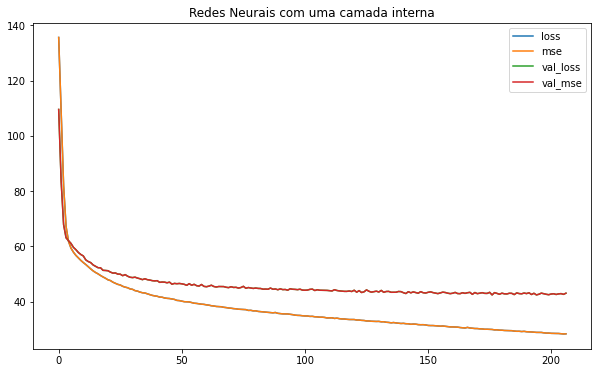

In [50]:
pd.DataFrame(history.history).apply(lambda x: np.sqrt(x)).plot(figsize= (10,6))
plt.title("Redes Neurais com uma camada interna")
plt.show()

In [51]:
np.sqrt(pd.DataFrame(history.history)[['loss','val_loss']].iloc[-1])

loss        28.371982
val_loss    43.075471
Name: 206, dtype: float64

In [252]:
# Evaluate
np.sqrt(model_saved.evaluate(X_prep_test, y_test))

5/5 [==============================] - 0s 2ms/step - loss: 1207.8591 - mse: 1207.8591


array([34.75426781, 34.75426781])

In [253]:
# Predict values
y_pred = model.predict(X_prep_test)

5/5 [==============================] - 0s 2ms/step


In [254]:
# Correlação
comparison_df = pd.DataFrame({"y_test": y_test, "y_pred": y_pred.flatten()})
comparison_df.corr().iloc[0,1]

0.9180706058130373

In [256]:
from sklearn.metrics import r2_score

nn_r2 = r2_score(y_test, y_pred)
nn_r2

0.8354776550760514

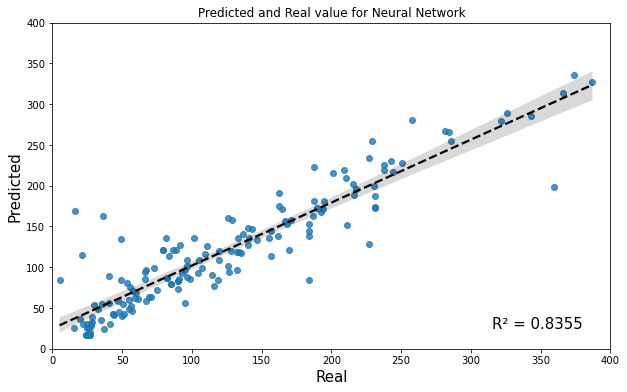

In [257]:
plt.figure(figsize= (10,6))
sns.regplot(comparison_df["y_test"], comparison_df['y_pred'], line_kws={"color": "black", "ls":"--"})
plt.xlabel("Real", fontsize= 15)
plt.ylabel("Predicted", fontsize= 15)
plt.title("Predicted and Real value for Neural Network")
plt.text(315,25,"R² = 0.8355", fontsize= 15)
plt.xlim(0,400)
plt.ylim(0,400)
plt.show()

### Melhor modelo de RN até agora

- rn_model.h5

````python
# Melhor modelo possível
model.save("rn_model2.h5")
````

In [251]:
model_saved = keras.models.load_model("rn_model.h5")

In [57]:
np.sqrt(model_saved.evaluate(X_prep_test, y_test))

5/5 [==============================] - 0s 1ms/step - loss: 1219.3435 - mse: 1219.3435


array([34.91909944, 34.91909944])

In [58]:
y_pred = model_saved.predict(X_prep_test)

5/5 [==============================] - 0s 2ms/step


In [59]:
# A média da diferença entre y_pred e y_test
comparison_df = pd.DataFrame({"y_test": y_test, "y_pred": y_pred.flatten()})
comparison_df.corr()

,y_test,y_pred
y_test,1.000000,0.904673
y_pred,0.904673,1.000000


### Conclusão

- Não remover outliers. Valores extremos ainda fazer parte dos dados.
- Ao comparar os dados y_pred e y_test por correlação (alta, 80%) e o valor de R² é muito pequeno (66%).
- Possível problema de R² pequeno, mas alta correlação: **Alta variabilidade dos dados**.  
Se os dados de entrada (features) tiverem uma ampla gama de valores, e o target (variável de saída) também variar significativamente para valores semelhantes ou próximos, isso indica alta variabilidade.

---

### Testando outros modelos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("full_mec.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 43 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Alloy                                            1217 non-null   object 
 1   Nome tratado                                     1217 non-null   object 
 2   Co                                               1217 non-null   float64
 3   Fe                                               1217 non-null   float64
 4   Ni                                               1217 non-null   float64
 5   Si                                               1217 non-null   float64
 6   Al                                               1217 non-null   float64
 7   Cr                                               1217 non-null   float64
 8   Mo                                               1217 non-null   float64
 9   Nb                            

In [3]:
df.drop(["Alloy","Nome tratado","density ROM (g/cm3)","HV","YS (MPa)"], axis= 1, inplace= True)
df.dropna(inplace= True)

In [4]:
X = df.drop("Specific_strength (MPa.cm3/g)", axis= 1)
y = df['Specific_strength (MPa.cm3/g)'].copy()

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

cat_att = X.select_dtypes("object").columns
num_att = X.select_dtypes("number").columns

full_pipeline = ColumnTransformer([("cat", OneHotEncoder(), cat_att),
                                   ("num", StandardScaler(), num_att)])

X_prep_train = full_pipeline.fit_transform(X_train)
X_prep_test = full_pipeline.fit_transform(X_test)

In [12]:
X_prep_test.shape

(158, 47)

#### Modelos

##### KNNRegression

In [258]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

# Instanciar
knr_regressor = KNeighborsRegressor()

# Cross validation
scores = np.sqrt(-cross_val_score(knr_regressor, X_prep_train, y_train, scoring= "neg_mean_squared_error", cv= 5))
print(f"{scores.mean()} \u00b1 {scores.std()}")

48.337874805075856 ± 2.7772196813600627


In [259]:
# Evaluate
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Instanciar e treinar
knr_regressor = KNeighborsRegressor()
knr_regressor.fit(X_prep_train, y_train)

# Predizer e avaliar
y_pred = knr_regressor.predict(X_prep_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"{round(rf_rmse,2)}")

44.92


In [260]:
# correlação
rf_df = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})
rf_df.corr().iloc[0,1]

0.8584789543570732

In [261]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.726300057485019

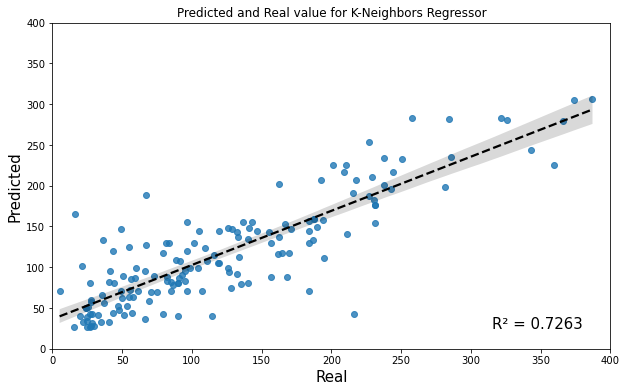

In [263]:
plt.figure(figsize= (10,6))
sns.regplot(x= y_test, y= y_pred, line_kws={"color": "black", "ls":"--"})
plt.xlabel("Real", fontsize= 15)
plt.ylabel("Predicted", fontsize= 15)
plt.title("Predicted and Real value for K-Neighbors Regressor")
plt.text(315,25,"R² = 0.7263", fontsize= 15)
plt.xlim(0,400)
plt.ylim(0,400)
plt.show()

---


### Tentar dropar duplicatas

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [146]:
df = pd.read_csv("full_mec.csv")

In [147]:
df.drop(["Alloy","Nome tratado","density ROM (g/cm3)","HV","YS (MPa)"], axis= 1, inplace= True)
df.dropna(inplace= True)

In [148]:
# Dropar duplicatas
df.drop_duplicates(inplace= True)

In [149]:
df.shape

(783, 38)

In [150]:
X = df.drop("Specific_strength (MPa.cm3/g)", axis= 1)
y = df['Specific_strength (MPa.cm3/g)'].copy()

In [151]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [152]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler

cat_att = X.select_dtypes("object").columns
num_att = X.select_dtypes("number").columns

full_pipeline = ColumnTransformer([("cat", OneHotEncoder(), cat_att),
                                   ("num", RobustScaler(), num_att)])

X_prep_train = full_pipeline.fit_transform(X_train)
X_prep_test = full_pipeline.fit_transform(X_test)

In [153]:
X_prep_test.shape

(157, 47)

#### Modelos

In [154]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Instanciar
rf_regressor = RandomForestRegressor()

# Cross validation
scores = np.sqrt(-cross_val_score(rf_regressor, X_prep_train, y_train, scoring= "neg_mean_squared_error", cv= 5))
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

42.29 ± 2.73


In [155]:
# Evaluate
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Instanciar e treinar
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_prep_train, y_train)

# Predizer e avaliar
y_pred = rf_regressor.predict(X_prep_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"{round(rf_rmse,2)}")

46.07


In [156]:
# correlação
rf_df = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})
rf_df.corr().iloc[0,1]

0.7845409836704381

In [157]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.6079934182097516

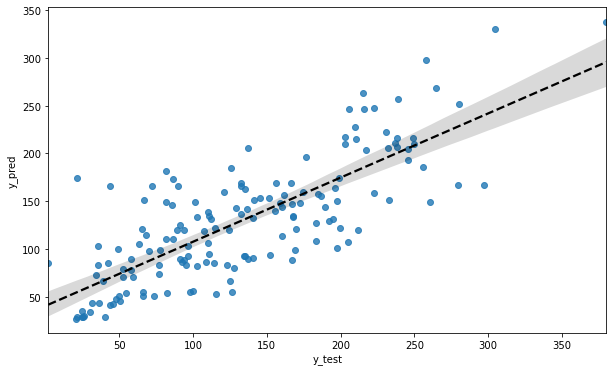

In [158]:
plt.figure(figsize= (10,6))
sns.regplot(x= y_test, y= y_pred, line_kws={"color": "black", "ls":"--"})
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### Conclusão:

Dropar duplicatas não adiantou. Pelo gráfico, há uma grande variabilidade de resíduos, valores próximos que estão muito além do que o modelo tenta classificar.  
**Tentar remover os inputs de Processamento Experimental (já que é onde pode incorrer erro humano)**.

----

#### Remover Procedimento experimental

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [173]:
df = pd.read_csv("full_mec.csv")
df.columns

Index(['Alloy', 'Nome tratado', 'Co', 'Fe', 'Ni', 'Si', 'Al', 'Cr', 'Mo', 'Nb',
       'Ti', 'C', 'V', 'Zr', 'Mn', 'Cu', 'B', 'Y', 'Sn', 'Li', 'Mg', 'Zn',
       'Sc', 'Hf', 'Ta', 'W', 'atomic radius (δ) [%]',
       'Electronegativity (Δχ)', 'Valence Electron Concentration (VEC)',
       'Ω parameter', 'Entalpia de mix (dHmix) [kJ/mol]',
       'Entropia de mix (dSmix) [J/K.mol]', 'Melting temperature (Tm) [K]',
       'Elastic-strain energy criterion (dHel) [kJ/mol]', 'Type of phases',
       'As cast/Homogenized right after casting', 'Cold/Hot Working',
       'Heat treatment', 'temperatura de pico [°C]', 'density ROM (g/cm3)',
       'HV', 'YS (MPa)', 'Specific_strength (MPa.cm3/g)'],
      dtype='object')

In [174]:
df.drop(["Alloy",
         "Nome tratado",
         "As cast/Homogenized right after casting",
         "temperatura de pico [°C]",
         "density ROM (g/cm3)",
         "HV",
         "YS (MPa)"], axis= 1, inplace= True)
df.dropna(inplace= True)

In [175]:
X = df.drop("Specific_strength (MPa.cm3/g)", axis= 1)
y = df['Specific_strength (MPa.cm3/g)'].copy()

In [176]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [177]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler

cat_att = X.select_dtypes("object").columns
num_att = X.select_dtypes("number").columns

full_pipeline = ColumnTransformer([("cat", OneHotEncoder(), cat_att),
                                   ("num", RobustScaler(), num_att)])

X_prep_train = full_pipeline.fit_transform(X_train)
X_prep_test = full_pipeline.fit_transform(X_test)

In [178]:
X_prep_test.shape

(158, 44)

### Modelos

In [179]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Instanciar
rf_regressor = RandomForestRegressor()

# Cross validation
scores = np.sqrt(-cross_val_score(rf_regressor, X_prep_train, y_train, scoring= "neg_mean_squared_error", cv= 5))
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

43.63 ± 2.98


In [180]:
# Evaluate
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Instanciar e treinar
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_prep_train, y_train)

# Predizer e avaliar
y_pred = rf_regressor.predict(X_prep_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"{round(rf_rmse,2)}")

52.12


In [181]:
# correlação
rf_df = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})
rf_df.corr().iloc[0,1]

0.7865165491547176

In [182]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.6104233347703634

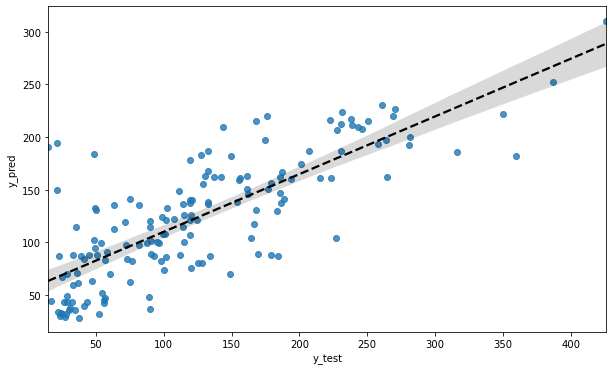

In [183]:
plt.figure(figsize= (10,6))
sns.regplot(x= y_test, y= y_pred, line_kws={"color": "black", "ls":"--"})
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

#### Conclusão

Remover Procedimento experimental não altera muita coisa, já que o RandomForestRegressor se adapta.   


---

### Alterar os dados de input    07/02/2025

- Tentar normalizar os dados
- Remover dados de composição química

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv("full_mec.csv")
df.columns

Index(['Alloy', 'Nome tratado', 'Co', 'Fe', 'Ni', 'Si', 'Al', 'Cr', 'Mo', 'Nb',
       'Ti', 'C', 'V', 'Zr', 'Mn', 'Cu', 'B', 'Y', 'Sn', 'Li', 'Mg', 'Zn',
       'Sc', 'Hf', 'Ta', 'W', 'atomic radius (δ) [%]',
       'Electronegativity (Δχ)', 'Valence Electron Concentration (VEC)',
       'Ω parameter', 'Entalpia de mix (dHmix) [kJ/mol]',
       'Entropia de mix (dSmix) [J/K.mol]', 'Melting temperature (Tm) [K]',
       'Elastic-strain energy criterion (dHel) [kJ/mol]', 'Type of phases',
       'As cast/Homogenized right after casting', 'Cold/Hot Working',
       'Heat treatment', 'temperatura de pico [°C]', 'density ROM (g/cm3)',
       'HV', 'YS (MPa)', 'Specific_strength (MPa.cm3/g)'],
      dtype='object')

In [22]:
# Droping
df.drop(["Alloy","Nome tratado", 'density ROM (g/cm3)',
       'HV', 'YS (MPa)'], axis= 1, inplace= True)
df.dropna(inplace= True)

In [61]:
len(df.columns)

38

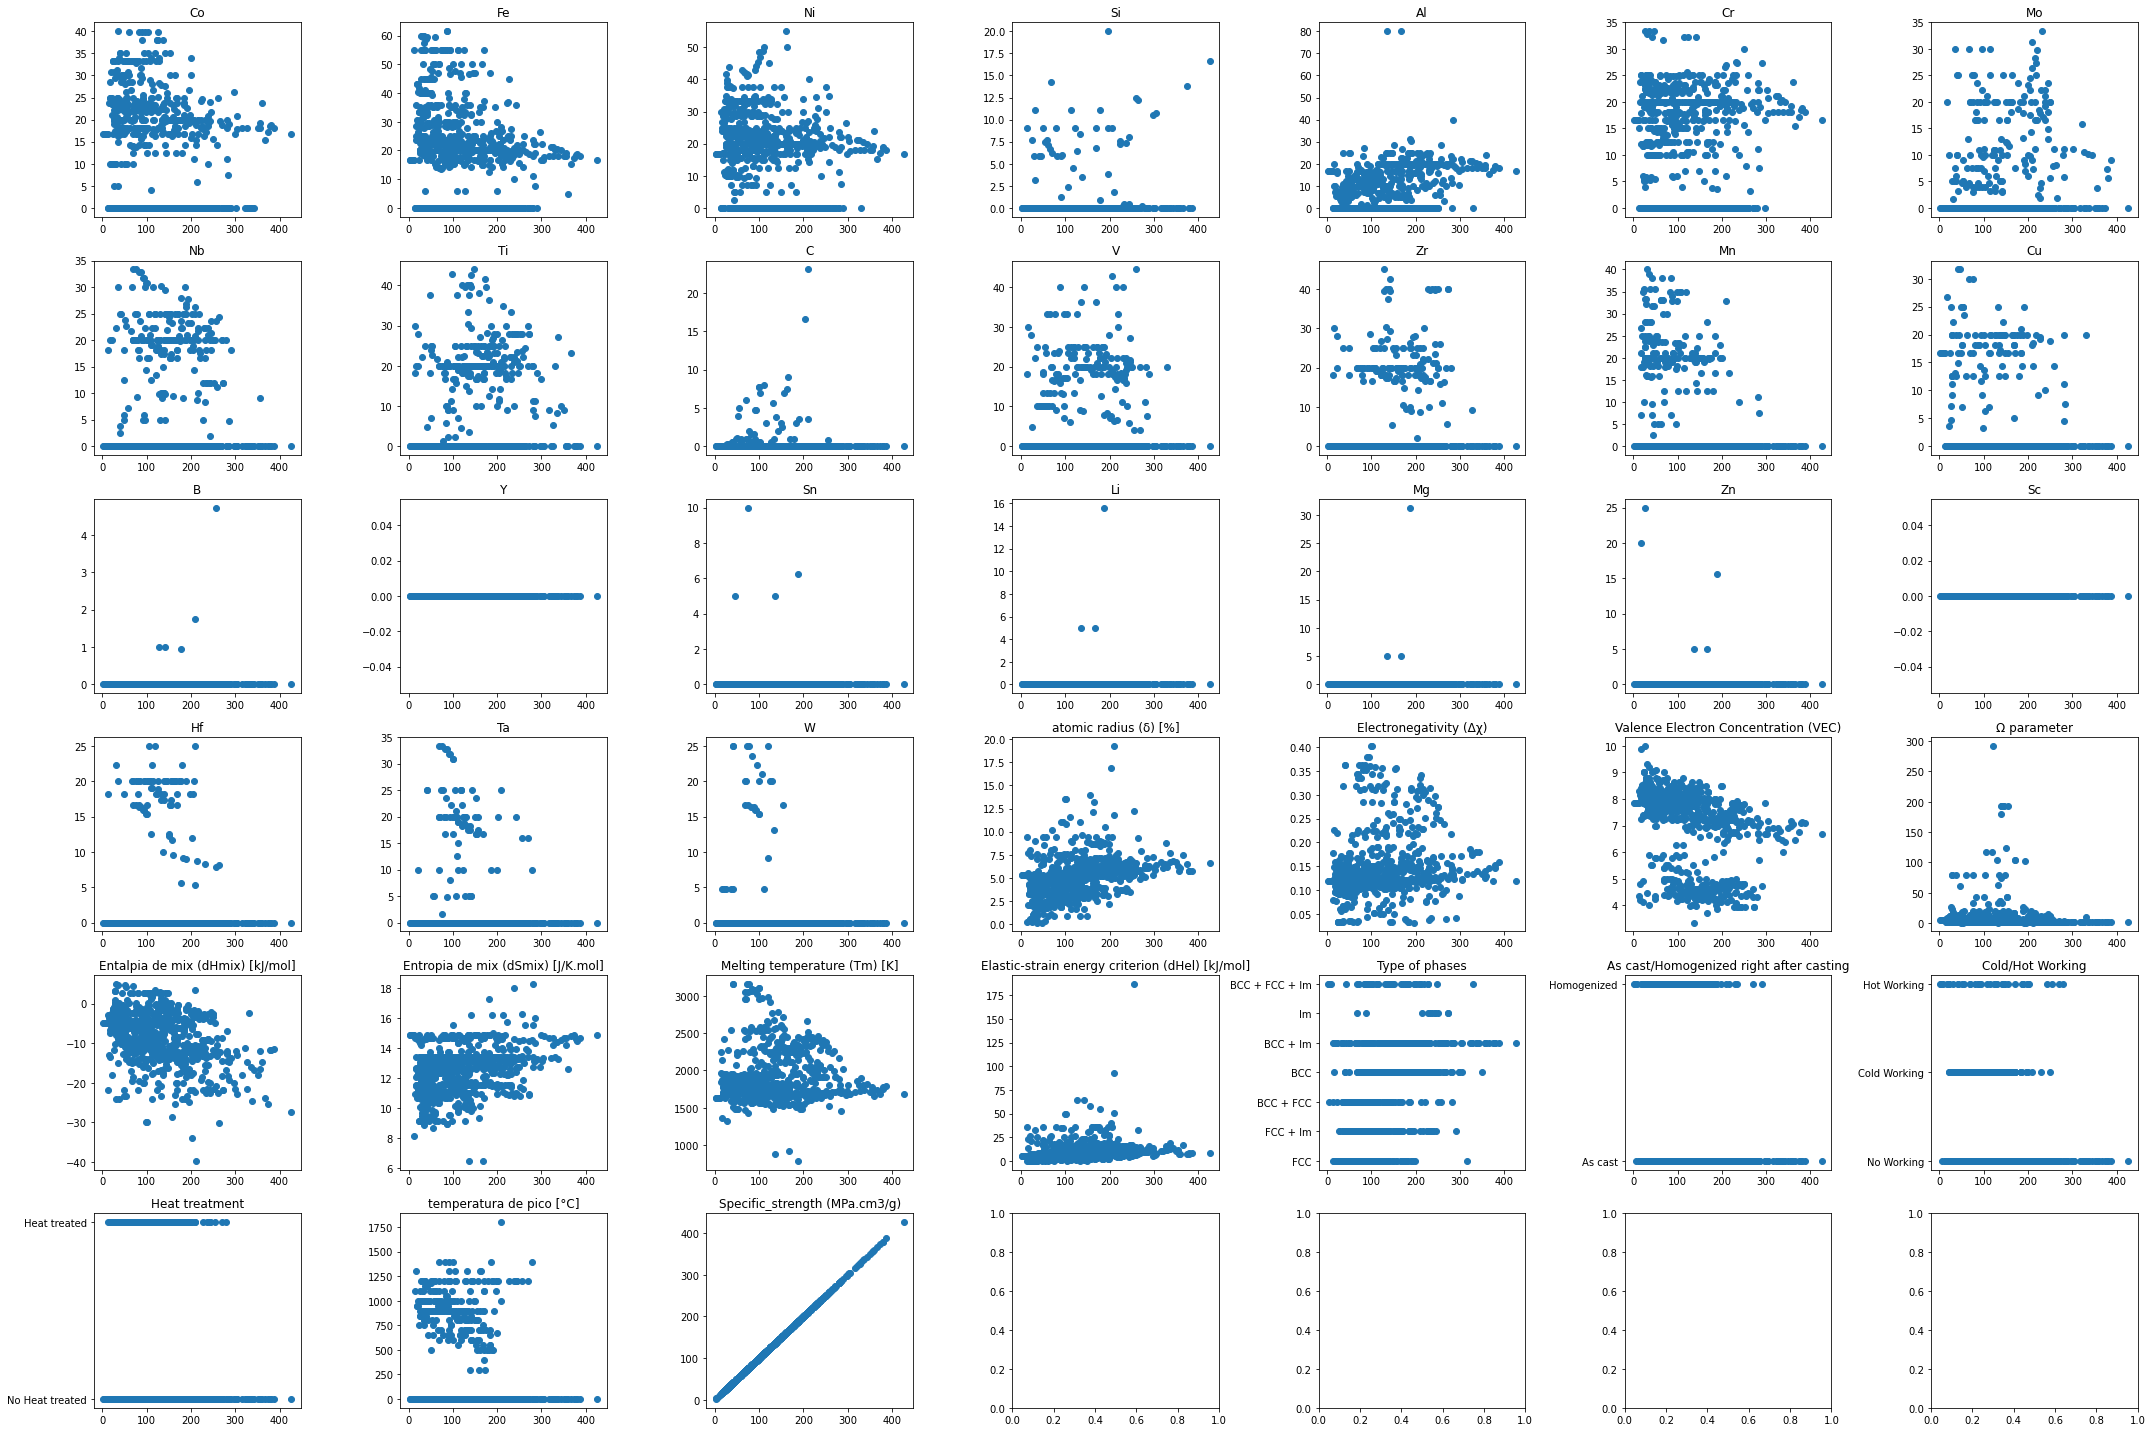

In [67]:
nrows = 6
ncols = 7

fig, axes = plt.subplots(nrows, ncols, figsize= (30,20))
for index in range(len(df.columns)):
    i = index // ncols
    j = index % ncols
    
    axes[i,j].scatter(df['Specific_strength (MPa.cm3/g)'], df.iloc[:,index])
    axes[i,j].set_title(f"{df.columns[index]}")

plt.tight_layout()
plt.show()

In [3]:
# Droping
df.drop(["Alloy",
         'Co', 'Fe', 'Ni', 'Si', 'Al', 'Cr', 'Mo', 'Nb',
       'Ti', 'C', 'V', 'Zr', 'Mn', 'Cu', 'B', 'Y', 'Sn', 'Li', 'Mg', 'Zn',
       'Sc', 'Hf', 'Ta', 'W',
         "Nome tratado", 'density ROM (g/cm3)',
       'HV', 'YS (MPa)'], axis= 1, inplace= True)
df.dropna(inplace= True)

# Inputs and target
X = df.drop("Specific_strength (MPa.cm3/g)", axis= 1)
y = df['Specific_strength (MPa.cm3/g)'].copy()

# train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler

cat_att = X.select_dtypes("object").columns
num_att = X.select_dtypes("number").columns

full_pipeline = ColumnTransformer([("cat", OneHotEncoder(), cat_att),
                                   ("num", RobustScaler(), num_att)])

X_prep_train = full_pipeline.fit_transform(X_train)
X_prep_test = full_pipeline.fit_transform(X_test)

In [4]:
full_pipeline.get_feature_names_out(input_features=X.columns)

array(['cat__Type of phases_BCC', 'cat__Type of phases_BCC + FCC',
       'cat__Type of phases_BCC + FCC + Im',
       'cat__Type of phases_BCC + Im', 'cat__Type of phases_FCC',
       'cat__Type of phases_FCC + Im', 'cat__Type of phases_Im',
       'cat__As cast/Homogenized right after casting_As cast',
       'cat__As cast/Homogenized right after casting_Homogenized',
       'cat__Cold/Hot Working_Cold Working',
       'cat__Cold/Hot Working_Hot Working',
       'cat__Cold/Hot Working_No Working',
       'cat__Heat treatment_Heat treated',
       'cat__Heat treatment_No Heat treated',
       'num__atomic radius (δ) [%]', 'num__Electronegativity (Δχ)',
       'num__Valence Electron Concentration (VEC)', 'num__Ω parameter',
       'num__Entalpia de mix (dHmix) [kJ/mol]',
       'num__Entropia de mix (dSmix) [J/K.mol]',
       'num__Melting temperature (Tm) [K]',
       'num__Elastic-strain energy criterion (dHel) [kJ/mol]',
       'num__temperatura de pico [°C]'], dtype=object)

In [5]:
X_prep_test.shape

(158, 23)

In [6]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Instanciar
rf_regressor = RandomForestRegressor()

# Cross validation
scores = np.sqrt(-cross_val_score(rf_regressor, X_prep_train, y_train, scoring= "neg_mean_squared_error", cv= 5))
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

44.53 ± 3.7


In [7]:
# Evaluate
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Instanciar e treinar
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_prep_train, y_train)

# Predizer e avaliar
y_pred = rf_regressor.predict(X_prep_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"{round(rf_rmse,2)}")

42.67


In [8]:
# correlação
rf_df = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})
rf_df.corr().iloc[0,1]

0.8063229954643509

In [9]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.6425386892293108

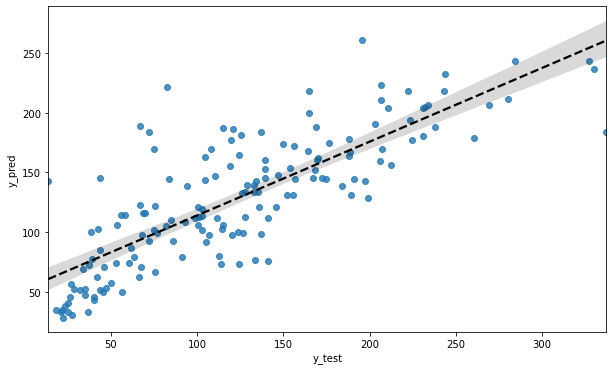

In [10]:
plt.figure(figsize= (10,6))
sns.regplot(x= y_test, y= y_pred, line_kws={"color": "black", "ls":"--"})
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [11]:
pd.DataFrame({"feature": full_pipeline.get_feature_names_out(input_features=X.columns),
 "importances": 100*rf_regressor.feature_importances_}).sort_values(by="importances", ascending= False)

,feature,importances
21,num__Elastic-strain energy criterion (dHel) [k...,30.391271
16,num__Valence Electron Concentration (VEC),16.572000
19,num__Entropia de mix (dSmix) [J/K.mol],12.003804
20,num__Melting temperature (Tm) [K],8.670760
15,num__Electronegativity (Δχ),5.681655
14,num__atomic radius (δ) [%],4.862296
22,num__temperatura de pico [°C],4.125172
18,num__Entalpia de mix (dHmix) [kJ/mol],3.867407
4,cat__Type of phases_FCC,3.749027
17,num__Ω parameter,3.534548


----

### Aplicando PCA nos dados preprocessados   10/02/2025

Aplicando em Lasso e RandomForestRegressor

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [77]:
df = pd.read_csv("full_mec.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 43 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Alloy                                            1217 non-null   object 
 1   Nome tratado                                     1217 non-null   object 
 2   Co                                               1217 non-null   float64
 3   Fe                                               1217 non-null   float64
 4   Ni                                               1217 non-null   float64
 5   Si                                               1217 non-null   float64
 6   Al                                               1217 non-null   float64
 7   Cr                                               1217 non-null   float64
 8   Mo                                               1217 non-null   float64
 9   Nb                            

In [78]:
# Dropar features e valores NaN
df.drop(["Alloy","Nome tratado","density ROM (g/cm3)","HV","YS (MPa)"], axis= 1, inplace= True)
df.dropna(inplace= True)

In [79]:
# Separar inputs de target
X = df.drop("Specific_strength (MPa.cm3/g)", axis= 1)
y = df["Specific_strength (MPa.cm3/g)"].copy()

In [80]:
# Split dos dados
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [83]:
# Preprocessamento
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Separar categóricos de numéricos
cat_att = X.select_dtypes("object").columns
num_att = X.select_dtypes("number").columns

# Pipeline
full_pipeline = ColumnTransformer([("cat", OneHotEncoder(), cat_att),
                                   ("num", StandardScaler(), num_att)])

# Preprocessing
X_prep_train = full_pipeline.fit_transform(X_train)
X_prep_test = full_pipeline.fit_transform(X_test)

In [136]:
feature_names = full_pipeline.get_feature_names_out(input_features= X.columns)
feature_names

array(['cat__Type of phases_BCC', 'cat__Type of phases_BCC + FCC',
       'cat__Type of phases_BCC + FCC + Im',
       'cat__Type of phases_BCC + Im', 'cat__Type of phases_FCC',
       'cat__Type of phases_FCC + Im', 'cat__Type of phases_Im',
       'cat__As cast/Homogenized right after casting_As cast',
       'cat__As cast/Homogenized right after casting_Homogenized',
       'cat__Cold/Hot Working_Cold Working',
       'cat__Cold/Hot Working_Hot Working',
       'cat__Cold/Hot Working_No Working',
       'cat__Heat treatment_Heat treated',
       'cat__Heat treatment_No Heat treated', 'num__Co', 'num__Fe',
       'num__Ni', 'num__Si', 'num__Al', 'num__Cr', 'num__Mo', 'num__Nb',
       'num__Ti', 'num__C', 'num__V', 'num__Zr', 'num__Mn', 'num__Cu',
       'num__B', 'num__Y', 'num__Sn', 'num__Li', 'num__Mg', 'num__Zn',
       'num__Sc', 'num__Hf', 'num__Ta', 'num__W',
       'num__atomic radius (δ) [%]', 'num__Electronegativity (Δχ)',
       'num__Valence Electron Concentration (VEC)',

In [117]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components= 0.95)
X_pca_prep_train = pca.fit_transform(X_prep_train)

In [118]:
100*pca.explained_variance_ratio_

array([24.21954434,  9.8455148 ,  8.2071015 ,  6.79248452,  5.3913592 ,
        4.95616035,  4.23453445,  3.89004615,  3.78602902,  3.26694535,
        3.02384899,  2.86923748,  2.41728455,  2.09003572,  2.00255478,
        1.82710198,  1.74956537,  1.46787146,  1.26479779,  0.98621193,
        0.85776779])

In [119]:
pca.n_features_

47

In [120]:
pca.n_components_

21

In [112]:
# Aplicar o mesmo número de componentes nos dados de teste
from sklearn.decomposition import PCA

pca = PCA(n_components= 21)
X_pca_prep_test = pca.fit_transform(X_prep_test)

#### Models

In [113]:
# Lasso sem PCA
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

# Instanciar
lasso_regressor = Lasso(alpha= 0.001)

# Validação cruzada
scores = np.sqrt(-cross_val_score(lasso_regressor, X_prep_train, y_train, scoring= "neg_mean_squared_error", cv= 5))
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

57.14 ± 4.05


In [114]:
# Evaluating Lasso sem PCA
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Instanciar e treinar
lasso_regressor = Lasso(alpha= 0.001)
lasso_regressor.fit(X_prep_train, y_train)

# Avaliar
y_pred = lasso_regressor.predict(X_prep_test)
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"{round(lasso_rmse,2)}")

63.04


In [115]:
# Lasso com PCA
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

# Instanciar
lasso_regressor = Lasso(alpha= 0.001)

# Validação cruzada
scores = np.sqrt(-cross_val_score(lasso_regressor, X_pca_prep_train, y_train, scoring= "neg_mean_squared_error", cv= 5))
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

59.17 ± 4.78


In [116]:
# Evaluating Lasso com PCA
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Instanciar e teinar
lasso_regressor = Lasso(alpha= 0.001)
lasso_regressor.fit(X_pca_prep_train, y_train)

# Avaliar
y_pred = lasso_regressor.predict(X_pca_prep_test)
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"{round(lasso_rmse,2)}")

86.83


---

In [155]:
# RandomForestRegressor sem PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Instanciar
rf_regressor = RandomForestRegressor()

# Cross validation
scores = np.sqrt(-cross_val_score(rf_regressor, X_prep_train, y_train, scoring= "neg_mean_squared_error", cv= 5))
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

43.35 ± 3.99


In [156]:
# Evaluating RandomForestRegressor sem PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Instanciar e treinar
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_prep_train, y_train)

# Avaliar
y_pred = rf_regressor.predict(X_prep_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"{round(rf_rmse,2)}")

50.19


In [157]:
# RandomForestRegressor com PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Instanciar
rf_regressor = RandomForestRegressor()

# Cross validation
scores = np.sqrt(-cross_val_score(rf_regressor, X_pca_prep_train, y_train, scoring= "neg_mean_squared_error", cv= 5))
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

45.85 ± 5.1


In [158]:
# Evaluating RandomForestRegressor com PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Instanciar e treinar
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_pca_prep_train, y_train)

# Avaliar
y_pred = rf_regressor.predict(X_pca_prep_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"{round(rf_rmse,2)}")

74.13


----

### LightGBM

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [23]:
df = pd.read_csv("full_mec.csv")
df.columns

Index(['Alloy', 'Nome tratado', 'Co', 'Fe', 'Ni', 'Si', 'Al', 'Cr', 'Mo', 'Nb',
       'Ti', 'C', 'V', 'Zr', 'Mn', 'Cu', 'B', 'Y', 'Sn', 'Li', 'Mg', 'Zn',
       'Sc', 'Hf', 'Ta', 'W', 'atomic radius (δ) [%]',
       'Electronegativity (Δχ)', 'Valence Electron Concentration (VEC)',
       'Ω parameter', 'Entalpia de mix (dHmix) [kJ/mol]',
       'Entropia de mix (dSmix) [J/K.mol]', 'Melting temperature (Tm) [K]',
       'Elastic-strain energy criterion (dHel) [kJ/mol]', 'Type of phases',
       'As cast/Homogenized right after casting', 'Cold/Hot Working',
       'Heat treatment', 'temperatura de pico [°C]', 'density ROM (g/cm3)',
       'HV', 'YS (MPa)', 'Specific_strength (MPa.cm3/g)'],
      dtype='object')

In [24]:
# Dropar colunas
df.drop(["Alloy","Nome tratado","density ROM (g/cm3)","HV","YS (MPa)"], axis= 1, inplace=True)
df.dropna(inplace= True)

In [25]:
# Separar input de target
X = df.drop("Specific_strength (MPa.cm3/g)", axis= 1)
y = df["Specific_strength (MPa.cm3/g)"].copy()

In [26]:
# Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify= X["Type of phases"])

In [33]:
# Preprocessing categorical data
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_att = X.select_dtypes("object").columns
pipe = ColumnTransformer([("cat", OneHotEncoder(), cat_att)])

X_prep_train = pipe.fit_transform(X_train)
X_prep_test = pipe.fit_transform(X_test)

In [36]:
# Preparar os dados para LightGBM
import lightgbm as lgb

train_data = lgb.Dataset(X_prep_train, label= y_train)
test_data = lgb.Dataset(X_prep_test, label= y_test, reference= train_data)

#### Models

In [49]:
# RandomForestRegressor
import lightgbm as lgb
from sklearn.model_selection import cross_val_score

# Hiperparâmetros
params = {
    'objective': 'regression',  # Tipo de tarefa (regressão)
    'metric': 'rmse',  # Métrica de erro quadrático médio
    'boosting_type': 'gbdt',  # Tipo de boosting
    'num_leaves': 50,  # Número de folhas nas árvores
    'learning_rate': 0.01,  # Taxa de aprendizado
    'feature_fraction': 0.9  # Fração de features a serem usadas
}
# Instanciar e treinar
lgb_regressor = lgb.train(params, train_data)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000350 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 26
[LightGBM] [Info] Number of data points in the train set: 632, number of used features: 13
[LightGBM] [Info] Start training from score 125.523413
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [50]:
from sklearn.metrics import mean_squared_error

y_pred = lgb_regressor.predict(X_prep_test)
lgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
lgb_rmse

64.92477333761856

In [51]:
# Correlação
df_strat = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
df_strat.corr()

,y_test,y_pred
y_test,1.000000,0.541456
y_pred,0.541456,1.000000


In [52]:
# R²
from sklearn.metrics import r2_score

r2_strat = r2_score(y_test, y_pred)
r2_strat

0.2651465909738563

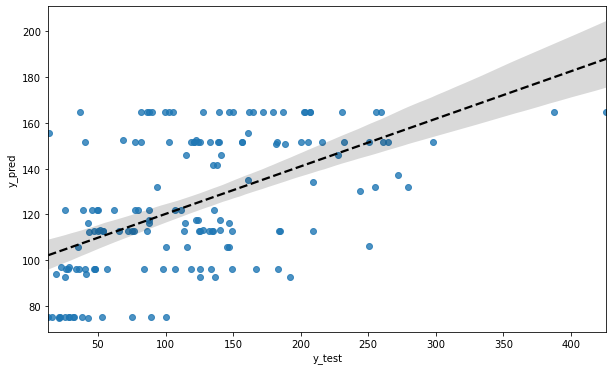

In [53]:
plt.figure(figsize= (10,6))
sns.regplot(x= y_test, y= y_pred, line_kws={"color": "black", "ls":"--"})
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

#### Conclusão
- LightGBM para regressão não fica bom

---

### Aplicar RandomForestRegressor e XGBoost sem StandardScaler, só OHE    13/02/2025

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("full_mec.csv")
df.columns

Index(['Alloy', 'Nome tratado', 'Co', 'Fe', 'Ni', 'Si', 'Al', 'Cr', 'Mo', 'Nb',
       'Ti', 'C', 'V', 'Zr', 'Mn', 'Cu', 'B', 'Y', 'Sn', 'Li', 'Mg', 'Zn',
       'Sc', 'Hf', 'Ta', 'W', 'atomic radius (δ) [%]',
       'Electronegativity (Δχ)', 'Valence Electron Concentration (VEC)',
       'Ω parameter', 'Entalpia de mix (dHmix) [kJ/mol]',
       'Entropia de mix (dSmix) [J/K.mol]', 'Melting temperature (Tm) [K]',
       'Elastic-strain energy criterion (dHel) [kJ/mol]', 'Type of phases',
       'As cast/Homogenized right after casting', 'Cold/Hot Working',
       'Heat treatment', 'temperatura de pico [°C]', 'density ROM (g/cm3)',
       'HV', 'YS (MPa)', 'Specific_strength (MPa.cm3/g)'],
      dtype='object')

In [3]:
# Dropar features
df.drop(["Alloy","Nome tratado","density ROM (g/cm3)","HV", "YS (MPa)"], axis= 1, inplace= True)
df.dropna(inplace= True)

In [4]:
# Separar os dados de Input do Target
X = df.drop("Specific_strength (MPa.cm3/g)", axis= 1)
y = df["Specific_strength (MPa.cm3/g)"].copy()

In [5]:
# Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [6]:
# Preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


cat_att = X.select_dtypes("object").columns
num_att = X.select_dtypes("number").columns

cat_pipeline = ColumnTransformer([("cat", OneHotEncoder(), cat_att),
                                  ("num",'passthrough',num_att)])

X_prep_train = cat_pipeline.fit_transform(X_train)
X_prep_test = cat_pipeline.fit_transform(X_test)

In [24]:
# Modelo: RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Instanciar
rf_regressor = RandomForestRegressor()

# Cross validation
scores = np.sqrt(-cross_val_score(rf_regressor, X_prep_train, y_train, scoring= "neg_mean_squared_error", cv= 5))
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

44.08 ± 4.15


In [26]:
# Evaluation
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Instanciar e treinar
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_prep_train, y_train)

# Prever e avaliar
y_pred = rf_regressor.predict(X_prep_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"{rf_rmse}")

42.60344729466817


In [28]:
# Correlation
rf_corr = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})
rf_corr.corr()

,y_test,y_pred
y_test,1.000000,0.803432
y_pred,0.803432,1.000000


In [29]:
from sklearn.metrics import r2_score

rf_r2 = r2_score(y_test, y_pred)
rf_r2

0.6390442951704718

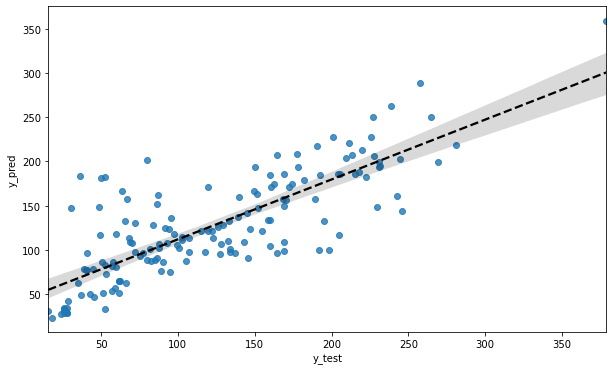

In [30]:
plt.figure(figsize= (10,6))
sns.regplot(x= y_test, y= y_pred, line_kws={"color": "black", "ls":"--"})
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

---

In [7]:
# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# separar features categóricas das numéricas
cat_att = X.select_dtypes("object").columns
num_att = X.select_dtypes("number").columns

cat_pipe = ColumnTransformer([("cat", OneHotEncoder(), cat_att),
                              ("num", "passthrough", num_att)])

X_prep_train = cat_pipe.fit_transform(X_train)
X_prep_test = cat_pipe.fit_transform(X_test)

In [8]:
# XGBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

# Instanciar
xgb_regressor = XGBRegressor()

# Cross_validation
scores = np.sqrt(-cross_val_score(xgb_regressor, X_prep_train, y_train, scoring= "neg_mean_squared_error", cv= 5))
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

48.12 ± 5.37


In [9]:
# Evaluation
from sklearn.metrics import mean_squared_error

# isntanciar e treinar
xgb_regressor = XGBRegressor()
xgb_regressor.fit(X_prep_train, y_train)

# Prever e avaliar
y_pred = xgb_regressor.predict(X_prep_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"{xgb_rmse}")

39.681644889749556


In [10]:
# Correlação
xgb_corr = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})
xgb_corr.corr()

,y_test,y_pred
y_test,1.000000,0.849554
y_pred,0.849554,1.000000


In [11]:
# R²
from sklearn.metrics import r2_score

xgb_r2 = r2_score(y_test, y_pred)
xgb_r2

0.7056696567232753

<AxesSubplot:xlabel='Specific_strength (MPa.cm3/g)'>

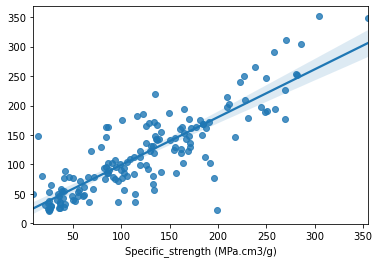

In [12]:
sns.regplot(x= y_test, y= y_pred)

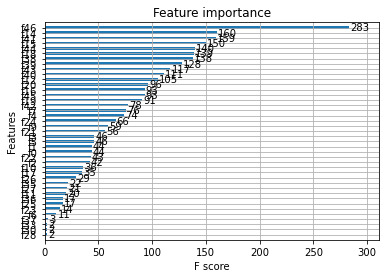

In [20]:
from xgboost import plot_importance

plot_importance(xgb_regressor, height= .5)
plt.show()

---

### Tentar novamente Redes Neurais    17/02/2025

In [1]:
# Importando bibliotecas em comum
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [54]:
import tensorflow
from tensorflow import keras

In [2]:
df = pd.read_csv("full_mec.csv")
df.columns

Index(['Alloy', 'Nome tratado', 'Co', 'Fe', 'Ni', 'Si', 'Al', 'Cr', 'Mo', 'Nb',
       'Ti', 'C', 'V', 'Zr', 'Mn', 'Cu', 'B', 'Y', 'Sn', 'Li', 'Mg', 'Zn',
       'Sc', 'Hf', 'Ta', 'W', 'atomic radius (δ) [%]',
       'Electronegativity (Δχ)', 'Valence Electron Concentration (VEC)',
       'Ω parameter', 'Entalpia de mix (dHmix) [kJ/mol]',
       'Entropia de mix (dSmix) [J/K.mol]', 'Melting temperature (Tm) [K]',
       'Elastic-strain energy criterion (dHel) [kJ/mol]', 'Type of phases',
       'As cast/Homogenized right after casting', 'Cold/Hot Working',
       'Heat treatment', 'temperatura de pico [°C]', 'density ROM (g/cm3)',
       'HV', 'YS (MPa)', 'Specific_strength (MPa.cm3/g)'],
      dtype='object')

In [3]:
# Dropar colunas
df.drop(["Alloy", "Nome tratado", "density ROM (g/cm3)", "HV", "YS (MPa)"], axis= 1, inplace= True)
df.dropna(inplace= True)

In [4]:
df_cleaned = df[(df["Specific_strength (MPa.cm3/g)"]>25)]

In [5]:
# Separar em input e target
X = df.drop("Specific_strength (MPa.cm3/g)", axis= 1)
y = df["Specific_strength (MPa.cm3/g)"].copy()

In [6]:
# Split em treino e teste
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size= 0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size= 0.2)

# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Separar dados categóricos dos numéricos
cat_att = X.select_dtypes("object").columns
num_att = X.select_dtypes("number").columns

# Pipeline
full_pipeline = ColumnTransformer([("cat", OneHotEncoder(), cat_att),
                                   ("num", StandardScaler(), num_att)])

# Preprocessing
X_prep_train = full_pipeline.fit_transform(X_train)
X_prep_val = full_pipeline.fit_transform(X_val)
X_prep_test = full_pipeline.fit_transform(X_test)

In [7]:
print(f"test: {X_prep_test.shape}")
print(f"val: {X_prep_val.shape}")

test: (158, 47)
val: (127, 47)


In [1327]:
# Model
input_ = keras.layers.Input(shape = X_prep_train.shape[1:])
hidden1 = keras.layers.Dense(300, activation= "relu")(input_)
output = keras.layers.Dense(1)(hidden1)
model = keras.Model(inputs= input_, outputs= output)

In [1328]:
# Compile
optimizer = keras.optimizers.Adam(learning_rate= 0.01)
model.compile(optimizer= optimizer, 
              loss="mse",
              metrics= "mse")

In [1329]:
# Train
es = keras.callbacks.EarlyStopping(patience= 30)
history = model.fit(X_prep_train, y_train, batch_size= 32, epochs= 800, callbacks= es, validation_data = [X_prep_val, y_val])

Epoch 1/800
16/16 [==============================] - 1s 13ms/step - loss: 18392.2227 - mse: 18392.2227 - val_loss: 12809.7285 - val_mse: 12809.7285
Epoch 2/800
16/16 [==============================] - 0s 3ms/step - loss: 7501.8672 - mse: 7501.8672 - val_loss: 3264.8484 - val_mse: 3264.8484
Epoch 3/800
16/16 [==============================] - 0s 4ms/step - loss: 3591.0688 - mse: 3591.0688 - val_loss: 2792.7019 - val_mse: 2792.7019
Epoch 4/800
16/16 [==============================] - 0s 4ms/step - loss: 2953.2917 - mse: 2953.2917 - val_loss: 2606.3589 - val_mse: 2606.3589
Epoch 5/800
16/16 [==============================] - 0s 3ms/step - loss: 2721.8640 - mse: 2721.8640 - val_loss: 2620.1187 - val_mse: 2620.1187
Epoch 6/800
16/16 [==============================] - 0s 4ms/step - loss: 2609.0657 - mse: 2609.0657 - val_loss: 2444.0576 - val_mse: 2444.0576
Epoch 7/800
16/16 [==============================] - 0s 3ms/step - loss: 2542.6475 - mse: 2542.6475 - val_loss: 2403.7544 - val_mse: 2403

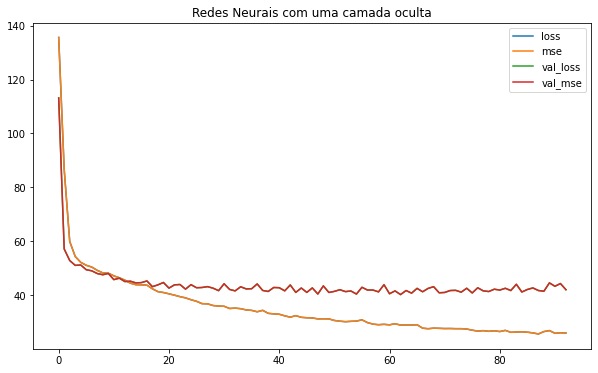

In [1330]:
pd.DataFrame(history.history).apply(lambda x: np.sqrt(x)).plot(figsize= (10,6))
plt.title("Redes Neurais com uma camada oculta")
plt.show()

In [1331]:
np.sqrt(pd.DataFrame(history.history))[["loss", "val_loss"]].iloc[-1]

loss        25.968585
val_loss    42.013889
Name: 92, dtype: float64

In [1332]:
# Evaluate
np.sqrt(model.evaluate(X_prep_test, y_test))

5/5 [==============================] - 0s 2ms/step - loss: 2164.0547 - mse: 2164.0547


array([46.51940119, 46.51940119])

In [1333]:
y_pred = model.predict(X_prep_test)
results = pd.DataFrame({"y_test": y_test, "y_pred": y_pred.flatten()})
results

5/5 [==============================] - 0s 1ms/step


,y_test,y_pred
873,258.006298,209.300110
739,5.224567,100.957481
741,114.375654,70.634392
96,211.125018,239.485352
521,164.274482,148.224167
...,...,...
272,181.951016,160.979095
148,25.225696,61.319920
748,109.379587,107.665527
1013,94.242574,108.091751


In [1334]:
results.corr()

,y_test,y_pred
y_test,1.000000,0.791844
y_pred,0.791844,1.000000


In [1335]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
r2

0.6211807347744782

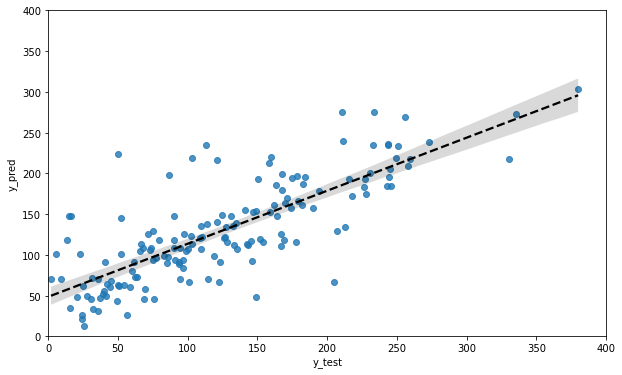

In [1336]:
plt.figure(figsize= (10,6))
sns.regplot(x= y_test, y= y_pred, line_kws={"color": "black", "ls":"--"})
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.xlim(0,400)
plt.ylim(0,400)
plt.show()

In [957]:
#model.save("NN_model2.h5")

#### Model saved

In [1337]:
model_saved = keras.models.load_model("NN_model.h5")

In [1338]:
np.sqrt(model_saved.evaluate(X_prep_test, y_test))

5/5 [==============================] - 0s 2ms/step - loss: 1120.6903 - mse: 1120.6903


array([33.47671292, 33.47671292])

In [1339]:
y_pred = model_saved.predict(X_prep_test)
results = pd.DataFrame({"y_test": y_test, "y_pred": y_pred.flatten()})
results

5/5 [==============================] - 0s 5ms/step


,y_test,y_pred
873,258.006298,160.993546
739,5.224567,99.235229
741,114.375654,42.929520
96,211.125018,186.468231
521,164.274482,101.907494
...,...,...
272,181.951016,158.717392
148,25.225696,33.925621
748,109.379587,106.188431
1013,94.242574,97.070007


In [1340]:
results.corr()

,y_test,y_pred
y_test,1.000000,0.897025
y_pred,0.897025,1.000000


In [1341]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
r2

0.8038223467024134

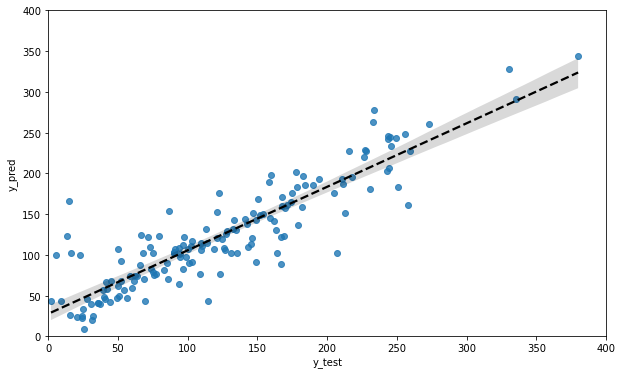

In [1342]:
plt.figure(figsize= (10,6))
sns.regplot(x= y_test, y= y_pred, line_kws={"color": "black", "ls":"--"})
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.xlim(0,400)
plt.ylim(0,400)
plt.show()

---

### LightGBM    17/02/2025

In [439]:
# Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [446]:
X_test.shape

(158, 37)

In [447]:
#Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Separar categóricos de numéricos
cat_att = X.select_dtypes("object").columns
num_att = X.select_dtypes("number").columns

# Pipeline
full_pipeline = ColumnTransformer([("cat", OneHotEncoder(), cat_att),
                                   ("num", StandardScaler(), num_att)])

# Preprocessing
X_prep_train = full_pipeline.fit_transform(X_train)
X_prep_test = full_pipeline.fit_transform(X_test)

In [449]:
X_prep_test.shape

(158, 47)

In [450]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score

# Instanciar
lgbm_regressor = LGBMRegressor()

# Cross validation
scores = np.sqrt(-cross_val_score(lgbm_regressor, X_prep_train, y_train, scoring= "neg_mean_squared_error", cv= 5))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000588 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1693
[LightGBM] [Info] Number of data points in the train set: 505, number of used features: 38
[LightGBM] [Info] Start training from score 125.400559
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [451]:
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

45.5 ± 4.72


In [452]:
# Evaluation
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

# Instanciar e treinar
lgbm_regressor = LGBMRegressor()
lgbm_regressor.fit(X_prep_train, y_train)

# Prever e avaliar
y_pred = lgbm_regressor.predict(X_prep_test)
lgbm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000528 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2156
[LightGBM] [Info] Number of data points in the train set: 632, number of used features: 38
[LightGBM] [Info] Start training from score 125.229106
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [453]:
print(f"{lgbm_rmse}")

43.24522453262733


In [455]:
lgbm_df = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})
lgbm_df.corr()

,y_test,y_pred
y_test,1.00000,0.83427
y_pred,0.83427,1.00000


In [459]:
lgbm_df

,y_test,y_pred
341,179.262235,112.610674
739,5.224567,92.376148
392,119.107066,91.245394
947,83.045202,79.072700
368,220.081942,206.495341
...,...,...
18,48.922126,69.802190
1046,215.861490,159.315091
259,52.202253,131.143256
626,75.214690,114.286723


In [460]:
from sklearn.metrics import r2_score

r2 = r2_score(lgbm_df["y_test"], lgbm_df["y_pred"])
r2

0.6871567335171492

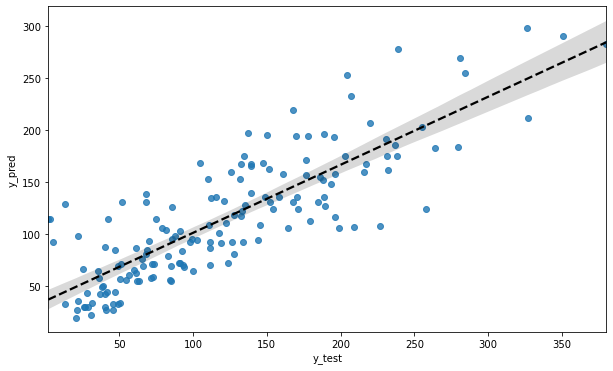

In [461]:
plt.figure(figsize= (10,6))
sns.regplot(x= lgbm_df["y_test"], y= lgbm_df["y_pred"], line_kws={"color": "black", "ls":"--"})
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

---

### Testando com XGBoost    17/02/2025

In [463]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

# instanciar
xgb_regressor = XGBRegressor()

# Cross validation
scores = np.sqrt(-cross_val_score(xgb_regressor, X_prep_train, y_train, scoring= "neg_mean_squared_error", cv= 5))
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

47.35 ± 3.72


In [464]:
# Evaluating
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Instanciar e treinar
xgb_regressor = XGBRegressor()
xgb_regressor.fit(X_prep_train, y_train)

# Prever e avaliar
y_pred = xgb_regressor.predict(X_prep_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"{xgb_rmse}")

44.043277321650095


In [465]:
xgb_df = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})
xgb_df.corr()

,y_test,y_pred
y_test,1.000000,0.821999
y_pred,0.821999,1.000000


In [466]:
from sklearn.metrics import r2_score
# R² não é tão relevante para modelos não lineares
r2 = r2_score(y_test, y_pred)
r2

0.6755036956279223

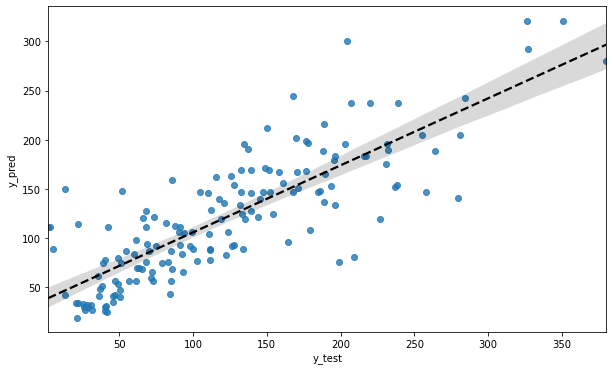

In [467]:
plt.figure(figsize= (10,6))
sns.regplot(x= xgb_df["y_test"], y= xgb_df["y_pred"], line_kws={"color": "black", "ls":"--"})
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

---

### RandomForest

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [14]:
# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

cat_att = X.select_dtypes("object").columns
num_att = X.select_dtypes("number").columns

full_pipe = ColumnTransformer([("cat", OneHotEncoder(), cat_att),
                               ("num", StandardScaler(), num_att)])

X_prep_train = full_pipe.fit_transform(X_train)
X_prep_test = full_pipe.fit_transform(X_test)

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rf_regressor = RandomForestRegressor()

scores = np.sqrt(-cross_val_score(rf_regressor, X_prep_train, y_train, scoring= "neg_mean_squared_error", cv= 5))
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

43.35 ± 3.23


In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árvores na floresta
    'max_features': ['auto', 'sqrt', 'log2'],  # Número de características a serem consideradas para divisão
    'max_depth': [None, 10, 20, 30],  # Profundidade máxima da árvore
    'min_samples_split': [2, 5, 10],  # Número mínimo de amostras exigidas para dividir um nó
    'min_samples_leaf': [1, 2, 4],  # Número mínimo de amostras exigidas para ser uma folha
    'bootstrap': [True, False]  # Se deve ou não usar amostragem bootstrap para construir as árvores
}
grid_rf = GridSearchCV(rf_regressor, param_grid= param_grid, scoring= "neg_mean_squared_error", cv= 5)
grid_rf.fit(X_prep_train, y_train)

KeyboardInterrupt: 

In [ ]:
grid_rf.best_estimator_

In [16]:
from sklearn.metrics import mean_squared_error

rf_regressor.fit(X_prep_train, y_train)
y_pred = rf_regressor.predict(X_prep_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rf_rmse

43.201711079437

In [17]:
rf_df = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})
rf_df.corr()

,y_test,y_pred
y_test,1.000000,0.853038
y_pred,0.853038,1.000000


In [18]:
from sklearn.metrics import r2_score
# R² não é tão relevante para modelos não lineares
r2 = r2_score(y_test, y_pred)
r2

0.7190059760438628

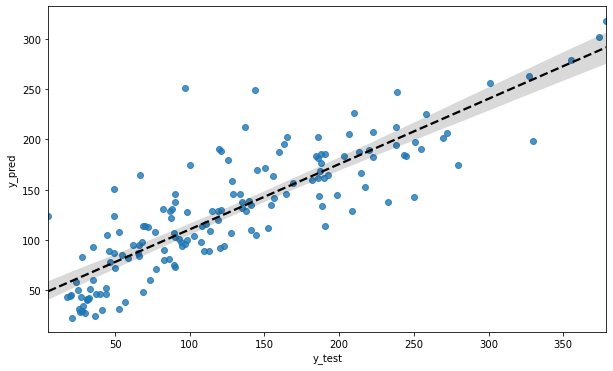

In [20]:
plt.figure(figsize= (10,6))
sns.regplot(x= rf_df["y_test"], y= rf_df["y_pred"], line_kws={"color": "black", "ls":"--"})
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

---

### Cross validation on Neural Networks    18/02/2025

- ````sklearn.model_selection.KFold```` fornece o train/test indexes para dvidir os dados. Usar loop ````for```` para rodar todas as folds.
- Construir um modelo do zero, usando os mesmos hiperparâmetros.

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
import tensorflow
from tensorflow import keras

In [3]:
df = pd.read_csv("full_mec.csv")
df.columns

Index(['Alloy', 'Nome tratado', 'Co', 'Fe', 'Ni', 'Si', 'Al', 'Cr', 'Mo', 'Nb',
       'Ti', 'C', 'V', 'Zr', 'Mn', 'Cu', 'B', 'Y', 'Sn', 'Li', 'Mg', 'Zn',
       'Sc', 'Hf', 'Ta', 'W', 'atomic radius (δ) [%]',
       'Electronegativity (Δχ)', 'Valence Electron Concentration (VEC)',
       'Ω parameter', 'Entalpia de mix (dHmix) [kJ/mol]',
       'Entropia de mix (dSmix) [J/K.mol]', 'Melting temperature (Tm) [K]',
       'Elastic-strain energy criterion (dHel) [kJ/mol]', 'Type of phases',
       'As cast/Homogenized right after casting', 'Cold/Hot Working',
       'Heat treatment', 'temperatura de pico [°C]', 'density ROM (g/cm3)',
       'HV', 'YS (MPa)', 'Specific_strength (MPa.cm3/g)'],
      dtype='object')

In [4]:
# Dropar colunas
df.drop(["Alloy", "Nome tratado", "density ROM (g/cm3)", "HV", "YS (MPa)"], axis= 1, inplace= True)
df.dropna(inplace= True)

In [6]:
# Separar os dados
X = df.drop("Specific_strength (MPa.cm3/g)", axis= 1)
y = df["Specific_strength (MPa.cm3/g)"].copy()

In [209]:
# Split
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size= 0.2)

In [210]:
# Preprocessing - testar sem StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

cat_att = X.select_dtypes("object").columns
num_att = X.select_dtypes("number").columns

full_pipe = ColumnTransformer([("cat", OneHotEncoder(handle_unknown= "ignore"), cat_att),
                               ("num", StandardScaler(), num_att)])

X_prep_test = full_pipe.fit_transform(X_test)

In [211]:
# Modelo de Redes Neurais
input_ = keras.layers.Input(shape= X_prep_train_full.shape[1:])
hidden = keras.layers.Dense(400, activation= "sigmoid")(input_)
output = keras.layers.Dense(1)(hidden)
model = keras.Model(inputs= input_, outputs= output)

In [212]:
# Compile
optimizer = keras.optimizers.Adam(learning_rate= 0.01)
model.compile(optimizer= optimizer, 
              loss= "mse",
              metrics= "mse")

Fold 1


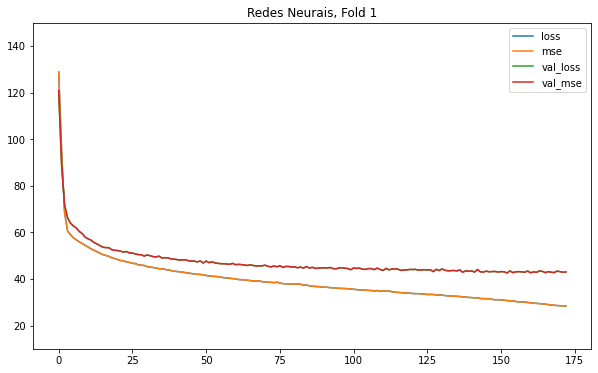

4/4 [==============================] - 0s 12ms/step - loss: 1847.9711 - mse: 1847.9711
Fold 2


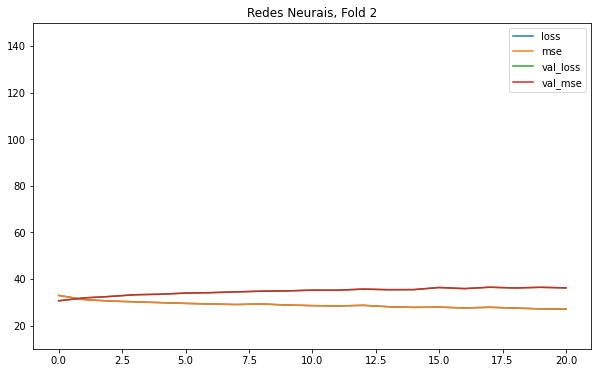

4/4 [==============================] - 0s 2ms/step - loss: 1306.6041 - mse: 1306.6041
Fold 3


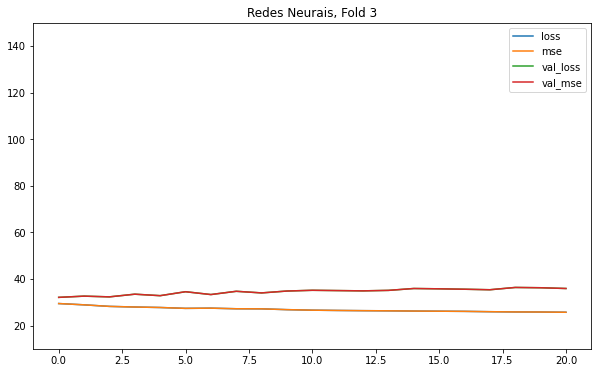

4/4 [==============================] - 0s 2ms/step - loss: 1287.6425 - mse: 1287.6425
Fold 4


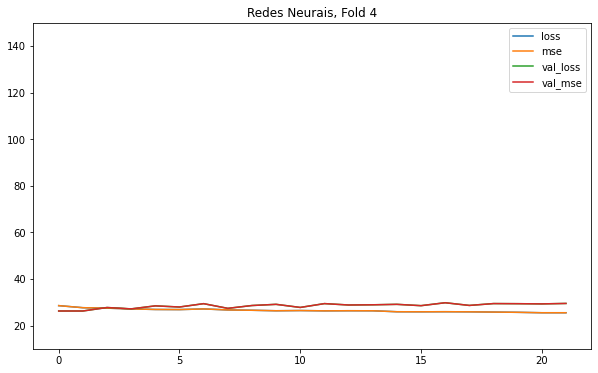

4/4 [==============================] - 0s 2ms/step - loss: 868.3289 - mse: 868.3289
Fold 5


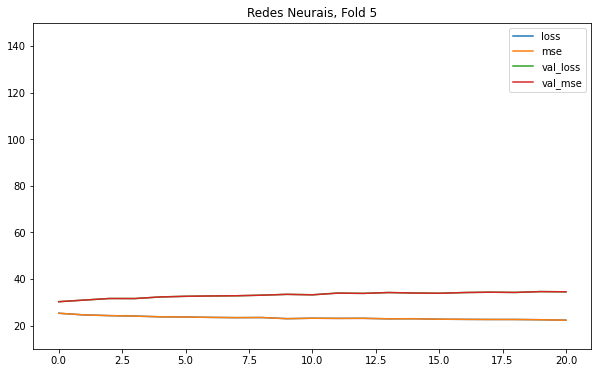

4/4 [==============================] - 0s 2ms/step - loss: 1187.3329 - mse: 1187.3329


In [213]:
# Treinar com cross validation
folds_mse = []
from sklearn.model_selection import KFold

# 5 folds
kf = KFold(n_splits= 5, shuffle= True)

# callbacks
es = keras.callbacks.EarlyStopping(patience= 20)

# y_train_full está em formato de DataFrame e precisa ter os índices resetados - o split mantém o index original
y_train_full_index = y_train_full.reset_index(drop= True)
X_train_full_index = X_train_full.reset_index(drop= True)

# Contagem de folds
i= 1
for train_index, val_index in kf.split(X_train_full_index):
    # Dividir os dados em treino e validação
    X_train, X_val = X_train_full_index.iloc[train_index], X_train_full_index.iloc[val_index]
    y_train, y_val = y_train_full_index.iloc[train_index], y_train_full_index.iloc[val_index]
    
    # Preprocessing - transformação dos dados após split. Evitar data leakage
    X_prep_train = full_pipe.fit_transform(X_train)
    X_prep_val = full_pipe.fit_transform(X_val)
    
    # treinar
    print(f"Fold {i}")
    history = model.fit(X_prep_train, y_train, epochs= 200, callbacks= es, validation_data= [X_prep_val, y_val], verbose=0)
    pd.DataFrame(history.history).apply(lambda x: np.sqrt(x)).plot(figsize= (10,6))
    plt.title(f"Redes Neurais, Fold {i}")
    plt.ylim(10,150)
    plt.show()
    # Evaluate
    _, mse = model.evaluate(X_prep_val, y_val)
    folds_mse.append(mse)
    i = i + 1

In [214]:
# RMSE
print(f"{round(np.mean(np.sqrt(folds_mse)),2)} \u00b1 {np.std(np.sqrt(folds_mse))}")

35.79 ± 4.328924867525693


In [215]:
np.sqrt(folds_mse)

array([42.98803403, 36.14697949, 35.88373526, 29.46742027, 34.45769705])

In [216]:
# Evaluate with test data
np.sqrt(model.evaluate(X_prep_test, y_test))

5/5 [==============================] - 0s 2ms/step - loss: 1616.5652 - mse: 1616.5652


array([40.20653163, 40.20653163])

---

### Refazer o modelo acima

In [220]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Biblioteca de RedesNeurais
import tensorflow
from tensorflow import keras

In [221]:
df = pd.read_csv("full_mec.csv")
df.columns

Index(['Alloy', 'Nome tratado', 'Co', 'Fe', 'Ni', 'Si', 'Al', 'Cr', 'Mo', 'Nb',
       'Ti', 'C', 'V', 'Zr', 'Mn', 'Cu', 'B', 'Y', 'Sn', 'Li', 'Mg', 'Zn',
       'Sc', 'Hf', 'Ta', 'W', 'atomic radius (δ) [%]',
       'Electronegativity (Δχ)', 'Valence Electron Concentration (VEC)',
       'Ω parameter', 'Entalpia de mix (dHmix) [kJ/mol]',
       'Entropia de mix (dSmix) [J/K.mol]', 'Melting temperature (Tm) [K]',
       'Elastic-strain energy criterion (dHel) [kJ/mol]', 'Type of phases',
       'As cast/Homogenized right after casting', 'Cold/Hot Working',
       'Heat treatment', 'temperatura de pico [°C]', 'density ROM (g/cm3)',
       'HV', 'YS (MPa)', 'Specific_strength (MPa.cm3/g)'],
      dtype='object')

In [222]:
# Dropar colunas
df.drop(["Alloy", "Nome tratado", "density ROM (g/cm3)", "HV", "YS (MPa)"], axis= 1, inplace= True)
df.dropna(inplace= True)

In [223]:
# Separar em input e target
X = df.drop("Specific_strength (MPa.cm3/g)", axis= 1)
y = df["Specific_strength (MPa.cm3/g)"]

In [360]:
# Split
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size= 0.2)

In [361]:
X_test.shape

(158, 37)

In [362]:
# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

cat_att = X.select_dtypes("object").columns
num_att = X.select_dtypes("number").columns

full_pipe = ColumnTransformer([("cat", OneHotEncoder(handle_unknown= "ignore"), cat_att),
                               ("num", StandardScaler(), num_att)])

# Preprocessar somente o teste, por enquanto
X_prep_test = full_pipe.fit_transform(X_test)

In [363]:
X_prep_test.shape

(158, 47)

In [364]:
# modelo Deep Neural Network com uma camada oculta
input_ = keras.layers.Input(shape= X_prep_train.shape[1:])
hidden = keras.layers.Dense(300, activation= "sigmoid")(input_)
output = keras.layers.Dense(1)(hidden)
model = keras.Model(inputs= input_, outputs= output)

In [365]:
# Compile
optimizer = keras.optimizers.Adam(learning_rate= 0.01)
model.compile(optimizer= optimizer, loss= "mse", metrics= "mse")

Fold 1


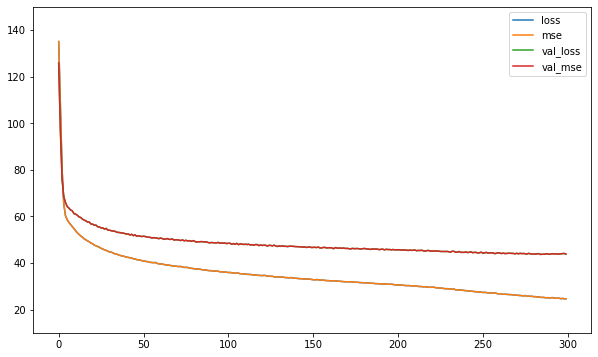

4/4 [==============================] - 0s 2ms/step - loss: 1917.2733 - mse: 1917.2733
Fold 2


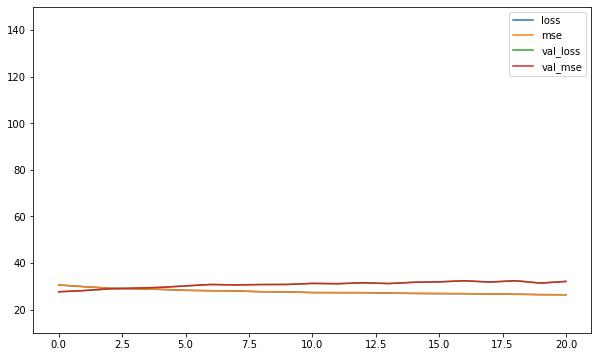

4/4 [==============================] - 0s 2ms/step - loss: 1028.0073 - mse: 1028.0073
Fold 3


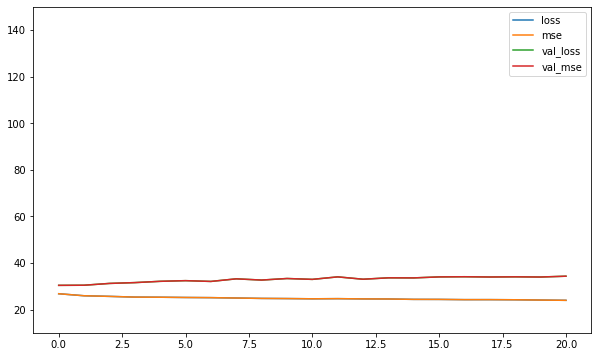

4/4 [==============================] - 0s 2ms/step - loss: 1176.0955 - mse: 1176.0955
Fold 4


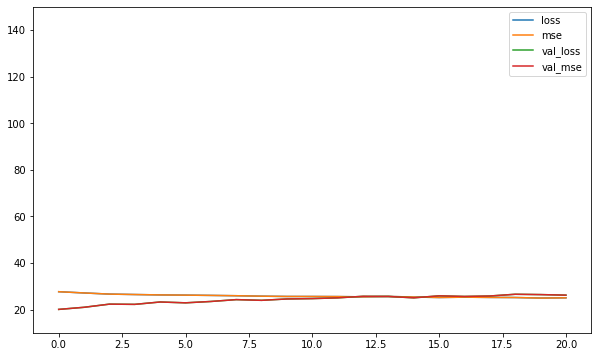

4/4 [==============================] - 0s 2ms/step - loss: 684.5397 - mse: 684.5397
Fold 5


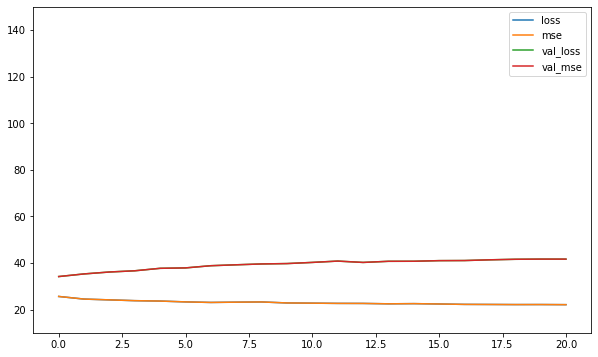

4/4 [==============================] - 0s 2ms/step - loss: 1732.6553 - mse: 1732.6553


In [366]:
# Cross validation
from sklearn.model_selection import KFold

# 5 folds
kf = KFold(n_splits= 5, shuffle= True)

# Resetar indexes
X_train_full_index = X_train_full.reset_index(drop= True)
y_train_full_index = y_train_full.reset_index(drop= True)

# callbacks
es = keras.callbacks.EarlyStopping(patience= 20)

# Armazenamento de mse por fold
mse_fold = []

i = 1
for train_index, val_index in kf.split(X_train_full_index):
    # 1 fold de cada vez
    X_train, X_val = X_train_full_index.iloc[train_index], X_train_full_index.iloc[val_index]
    y_train, y_val = y_train_full_index.iloc[train_index], y_train_full_index.iloc[val_index]
    
    # Preprocessing
    X_prep_train = full_pipe.fit_transform(X_train)
    X_prep_val = full_pipe.fit_transform(X_val)
    
    # Treinar
    print(f"Fold {i}")
    history = model.fit(X_prep_train, 
                        y_train, 
                        epochs= 300, 
                        callbacks= es, 
                        validation_data= [X_prep_val, y_val], 
                        verbose= 0)
    pd.DataFrame(history.history).apply(lambda x: np.sqrt(x)).plot(figsize= (10,6))
    plt.ylim(10,150)
    plt.show()
    
    _, mse = model.evaluate(X_prep_val, y_val)
    mse_fold.append(mse)
    i += 1

In [367]:
# RMSE
rmse_fold = np.sqrt(mse_fold)
rmse_fold

array([43.78667966, 32.0625533 , 34.29424819, 26.16371025, 41.62517596])

In [368]:
print(np.mean(rmse_fold), np.std(rmse_fold))

35.586473470779154 6.427840003059922


In [369]:
# Evaluate with test data
np.sqrt(model.evaluate(X_prep_test, y_test))

5/5 [==============================] - 0s 2ms/step - loss: 1278.8489 - mse: 1278.8489


array([35.76099659, 35.76099659])

````python
# Salvar o modelo
model.save("NN_CV5_model.h5")
````

---